# 2. Renaming and merging

Note: Half datasets, with separate files for east and west subplots have been merged manually in excel

In [1]:
%%time

import os
import math
import datetime
import numpy as np
import pandas as pd
from copy import copy

# Dictionaries
import json
from pprint import pprint

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',100)

Wall time: 1.81 s


In [2]:
# Prints the current working directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\MegaSync\\NMBU\\GitHub\\vPheno'

## Finding Username folder to make general path for multi PC use

In [3]:
username = str(os.getcwd()).split('\\')[2]
username

'fahad'

## Importing Data

In [4]:
path = r'./Data/'
path_complete = r'./Data/complete/'
path_incomplete = r'./Data/incomplete/'

path_yield = r'C:\\Users\\'+username+'\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021'

export_path = './Data/renamed_merged/'

# Create export_path folder if not exists already
os.makedirs(export_path, exist_ok=True)

os.listdir(path)

['complete',
 'incomplete',
 'plots',
 'renamed_merged',
 'results',
 'std_columns.json',
 'yield_df.json']

## Data Preparation
### Creating list of complete files

In [5]:
# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path_complete):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address), 'files found in the directory')
# files_with_address
# files_list

74 files found in the directory


## Data Checking/control

### Check for duplicate filenames

In [6]:
print('Total number of files are :', len(files_list))

print('Number of unique file names are:', len(set(files_list)))

print('There is/are', len(files_list) - len(set(files_list)),'duplicate file name/names.')
if len(files_list) - len(set(files_list)) > 0:
    raise NameError

Total number of files are : 74
Number of unique file names are: 74
There is/are 0 duplicate file name/names.


In [7]:
# files_list

In [8]:
len(files_with_address)
# files_with_address

74

## Importing data files to Pandas

In [9]:
%%time

all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace(")", "")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(".", "")
    # Test: Check if the same date is already present in the current dict key
    if df_name in all_df:
        print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
        raise NameError
    all_df.append(df_name)

    locals()[df_name] = pd.read_csv(data, index_col=False)
    print(df_name, '=====', locals()[df_name].shape)

Graminor_050719_plots_826,_837_deleted,_one_missing_row_deleted ===== (597, 49)
Graminor_060619 ===== (600, 49)
Graminor_070819_2 ===== (600, 49)
Graminor_110619 ===== (600, 49)
Graminor_150719 ===== (600, 49)
Graminor_150819 ===== (600, 49)
Graminor_250719 ===== (600, 46)
Graminor_280619_corrected ===== (600, 49)
Graminor_eastwest_020719_NIR_half_missing ===== (600, 22)
Graminor_eastwest_040720 ===== (800, 49)
Graminor_eastwest_040820 ===== (793, 22)
Graminor_eastwest_050819 ===== (600, 49)
Graminor_eastwest_070720_correct ===== (800, 49)
Graminor_eastwest_130720 ===== (800, 22)
Graminor_eastwest_140820 ===== (800, 49)
Graminor_eastwest_300720 ===== (787, 22)
Graminor_east_010720 ===== (400, 51)
Graminor_east_110719 ===== (300, 49)
Graminor_east_170720cpg ===== (400, 49)
Graminor_east_180620 ===== (400, 46)
Graminor_east_200720 ===== (400, 22)
Graminor_Mica_eastcorrect_west_240620 ===== (757, 49)
Masbasis_050719_corrected ===== (528, 49)
Masbasis_060619_Indices ===== (528, 56)
Masbasi

In [10]:
print(f'Total imported {len(all_df)}')

Total imported 74


# Drop derieved indices

## Import and process standard columns json

In [11]:
std_cols_json = open("Data\std_columns.json", "r")
import_columns = std_cols_json.read()
std_cols_json.close()
type(import_columns)

str

In [12]:
# Converting list stored as string to list
import_columns = import_columns.strip('][').split(', ')

# Stripping extra quotes enclosing the strings
x=0
std_columns = []
for item in import_columns: 
    std_columns.append(item[1:-1])
    x=+1
std_columns

['Plot_ID',
 'Blue_Mean_Value',
 'Blue_Median_Value',
 'Blue_Std_Dev_Value',
 'Green_Mean_Value',
 'Green_Median_Value',
 'Green_Std_Dev_Value',
 'Red_Mean_Value',
 'Red_Median_Value',
 'Red_Std_Dev_Value',
 'RedEdge_Mean_Value',
 'RedEdge_Median_Value',
 'RedEdge_Std_Dev_Value',
 'NIR_Mean_Value',
 'NIR_Median_Value',
 'NIR_Std_Dev_Value']

In [13]:
# Creating lists of standard columns for Mean, Median and Std_Dev

std_columns_mean = ['Plot_ID']
std_columns_median = ['Plot_ID']
std_columns_stdev = ['Plot_ID']

for item in std_columns:
    if item.find("Mean") != -1:
        std_columns_mean.append(item)
    if item.find("Median") != -1:
        std_columns_median.append(item)
    if item.find("Std_Dev") != -1:
        std_columns_stdev.append(item)
print(std_columns_mean)
print(std_columns_median)
print(std_columns_stdev)

['Plot_ID', 'Blue_Mean_Value', 'Green_Mean_Value', 'Red_Mean_Value', 'RedEdge_Mean_Value', 'NIR_Mean_Value']
['Plot_ID', 'Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value', 'RedEdge_Median_Value', 'NIR_Median_Value']
['Plot_ID', 'Blue_Std_Dev_Value', 'Green_Std_Dev_Value', 'Red_Std_Dev_Value', 'RedEdge_Std_Dev_Value', 'NIR_Std_Dev_Value']


## Dropping extra/derieved indices columns from dataframes

In [14]:
# Filtering the datasets with only the standard columns

for df in all_df:
    locals()[df] = locals()[df].copy()[std_columns]

# ToDo: Dropping NAN

## Finding NAN values
### ToDo: Test: Raise error if missing values found

In [15]:
# Finding number of missing values in each dataframe
df_with_nan = []
missing_values = False
for df in all_df:
    if locals()[df].isna().sum().sum() > 0:
        print(f'Total missing values in {df} are {locals()[df].isna().sum().sum()}')
        missing_values = True
        df_with_nan.append(df)
#     if len(df_with_nan) > 0:
#         raise ValueError
if not missing_values:
    print('No missing value found in any dataframe')

Total missing values in Graminor_eastwest_020719_NIR_half_missing are 900
Total missing values in Staur_210819_mean_median_SP are 807


In [16]:
df_with_nan

['Graminor_eastwest_020719_NIR_half_missing', 'Staur_210819_mean_median_SP']

In [17]:
# Finding which column has NAN values
for df in df_with_nan:
    print(f'{df}:\n {locals()[df].shape[1]-locals()[df].dropna(axis=1).shape[1]} columns or {locals()[df].shape[0]-locals()[df].dropna().shape[0]} rows to be dropped,')

Graminor_eastwest_020719_NIR_half_missing:
 3 columns or 300 rows to be dropped,
Staur_210819_mean_median_SP:
 15 columns or 61 rows to be dropped,


## ToDo: Automate: Drop rows with missing values in df_with_nan

In [18]:
for df in df_with_nan:
    print(f'{locals()[df].shape} Before dropping')
    locals()[df].dropna(inplace=True)
    print(f'{locals()[df].shape} After dropping')


(600, 16) Before dropping
(300, 16) After dropping
(1328, 16) Before dropping
(1267, 16) After dropping


## ORRR

## ToDo: Droppping df with Nan from the all_df_std

In [19]:
print(f'Number of items in all_df is {len(all_df)}')

Number of items in all_df is 74


In [20]:
# for df in df_with_nan:
#     all_df.remove(df)

###  ToDo: Update field_year_dict and sorted_field_year_dict after dropping the dataset

In [21]:
print(f'Number of items in all_df now is {len(all_df)}')

Number of items in all_df now is 74


# Standardizing the names

## Creating a dictionary with all dates for a certain field for a certain year

In [22]:
len(all_df)
# all_df

74

In [23]:
%%time

elements_to_strip = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ_-()."

all_df_std = []

field_year_dict = {}

# A reference dict to keep record of the names of files before they got renamed 
renamed_to_from = {}

for df in all_df:
    
    # Getting date from the df name
    date1 = copy(df)

    for x in range(3):
        date1 = date1.rstrip(elements_to_strip)
        date1 = date1.lstrip(elements_to_strip)
        for c in range(3):
            date1 = date1.rstrip(elements_to_strip)
            date1 = date1.lstrip(elements_to_strip)
        date1 = date1.split('_')[0]
    
    field_name = df.split('_')[0]
    field_name = field_name.split('-')[0]

    new_df_name = field_name +'_'+date1
    
    # Drop all columns except the std columns 
    locals()[new_df_name] = locals()[df][std_columns]
    
    all_df_std.append(new_df_name)

    
    
    # Creating a dict with all dates for a certain field for a certain year
    dict_key = field_name+'_20'+date1[-2:]
    
    if dict_key in field_year_dict:
        # Test: Check if the same date is already present in the current dict key
        if date1 in field_year_dict[dict_key]:
            print(f'Duplicate Data file Error: {date1} is already present in {dict_key}\n Current df {df}\n Conflict with {renamed_to_from[new_df_name]}')
            raise NameError
        field_year_dict[dict_key].append(date1)
    else:
        field_year_dict[dict_key] = [date1]
    
    # Adding new and old names to a dict for record
    renamed_to_from[new_df_name] = df
    
#     print(date1)
print('field_year_dict created.')

pprint(field_year_dict)
# all_df_std


field_year_dict created.
{'Graminor_2019': ['050719',
                   '060619',
                   '070819',
                   '110619',
                   '150719',
                   '150819',
                   '250719',
                   '280619',
                   '020719',
                   '050819',
                   '110719'],
 'Graminor_2020': ['040720',
                   '040820',
                   '070720',
                   '130720',
                   '140820',
                   '300720',
                   '010720',
                   '170720',
                   '180620',
                   '200720',
                   '240620'],
 'Masbasis_2019': ['050719',
                   '060619',
                   '070819',
                   '150719',
                   '220719',
                   '260619',
                   '290719',
                   '280619'],
 'Masbasis_2020': ['010720',
                   '070820',
                   '080720',
               

## Test: Check if there are duplicate datasets/names in all_df_std

In [24]:

if len(all_df_std) > len(set(all_df_std)):
    duplicates = len(all_df_std) - len(set(all_df_std))
    if duplicates>1:
        verb, plural='are', 's'
    else:
        verb, plural='is', ''
    print(f'Error:\nThere {verb} {duplicates} duplicate name{plural} in the datasets out of total {len(all_df_std)}.\n \
    Make sure no dataset has been lost because of data being separated in east/west fields on the same date')
    # Printing the names of the duplicate datasets, if any
    find_duplicates=[]
    for i in all_df_std:
        if i not in find_duplicates:
            find_duplicates.append(i)
        else:
            print(f'Duplicate dataset named \'{i}\',\n')
    raise NameError
    
else:
    print('No duplicate dataset found')

No duplicate dataset found


### Arranging the dates in field_year_Dict in ascending order


In [25]:
sorted_field_year_dict = {}
for key, dates_list in field_year_dict.items():
    # Converting the dates to a datetime date object and sorting them in list
    sorted_dated = sorted([
        datetime.datetime.strptime(date, '%d%m%y').date()
        for date in dates_list])

    sorted_field_year_dict[key] = sorted_dated

pprint(sorted_field_year_dict)

{'Graminor_2019': [datetime.date(2019, 6, 6),
                   datetime.date(2019, 6, 11),
                   datetime.date(2019, 6, 28),
                   datetime.date(2019, 7, 2),
                   datetime.date(2019, 7, 5),
                   datetime.date(2019, 7, 11),
                   datetime.date(2019, 7, 15),
                   datetime.date(2019, 7, 25),
                   datetime.date(2019, 8, 5),
                   datetime.date(2019, 8, 7),
                   datetime.date(2019, 8, 15)],
 'Graminor_2020': [datetime.date(2020, 6, 18),
                   datetime.date(2020, 6, 24),
                   datetime.date(2020, 7, 1),
                   datetime.date(2020, 7, 4),
                   datetime.date(2020, 7, 7),
                   datetime.date(2020, 7, 13),
                   datetime.date(2020, 7, 17),
                   datetime.date(2020, 7, 20),
                   datetime.date(2020, 7, 30),
                   datetime.date(2020, 8, 4),
                   da

# Identify & drop duplicate sub-plots in each datasets, if any

## Checking if duplicates exist

In [26]:
found_duplicates = False
for df in all_df_std:
    duplicates = locals()[df][locals()[df].duplicated(subset='Plot_ID')]['Plot_ID']
    if duplicates.size > 0:
        found_duplicates = True
        print(f'Following {duplicates.size} duplicates in {df} ')
#         for x in range(duplicates.size):
#             print(duplicates.iloc[x])
        ident_dup = locals()[df].shape[0]-locals()[df].drop_duplicates(keep=False).shape[0]
        plot_id_dup = locals()[df].shape[0] - locals()[df].drop_duplicates(subset = 'Plot_ID').shape[0]
        print('Identical Duplicates:', ident_dup)
        print(' Plot_ID  Duplicates:', plot_id_dup)
        print('  Rows to be dropped:', plot_id_dup*2)

# if found_duplicates:
#     raise NameError
# else:
#     print(f'No duplicate subplots found in any dataset.')

Following 108 duplicates in Staur_090720 
Identical Duplicates: 0
 Plot_ID  Duplicates: 108
  Rows to be dropped: 216
Following 108 duplicates in Staur_160720 
Identical Duplicates: 0
 Plot_ID  Duplicates: 108
  Rows to be dropped: 216
Following 108 duplicates in Staur_200620 
Identical Duplicates: 0
 Plot_ID  Duplicates: 108
  Rows to be dropped: 216
Following 1 duplicates in Staur_210819 
Identical Duplicates: 0
 Plot_ID  Duplicates: 1
  Rows to be dropped: 2
Following 108 duplicates in Staur_240720 
Identical Duplicates: 0
 Plot_ID  Duplicates: 108
  Rows to be dropped: 216
Following 108 duplicates in Staur_250620 
Identical Duplicates: 0
 Plot_ID  Duplicates: 108
  Rows to be dropped: 216
Following 108 duplicates in Staur_310720 
Identical Duplicates: 0
 Plot_ID  Duplicates: 108
  Rows to be dropped: 216


## Finding out which plots are duplicate/ non-unique

In [27]:
found_duplicates = False

for df in all_df_std:
    plot_list_series = locals()[df].Plot_ID
    if len(plot_list_series[plot_list_series.duplicated()]) > 0:
        found_duplicates = True
#         print(f'Duplicate subplots in {df} are {plot_list_series[plot_list_series.duplicated()]}')
        print(f'Number of plots {len(plot_list_series)}, vs Number of duplicate plots {len(plot_list_series)-len(set(plot_list_series))}')

# if found_duplicates:
#     raise NameError
# else:
#     print(f'No duplicate subplots found in any dataset.')

Number of plots 1722, vs Number of duplicate plots 108
Number of plots 1722, vs Number of duplicate plots 108
Number of plots 1722, vs Number of duplicate plots 108
Number of plots 1267, vs Number of duplicate plots 1
Number of plots 1722, vs Number of duplicate plots 108
Number of plots 1722, vs Number of duplicate plots 108
Number of plots 1722, vs Number of duplicate plots 108


## Drop duplicate rows

### Drop only identical duplicates

In [28]:
found_duplicates = False
for df in all_df_std:
    dup_temp = False
    size_before = locals()[df].shape
    # Finding completely identical duplicate entries
    duplicates = locals()[df][locals()[df].duplicated()]['Plot_ID']
    if duplicates.size > 0:
        dup_temp = True
        found_duplicates = True
        # Dropping duplicate entries in place
        locals()[df].drop_duplicates(inplace=True)
        print(f'{duplicates.size} duplicate entries deleted from the {df}.')
    if dup_temp:
        rows_dropped = size_before[0] - locals()[df].shape[0]
        print(size_before[0], locals()[df].shape[0], rows_dropped)
        assert rows_dropped == duplicates.size


### Drop all duplicate entries in Plot_ID

In [29]:
found_duplicates = False
for df in all_df_std:
    dup_temp = False
    size_before = locals()[df].shape
    # Finding identical entries in Plot_ID column
    duplicates = locals()[df][locals()[df].duplicated(subset='Plot_ID')]['Plot_ID']
    if duplicates.size > 0:
        dup_temp = True
        found_duplicates = True
        # Dropping duplicate entries in place
        locals()[df].drop_duplicates(subset = 'Plot_ID', keep=False, inplace=True)
        print(f'{duplicates.size*2} duplicate entries deleted from the {df}.')
    if dup_temp:
        rows_dropped = size_before[0] - locals()[df].shape[0]
#         print(size_before[0], locals()[df].shape[0], rows_dropped)
        assert rows_dropped ==duplicates.size*2


216 duplicate entries deleted from the Staur_090720.
216 duplicate entries deleted from the Staur_160720.
216 duplicate entries deleted from the Staur_200620.
2 duplicate entries deleted from the Staur_210819.
216 duplicate entries deleted from the Staur_240720.
216 duplicate entries deleted from the Staur_250620.
216 duplicate entries deleted from the Staur_310720.


In [30]:
# print(f'Number of plots {len(plot_list_series)}, vs Number of duplicate plots {len(set(plot_list_series))-len(plot_list_series)}')
# print(Masbasis_130720.iloc[379,:])
# print(Masbasis_130720.iloc[293,:])
# Masbasis_130720.iloc[379,:] == Masbasis_130720.iloc[293,:]


In [31]:
# plots_list = (np.array(Masbasis_130720.Plot_ID.tolist()))

# # ToDo Figure out the problem in the following code
# seen = set(plots_list)
# uniq = [x for x in plots_list if x not in seen and not seen.add(x)] 
# uniq

There are no duplicate datasets.  
There is a slight possibility that there may be duplicate sub-plots in a field. That is yet to be checked.


# Find grain yield, DH, DT etc values and attach to the dataframes

In [32]:
os.listdir(path_yield)

['2019 Staur Graminor',
 '2019 Vollebekk Graminor',
 '2019 Vollebekk Masbasis',
 '2020 Staur Graminor',
 '2020 Staur Masbasis_bandsNA',
 '2020 Vollebekk Graminor',
 '2020 Vollebekk Masbasis',
 '2020 Vollebekk Robot',
 '2021 Vollebekk Masbasis_yieldNA']

## Data Preparation
### Creating list of all files

In [33]:
# Get the list of all files in directory tree at given path_yield

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path_yield):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address), 'files found in the directory')
# files_with_address
# files_list
files_with_address_bkp = copy(files_with_address)

95 files found in the directory


### Checking if there are multiple sheets in the files

In [34]:
# Print number of sheets in all files
print('The following files have multiple sheets.')

list_multi_sheet = []
for file in files_with_address:
    xl_file = pd.ExcelFile(file,engine='openpyxl')
    number_of_sheets = len(xl_file.sheet_names)
    if number_of_sheets > 1:
        print(number_of_sheets, os.path.basename(file), 'in folder', os.path.basename(os.path.dirname(file))
)
        list_multi_sheet.append(file)

The following files have multiple sheets.
3 19BMLFN3 - MASBASIS yield trial Staur 2019.xlsx in folder 2019 Staur Graminor
4 19TvPhenores.xlsx in folder 2019 Vollebekk Graminor
4 19BMLGI1 - MASBASIS yield trial Vollebekk 2019.xlsx in folder 2019 Vollebekk Masbasis
3 Staur-Graminor-Masbasis_2020.xlsx in folder 2020 Staur Graminor
2 20BMLFN3 - MASBASIS avlingsforsøk Staur 2020 lodging data.xlsx in folder 2020 Staur Masbasis_bandsNA
2 Masbasis_2020_staur.xlsx in folder 2020 Staur Masbasis_bandsNA
2 Staur_maturity_heading_yield_2020.xlsx in folder 2020 Staur Masbasis_bandsNA
3 20BMLGI1_2020_tm.xlsx in folder 2020 Vollebekk Masbasis
3 Masbasis_Mica_2020_all_dates_MEDIAN_DP.xlsx in folder 2020 Vollebekk Masbasis
3 ROBOT_2020.xlsx in folder 2020 Vollebekk Robot


In [35]:
# Files dropped in the initial stage
list_multi_sheet

['C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\2019 Staur Graminor\\19BMLFN3 - MASBASIS yield trial Staur 2019.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\2019 Vollebekk Graminor\\19TvPhenores.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\2019 Vollebekk Masbasis\\19BMLGI1 - MASBASIS yield trial Vollebekk 2019.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\2020 Staur Graminor\\Staur-Graminor-Masbasis_2020.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\2020 Staur Masbasis_bandsNA\\20BMLFN3 - MASBASIS avlingsforsøk Staur 2020 lodging data.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\2020 Staur Masbasis_bandsNA\\Masbasis_2020_staur.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\2020 Staur Masbasis_bandsNA\\Staur_maturity_heading_yield_2020.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU

### Identifying files without dates
(with 2019 in name means they dont have date format)

In [36]:
files_w_2019 = []
for file in files_with_address:
    if file not in list_multi_sheet:
        file_name = os.path.basename(file)
        if '2019' in file_name:
            print(file_name, 'in folder', os.path.basename(os.path.dirname(file)))
            files_w_2019.append(file)
        if '2020' in file_name:
            print(file_name, 'in folder', os.path.basename(os.path.dirname(file)))
            files_w_2019.append(file)

Staur_Graminor_2019_median PLT918-2050 240719 070819 150819 210819 300819.xlsx in folder 2019 Staur Graminor
Staur_Masbasis_2019 PLT101-866 240719 070819 150819 300819.xlsx in folder 2019 Staur Graminor
2020TGraminor-Vollebekk-res.xlsx in folder 2020 Vollebekk Graminor


In [37]:
files_w_2019

['C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\2019 Staur Graminor\\Staur_Graminor_2019_median PLT918-2050 240719 070819 150819 210819 300819.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\2019 Staur Graminor\\Staur_Masbasis_2019 PLT101-866 240719 070819 150819 300819.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\2020 Vollebekk Graminor\\2020TGraminor-Vollebekk-res.xlsx']

In [38]:
len(all_df_std)

74

### Importing all files & their sheets into pandas

In [39]:
%%time

df_yield = []

# A reference dict to keep record of the names of files before they got renamed 
yield_import_to_from = {}

for data in list_multi_sheet+files_w_2019:
    file_name = os.path.splitext(os.path.basename(data))[0]
    # Moving numbers to the end of the string/file_name
    parent_dir = os.path.dirname(data).split('\\')[-1]
    file_name = parent_dir+'_x_'+file_name
        
#     # Parent dir
#     dir1_name = os.path.basename(os.path.dirname(data))
#     # grand parent dir
#     dir2_name = os.path.basename(os.path.dirname(os.path.dirname(data)))

    # Replce all invalid characters in the name
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("(", "")
    file_name = file_name.replace(")", "")
    file_name = file_name.replace(".", "")
    file_name = 'df_'+file_name
    xl_file = pd.ExcelFile(data,engine='openpyxl')
    
    for sheet in xl_file.sheet_names:
        if len(xl_file.sheet_names)>1:
            sheet_str = sheet
            sheet_str = sheet_str.replace("-", "_")
            sheet_str = sheet_str.replace(" ", "_")
            sheet_str = sheet_str.replace("(", "")
            sheet_str = sheet_str.replace(")", "")
            sheet_str = sheet_str.replace(".", "")

            df_name = file_name+'_x_'+sheet_str
            
        else:
            df_name = file_name

        # Test: Check if the same date is already present in the current dict key
        if df_name in df_yield:
            print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
            raise NameError
    
        df_yield.append(df_name)
        print(df_name)
        # Adding new and old names+path to a dict for record
        yield_import_to_from[df_name] = data
        
        locals()[df_name] = pd.read_excel(data, sheet_name=sheet, engine='openpyxl')


df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data


C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Field_map
df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_lsmeans
df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_kart
df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res
df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_kart
df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_res
df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data


C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_lsmeans
df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_Sheet1
df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_Sheet2
df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Map
df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res
df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Sheet1
df_2020_Staur_Masbasis_bandsNA_x_20BMLFN3___MASBASIS_avlingsforsøk_Staur_2020_lodging_data_x_Feltbok
df_2020_Staur_Masbasis_bandsNA_x_20BMLFN3___MASBASIS_avlingsforsøk_Staur_2020_lodging_data_x_kart
df_2020_Staur_Masbasis_bandsNA_x_Masbasis_2020_staur_x_Feltbok
df_2020_Staur_Masbasis_bandsNA_x_Masbasis_2020_staur_x_kart
df_2020_Staur_Masbasis_bandsNA_x_Staur_maturity_heading_yield_2020_x_Feltbok
df_2020_Staur_Masbasis_bandsNA_x_Staur_maturity_heading_yield_2020_x_kart
df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data
df_2020_Vollebekk_Masbasis_x_20BMLG

## Identifying the sheets with yield data

In [40]:
# Declaring list to grab df for genomics data
df_genomics = []

In [41]:
# Declaring dict to grab df with yield data
yield_src_dict = {}

In [42]:
# Listing datasets for reference
for df in all_df_std:
    print(df, locals()[df].shape, 'Min Plot_ID value:', locals()[df]['Plot_ID'].min(), 'Max Plot_ID value:', locals()[df]['Plot_ID'].max())

Graminor_050719 (597, 16) Min Plot_ID value: 101 Max Plot_ID value: 875
Graminor_060619 (600, 16) Min Plot_ID value: 101 Max Plot_ID value: 875
Graminor_070819 (600, 16) Min Plot_ID value: 101 Max Plot_ID value: 875
Graminor_110619 (600, 16) Min Plot_ID value: 101 Max Plot_ID value: 875
Graminor_150719 (600, 16) Min Plot_ID value: 101 Max Plot_ID value: 875
Graminor_150819 (600, 16) Min Plot_ID value: 101 Max Plot_ID value: 875
Graminor_250719 (600, 16) Min Plot_ID value: 101 Max Plot_ID value: 875
Graminor_280619 (600, 16) Min Plot_ID value: 101 Max Plot_ID value: 875
Graminor_020719 (300, 16) Min Plot_ID value: 501 Max Plot_ID value: 875
Graminor_040720 (800, 16) Min Plot_ID value: 101 Max Plot_ID value: 900
Graminor_040820 (793, 16) Min Plot_ID value: 101 Max Plot_ID value: 900
Graminor_050819 (600, 16) Min Plot_ID value: 101 Max Plot_ID value: 875
Graminor_070720 (800, 16) Min Plot_ID value: 101 Max Plot_ID value: 900
Graminor_130720 (800, 16) Min Plot_ID value: 101 Max Plot_ID val

Inspecting the datasets from Graminor, it can be noted that the plot id of all the plots of Graminor correspond to the range from 100 to 900, which are aparently all in Gramminor. Staur Plot IDs are 4 digit. So, we do not any bands data from Staur at this point.

In [43]:
# Ask: Yield data not available

### Vollebekk Graminor 2019 
19TvPhenores

In [44]:
# List of sheets with Graminor and 2019 in name
[x for x in df_yield if 'Graminor' in x and '2019' in x]

['df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data',
 'df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Field_map',
 'df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_lsmeans',
 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_kart',
 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res',
 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_kart',
 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_res',
 'df_2019_Staur_Graminor_x_Staur_Graminor_2019_median_PLT918_2050_240719_070819_150819_210819_300819',
 'df_2019_Staur_Graminor_x_Staur_Masbasis_2019_PLT101_866_240719_070819_150819_300819']

**Already droped**  
Checking if the sheets from the file **19TvPhenores** and **19TvPhenores_pedigree** are the same

Turns out that the file **19TvPhenores** in **2019 Vollebekk Graminor** and in **2019 Staur**, and **19TvPhenores_pedigree** file in **2019 Staur** have the same sheets regarding grain yield data. So we will use the **19TvPhenores** in **2019 Vollebekk Graminor** directory.

**19TvPhenores_pedigree** and **19TvPhenores** files in Staur 2019 have been removed.
We will use **19TvPhenores** from **2019 Vollebekk Graminor** folder


In [45]:
# Adding df to be used later for genomics data matching
df_genomics.extend([])
# No data relavant for genomics
# Will be added in section Adding Yield Data to all datasets

# Removing the files that have been inspected
inspected_df_vb_grm19 = [
 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_kart',
 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_kart',
 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_res',
 'df_2019_Staur_Graminor_x_Staur_Graminor_2019_median_PLT918_2050_240719_070819_150819_210819_300819',
 'df_2019_Staur_Graminor_x_Staur_Masbasis_2019_PLT101_866_240719_070819_150819_300819']

df_yield = [x for x in df_yield if x not in inspected_df_vb_grm19]

In [46]:
yield_src_dict['Graminor_2019_Vollebekk'] = 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_res'

### Vollebekk Graminor 2020

In [47]:
# List of sheets with Graminor and 2020 in name
[x for x in df_yield if 'Graminor' in x and '2020' in x and 'Vollebekk' in x]

['df_2020_Vollebekk_Graminor_x_2020TGraminor_Vollebekk_res']

In [48]:
# Adding df to be used later for genomics data matching
df_genomics.extend([])
# No data relavant for genomics
# Will be added in section Adding Yield Data to all datasets

# Removing the files that have been inspected
inspected_df_vb_grm20 = ['df_2020_Vollebekk_Graminor_x_2020TGraminor_Vollebekk_res']

df_yield = [x for x in df_yield if x not in inspected_df_vb_grm20]

In [49]:
yield_src_dict['Graminor_2020_Vollebekk'] = 'df_2020_Vollebekk_Graminor_x_2020TGraminor_Vollebekk_res'


### Vollebekk Masbasis 2019

In [50]:
# List of sheets with Masbasis and 2019 and Vollebekk in name
[x for x in df_yield if 'Masbasis' in x and '2019' in x and 'Vollebekk' in x ]

['df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data',
 'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_lsmeans',
 'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_Sheet1',
 'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_Sheet2']

Masbasis_2019_x_Field_data_2019 and Masbasis_2019_x_NEW_Field_data_2019 have same data. So deleting df_2019_Vollebekk_Masbasis_x_Field_data_2019

For df_2019_Vollebekk_Masbasis_x_Masbasis_2019_ForDP_median, the difference is extremely small. So we will use df_2019_Vollebekk_Masbasis_x_Masbasis_2019_ForDP_median. Deleting df_2019_Vollebekk_Masbasis_x_NEW_Field_data_2019

df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data  
has the exact same data as in df_2019_Vollebekk_Masbasis_x_Masbasis_2019_ForDP_median.  
Deleting df_2019_Vollebekk_Masbasis_x_Masbasis_2019_ForDP_median

In [51]:
# Comparing two series to show only the mismatching entreis
pd.set_option("display.precision", 14)
# comparision = df_2019_Vollebekk_Masbasis_x_Masbasis_2019_ForDP_median['GrainYield'].compare(df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data['GrainYield'])
# comparision.iloc[:,0:1].sub(comparision.iloc[:,1:2])
# comparision.head()

In [52]:
# Adding df to be used later for genomics data matching
df_genomics.extend([
    'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data',
    'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_lsmeans',
    'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_Sheet1',
    'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_Sheet2'
])

# Removing the files that have been inspected
inspected_df_vb_mas19 = [
    'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data',
    'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_lsmeans',
    'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_Sheet1',
    'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_Sheet2'
]

df_yield = [x for x in df_yield if x not in inspected_df_vb_mas19]

In [53]:
yield_src_dict['Masbasis_2019_Vollebekk'] = 'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data'

### Vollebekk Masbasis 2020

In [54]:
# List of sheets with Masbasis and 2020 in name
[x for x in df_yield if 'Masbasis' in x and '2020' in x and 'Vollebekk' in x]

['df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data',
 'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_lsmeans',
 'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_lsmeans_lmer',
 'df_2020_Vollebekk_Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_Sheet1',
 'df_2020_Vollebekk_Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_biomass',
 'df_2020_Vollebekk_Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_Without_loadging']

In [55]:
# print(df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data.equals(df_2020_Vollebekk_Masbasis_x_Masbasis_vollebekk_trial_data_2020_x_data))
# print(df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_lsmeans.equals(df_2020_Vollebekk_Masbasis_x_Masbasis_vollebekk_trial_data_2020_x_lsmeans))
# print(df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_lsmeans_lmer.equals(df_2020_Vollebekk_Masbasis_x_Masbasis_vollebekk_trial_data_2020_x_lsmeans_lmer))


df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm   
is exactly the same as  
df_2020_Vollebekk_Masbasis_x_Masbasis_vollebekk_trial_data_2020.    
So deleting df_2020_Vollebekk_Masbasis_x_Masbasis_vollebekk_trial_data_2020.

In [56]:
# df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data['GrainYield'].equals(df_2020_Vollebekk_Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_Sheet1['GrainYield'])

Moreover, the GrainYield data in  
df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data  
and 
df_2020_Vollebekk_Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_Sheet1  
is exactly the same. So dropping df_2020_Vollebekk_Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_Sheet1 from further processing. 

Important to note that in **Masbasis_Mica_2020_all_dates_MEDIAN_DP**, the subplots with lodging more than 10 have been dropped in the sheet named **Without_lodging**. It also dropped some red highlighted rows and some more for no aparent reason. There maybe a filtering strategy to drop unreliable subplots here. ToDo: Need to investigate and discuss with Sahameh

In [57]:
df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data['GrainYield'].dropna()

4      713.33333333333337
5      677.33333333333337
6      361.33333333333331
7      697.33333333333337
8      664.00000000000000
              ...        
679    646.66666666666663
680    478.66666666666669
681    732.00000000000000
682    600.00000000000000
683    714.66666666666663
Name: GrainYield, Length: 571, dtype: float64

In [58]:
df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_lsmeans_lmer['GrainYield']

0      692.64982695641095
1      677.86196971022900
2      662.28221171870598
3      667.96322901550400
4      654.33320147100403
              ...        
283    517.81248520565703
284    593.26000855945904
285    499.96906032742100
286    539.15045569047300
287    535.09866305721403
Name: GrainYield, Length: 288, dtype: float64

And analysing the grain yields in thee above sheets for Masbasis 2020, **'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data'** seems to have more data than in **'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_lsmeans_lmer'**. Also, the second sheet seems to have the yields for different varieties, not for individual subplots. If a varaiety is sown in two subplots, the secondd file only has one entry for that variety. So, it is decided to use **'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data'** to get the grain yield data.

In [59]:
# Adding df to be used later for genomics data matching
df_genomics.extend([])
# No data relavant for genomics
# Will be added in section Adding Yield Data to all datasets

# Removing the files that have been inspected
inspected_df_st_mas20 = ['df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data',
 'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_lsmeans',
 'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_lsmeans_lmer',
 'df_2020_Vollebekk_Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_Sheet1',
 'df_2020_Vollebekk_Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_biomass',
 'df_2020_Vollebekk_Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_Without_loadging']

df_yield = [x for x in df_yield if x not in inspected_df_st_mas20]


In [60]:
yield_src_dict['Masbasis_2020_Vollebekk'] = 'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data'

### Staur 2019

In [61]:
# List of sheets with Graminor and 2019 in name
[x for x in df_yield if 'Staur' in x and '2019' in x]
# [x for x in df_yield if 'Masbasis' in x and '2019' in x and not 'Vollebekk' in x ]

['df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data',
 'df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Field_map',
 'df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_lsmeans',
 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res']

#### Graminor 2019

In [62]:
df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Pl.,Akssk.,Gulm.,Avling,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,r_expt,r_location,plot,bloc,ibloc,entry,NaN,name,pedigree,Legde,høyde,Juli,Aug.,kg/daa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19T1A 2,Staur,1301,1,1,14,NaN,GN12760,NK02529/NK01533//NK01568,20,NaN,22,NaN,583.00721062619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19T1A 2,Staur,1302,1,1,2,NaN,Demonstrant,T1005/NK93512,40,NaN,23,NaN,473.86110056926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19T1A 2,Staur,1303,1,1,11,NaN,GN14547,SW45126/NK01533,30,NaN,20,NaN,511.10436432638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19T1A 2,Staur,1304,1,1,15,NaN,GN15549,SW45126/GN03529,30,NaN,21,NaN,512.30360531309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res  
and  
df_2019_Vollebekk_Graminor_x_Graminor_Staur_Vollebekk_2019_x_Staur_res_new  
are not exactly the same.   

Moreover Plot_ID from 1751 to 1775 are double in the second df.   
And from 1801 to 1850 the values in all other columns are duplicate of the above subplot.  
So all of them will be dropped from the following df.  
df_2019_Vollebekk_Graminor_x_Graminor_Staur_Vollebekk_2019_x_Staur_res_new  


In [63]:
df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res.shape

(818, 35)

##### Dropping duplicate Plot_ID entries in yield data

In [64]:
staur_grm19_temp = df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res.copy()

# Dropping entries with missing plot_ID /Nan entries
staur_grm19_temp.dropna(subset=['Unnamed: 2'], inplace=True)
staur_grm19_temp.shape

(801, 35)

In [65]:
# Finding identical entries in Plot_ID column
duplicates_all = staur_grm19_temp[staur_grm19_temp.duplicated(subset='Unnamed: 2')]['Unnamed: 2']

if duplicates_all.size > 0:
    # Dropping one of the two identical duplicates entries
    staur_grm19_temp.drop_duplicates(inplace=True)
    
    duplicates_non_ident = staur_grm19_temp[staur_grm19_temp.duplicated(subset='Unnamed: 2')]['Unnamed: 2']
    identical_dup_dropped = duplicates_all.size - duplicates_non_ident.size
    print(f'{identical_dup_dropped}      identical duplicate entries dropped.')
    
#     print(duplicates_all.size, duplicates_non_ident.size, identical_dup_dropped)

    # Dropping both entries for non-identical duplicate entries
    staur_grm19_temp.drop_duplicates(subset = 'Unnamed: 2', keep=False, inplace=True)
    print(f'{duplicates_non_ident.size*2} non-identical duplicate entries dropped.')

    print(f'Total     {identical_dup_dropped + duplicates_non_ident.size*2}     duplicate entries deleted.')
df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res = staur_grm19_temp.copy()

#### Masbasis 2019

In [66]:
df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data.head()

,Rute,Plot,Design,Rep,Block,PLT,Col,Nursery,Line,MASBASIS 2015,Name,Fra forsøk,Nr.,Rute.1,PH,LD1,LD2,LD3,LD_Mean,HD,MAT,DH,DM,Moisture,Yield,TW
0,101,1,alpha-lattice,1,1,1,1,MASBASIS,1521,1521,GN11527,18BMLGI1,1260,101,90,5.0,60,70,65.0,19,5,45.0,91,32.58823529411764,562.83067306619046,70.23529411764706
1,102,2,alpha-lattice,1,1,2,2,MASBASIS,1622,1622,GN14506,18BMLGI1,1223,102,86,0.0,50,60,55.0,23,18,49.0,104,38.00000000000000,494.11764705882359,77.11764705882354
2,103,3,alpha-lattice,1,1,3,3,MASBASIS,1609,1609,GN14529,18BMLGI1,1228,103,86,0.0,5,20,12.5,22,15,48.0,101,27.76470588235294,548.27547717379173,74.23529411764706
3,104,4,alpha-lattice,1,1,4,4,MASBASIS,24,1075,NK93604,18BMLGI1,1236,104,78,2.0,10,40,25.0,20,-2,46.0,84,32.00000000000000,480.00000000000006,71.70588235294117
4,105,5,fill,1,1,5,5,MASBASIS,94,1120,DH20097,18BMLGI1,1161,105,94,90.0,99,99,99.0,18,8,44.0,94,48.94117647058824,339.48788927335636,76.52941176470588


In [67]:
# Adding df to be used later for genomics data matching
df_genomics.extend([])

# Removing the files that have been inspected
inspected_df_st_grm19 = ['df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data',
 'df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Field_map',
 'df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_lsmeans',
 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res']

df_yield = [x for x in df_yield if x not in inspected_df_st_grm19]


In [68]:
# # Can only be the names of df from the df_yield list

yield_src_dict['Staur_Graminor_2019'] = 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res'
yield_src_dict['Staur_Masbasis_2019'] = 'df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data'

### Staur 2020

In [69]:
# List of sheets with Graminor and 2020 in name
[x for x in df_yield if 'Staur' in x and '2020' in x]
# [x for x in df_yield if 'Graminor' in x and '2020' in x and not 'Vollebekk' in x]
# [x for x in df_yield if 'Masbasis' in x and '2020' in x and not 'Vollebekk' in x]

['df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Map',
 'df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res',
 'df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Sheet1',
 'df_2020_Staur_Masbasis_bandsNA_x_20BMLFN3___MASBASIS_avlingsforsøk_Staur_2020_lodging_data_x_Feltbok',
 'df_2020_Staur_Masbasis_bandsNA_x_20BMLFN3___MASBASIS_avlingsforsøk_Staur_2020_lodging_data_x_kart',
 'df_2020_Staur_Masbasis_bandsNA_x_Masbasis_2020_staur_x_Feltbok',
 'df_2020_Staur_Masbasis_bandsNA_x_Masbasis_2020_staur_x_kart',
 'df_2020_Staur_Masbasis_bandsNA_x_Staur_maturity_heading_yield_2020_x_Feltbok',
 'df_2020_Staur_Masbasis_bandsNA_x_Staur_maturity_heading_yield_2020_x_kart']

In [70]:
df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res.head()
df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res

,Staur,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,% Late,% Late.1,Plant,Yellow,%,Yield
0,r_expt,r_location,plot,bloc,ibloc,entry,NaN,name,pedigree,Tillers,Lodging,height,Ripe,Water,kg/daa
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20T7B2,Staur,125,1,1,24,NaN,GN19584,GN06573/SW46375//GN03531,NaN,NaN,55,NaN,16.559718969555,491.09877798861
3,20T7B2,Staur,126,1,1,20,NaN,GN19565,SW71142/GN07574,NaN,NaN,68,NaN,17.17962248833,703.06422770398
4,20T7B2,Staur,127,1,1,14,NaN,GN19548,GN03509/SW51127,NaN,NaN,58,NaN,16.970549450549,650.90677798861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,20T19B2,Staur,2247,2,10,10,NaN,GN20705,Sommerset/Berserk//Berserk,NaN,NaN,70,NaN,16.016,497.83984819734
1049,20T19B2,Staur,2248,2,10,20,NaN,GN20715,Sommerset/NK01513//BAJASS-5,NaN,NaN,75,NaN,15.106,600.10018975332
1050,20T19B2,Staur,2249,2,10,24,NaN,GN20720,SW45126/NK01533,NaN,NaN,71,NaN,18.655,496.00759013283
1051,20T19B2,Staur,2250,2,10,13,NaN,GN20708,Berserk-4/CJ9306//Berserk-4,NaN,NaN,70,NaN,16.198,512.85313092979


#### Dropping entries with missing plot_ID /Nan entries

In [71]:
staur20_temp = df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res.copy()

# Dropping entries with missing plot_ID 
staur20_temp.dropna(subset=['Unnamed: 2'], inplace=True)

#### Dropping Duplicate entries

In [72]:
# Finding identical entries in Plot_ID column
duplicates_all = staur20_temp[staur20_temp.duplicated(subset='Unnamed: 2')]['Unnamed: 2']

if duplicates_all.size > 0:
    # Dropping one of the two identical duplicates entries
    staur20_temp.drop_duplicates(inplace=True)
    
    duplicates_non_ident = staur20_temp[staur20_temp.duplicated(subset='Unnamed: 2')]['Unnamed: 2']
    identical_dup_dropped = duplicates_all.size - duplicates_non_ident.size
    print(f'{identical_dup_dropped}     identical duplicate entries dropped.')
    
#     print(duplicates_all.size, duplicates_non_ident.size, identical_dup_dropped)

    # Dropping both entries for non-identical duplicate entries
    staur20_temp.drop_duplicates(subset = 'Unnamed: 2', keep=False, inplace=True)
    print(f'{duplicates_non_ident.size*2} non-identical duplicate entries dropped.')

    print(f'Total     {identical_dup_dropped + duplicates_non_ident.size*2}     duplicate entries deleted.')
df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res = staur20_temp.copy()

0     identical duplicate entries dropped.
4 non-identical duplicate entries dropped.
Total     4     duplicate entries deleted.


In [73]:
df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res[df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res.duplicated(subset='Unnamed: 2')]['Unnamed: 2']


Series([], Name: Unnamed: 2, dtype: object)

ToDo: Staur Masbasis data not processed yet

In [74]:
# Adding df to be used later for genomics data matching
df_genomics.extend([])

# Removing the files that have been inspected
inspected_df_staur20 = ['df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Map',
                        'df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res',
                        'df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Sheet1',
                        'df_2020_Staur_Masbasis_bandsNA_x_20BMLFN3___MASBASIS_avlingsforsøk_Staur_2020_lodging_data_x_kart',
                        'df_2020_Staur_Masbasis_bandsNA_x_Masbasis_2020_staur_x_kart',
                        'df_2020_Staur_Masbasis_bandsNA_x_Staur_maturity_heading_yield_2020_x_kart',

                        ]

df_yield = [x for x in df_yield if x not in inspected_df_staur20]

In [75]:
yield_src_dict['Staur_2020'] = 'df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res'

### Robot 2020

In [76]:
# List of sheets with Robot and 2020 in name
[x for x in df_yield if 'Robot' in x and '2020' in x]

['df_2020_Vollebekk_Robot_x_ROBOT_2020_x_raw',
 'df_2020_Vollebekk_Robot_x_ROBOT_2020_x_lsmeans_EntryRobot_x_Fert',
 'df_2020_Vollebekk_Robot_x_ROBOT_2020_x_layout']

In [77]:
df_2020_Vollebekk_Robot_x_ROBOT_2020_x_lsmeans_EntryRobot_x_Fert.shape

(48, 15)

In [78]:
df_2020_Vollebekk_Robot_x_ROBOT_2020_x_raw.shape

(96, 29)

**df_2020_Vollebekk_Robot_x_ROBOT_2020_x_raw** has more data points, and all of them correspond to the number of subplots on the Robot field of 2020. So this is the one used for grain yield data.

In [79]:
# Adding df to be used later for genomics data matching
df_genomics.extend([])
# No data relavant for genomics
# Will be added in section Adding Yield Data to all datasets


# Removing the files that have been inspected
inspected_df_robot20 = ['df_2020_Vollebekk_Robot_x_ROBOT_2020_x_raw',
 'df_2020_Vollebekk_Robot_x_ROBOT_2020_x_lsmeans_EntryRobot_x_Fert',
 'df_2020_Vollebekk_Robot_x_ROBOT_2020_x_layout']

df_yield = [x for x in df_yield if x not in inspected_df_robot20]


In [80]:
yield_src_dict['Robot_2020'] = 'df_2020_Vollebekk_Robot_x_ROBOT_2020_x_raw'

### Masbasis 2021

#### Vollebekk

In [81]:
# List of sheets with Masbasis and 2021 in name
[x for x in df_yield if 'Masbasis' in x and '2021' in x]

[]

ToDo: Vollebekk Masbasis 2021 Yield data is not available

In [82]:
# yield_src_dict['Masbasis_2021_Vollebekk'] = 

#### Staur

In [83]:
# List of sheets with Masbasis and 2021 in name
[x for x in df_yield if 'Masbasis' in x and '2021' in x]

[]

ToDo: Staur Masbasis 2021 Yield data is not available

In [84]:
# yield_src_dict['Masbasis_2021_Staur'] = 

In [85]:
# df_yield

### Summary

Following datasets have grain yield data  
**OLD**  
Staur 2019: Graminor_2019_x_19TvPhenores_x_Staur_res  
Vollebekk 2019: Graminor_2019_x_19TvPhenores_x_Vollebekk_res  
Masbasis 2020: Masbasis_x_20BMLGI1_2020_tm_x_data  
Robot 2020: Robot_x_ROBOT_2020_x_raw  
Masbasis 2019: Masbasis_2019_x_Field_data_2019  
**OLD**  

In [86]:
yield_src_dict

{'Graminor_2019_Vollebekk': 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_res',
 'Graminor_2020_Vollebekk': 'df_2020_Vollebekk_Graminor_x_2020TGraminor_Vollebekk_res',
 'Masbasis_2019_Vollebekk': 'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data',
 'Masbasis_2020_Vollebekk': 'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data',
 'Staur_Graminor_2019': 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res',
 'Staur_Masbasis_2019': 'df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data',
 'Staur_2020': 'df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res',
 'Robot_2020': 'df_2020_Vollebekk_Robot_x_ROBOT_2020_x_raw'}

In [87]:
# Yield data is required for the following fields/years
sorted_field_year_dict.keys()

dict_keys(['Graminor_2019', 'Graminor_2020', 'Masbasis_2019', 'Masbasis_2020', 'Masbasis_2021', 'Robot_2020', 'Staur_2019', 'Staur_2020'])

## ToDo: Automate: Exporting the path of datasets with yield data

In [88]:
yield_src_dict

# yield_import_to_from
yield_df_path = {}
for field, df in yield_src_dict.items():
    shrinked_path = yield_import_to_from[df].split(username)[1]
    yield_df_path[field] = [df, shrinked_path]
pprint(yield_df_path)

{'Graminor_2019_Vollebekk': ['df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_res',
                             '\\MegaSync\\NMBU\\Master '
                             'Thesis\\Data\\Feb2021\\2019 Vollebekk '
                             'Graminor\\19TvPhenores.xlsx'],
 'Graminor_2020_Vollebekk': ['df_2020_Vollebekk_Graminor_x_2020TGraminor_Vollebekk_res',
                             '\\MegaSync\\NMBU\\Master '
                             'Thesis\\Data\\Feb2021\\2020 Vollebekk '
                             'Graminor\\2020TGraminor-Vollebekk-res.xlsx'],
 'Masbasis_2019_Vollebekk': ['df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data',
                             '\\MegaSync\\NMBU\\Master '
                             'Thesis\\Data\\Feb2021\\2019 Vollebekk '
                             'Masbasis\\19BMLGI1 - MASBASIS yield trial '
                             'Vollebekk 2019.xlsx'],
 'Masbasis_2020_Vollebekk': ['df_2020_Vollebekk_Masbasis_x_20

In [89]:
# Make sure the folder/dir is there. If not, create one
os.makedirs(path, exist_ok=True)
import json
a_file = open(path+'yield_df.json', "w")
json.dump(yield_df_path, a_file)
a_file.close()

# a_file = open("Data\std_columns.json", "r")
# output = a_file.read()
# a_file.close()
# print(output)

## Adding yield data to all datasets

In [90]:
# Defining expty list to collect names of the final df with yields
df_w_yields = []

### Vollebekk Graminor 2019

In [91]:
yield_src_dict

{'Graminor_2019_Vollebekk': 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_res',
 'Graminor_2020_Vollebekk': 'df_2020_Vollebekk_Graminor_x_2020TGraminor_Vollebekk_res',
 'Masbasis_2019_Vollebekk': 'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data',
 'Masbasis_2020_Vollebekk': 'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data',
 'Staur_Graminor_2019': 'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res',
 'Staur_Masbasis_2019': 'df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data',
 'Staur_2020': 'df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res',
 'Robot_2020': 'df_2020_Vollebekk_Robot_x_ROBOT_2020_x_raw'}

In [92]:
yield_src_dict['Graminor_2019_Vollebekk']

'df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_res'

In [93]:
# Dropping first row/ unnamed column headings and replacing them with the second row.
Graminor_2019_Vollebekk_temp = df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_res.copy()
Graminor_2019_Vollebekk_temp.columns = df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Vollebekk_res.iloc[0]
Graminor_2019_Vollebekk_yield = Graminor_2019_Vollebekk_temp[1:]
Graminor_2019_Vollebekk_yield.head()

,r_expt,r_location,plot,bloc,ibloc,entry,NaN,name,pedigree,Legde,høyde,Juli,Aug.,kg/daa
1,19T1A 4,Vollebekk,101,1,1,1,NaN,Zebra,Ralle/Dragon,NaN,107.5,0,9,499.6244402277
2,19T1A 4,Vollebekk,102,1,1,11,NaN,GN14547,SW45126/NK01533,NaN,88.5,0,8,515.53275142315
3,19T1A 4,Vollebekk,103,1,1,13,NaN,Tarrafal,NaN,NaN,87,0,10,529.50102466793
4,19T1A 4,Vollebekk,104,1,1,14,NaN,GN12760,NK02529/NK01533//NK01568,NaN,95,0,7,544.50398481973
5,19T1A 4,Vollebekk,105,1,1,4,NaN,Bjarne,SvB87293/Bastian,NaN,79.5,-1,8,529.50102466793


In [94]:
field = 'Graminor_2019'
field_plot_id = 'Plot_ID'
ref_df_yield = Graminor_2019_Vollebekk_yield
red_df_id = 'plot'


cols2add_dict = {'GrainYield':'kg/daa',
                 'Name':'name',
#                  'CodeName':'CodeName',
                 'Pedigree':'pedigree',
#                  'Line':'Line',
#                  'Heading_Date':'Hd_date_jd',
#                  'Maturity_Date':'maturity_dates',
#                  'Days2Heading':'DH',
#                  'Days2Maturity':'DM',
#                  'Lodging':'Lodging_images'
                }


for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)
    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]
    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Graminor_050719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.01393830545926,0.01326411683112,0.00420610950716,0.03505568100662,0.03383284434676,0.01026584339126,0.01652400782708,0.01599823310971,0.00398314441979,0.10097434946964,0.09811945259571,0.02374226809196,0.29008568984204,0.28271350264549,0.05201548538978,499.6244402277,Zebra,Ralle/Dragon
1,102,0.01493429241994,0.01420369604602,0.00531268915315,0.04378176097996,0.04217976331711,0.01481717860363,0.01700827427349,0.01656366977841,0.00482954889918,0.12182634305601,0.12021178379655,0.03049127886153,0.33409408257104,0.33125692605972,0.05228575303958,515.53275142315,GN14547,SW45126/NK01533
2,103,0.01431453620233,0.01373060233891,0.00453817894980,0.04084803658179,0.03978736698628,0.01229210583556,0.01699917574139,0.01649876683950,0.00426254835182,0.12007438121380,0.11927407979965,0.02808072673953,0.33918218394573,0.34100607037544,0.05074613138098,529.50102466793,Tarrafal,NaN
3,104,0.01337303312361,0.01291039399803,0.00460692904826,0.03669096148511,0.03613347560167,0.01237358243264,0.01464157850162,0.01438284106553,0.00424593590039,0.10691946061112,0.10658553987741,0.02839774481689,0.34120664323291,0.34218749403954,0.05425083494754,544.50398481973,GN12760,NK02529/NK01533//NK01568
4,105,0.01420089505188,0.01373865036294,0.00452132555182,0.04048284814564,0.03935918025672,0.01240117472250,0.01610169323740,0.01562700700015,0.00430920499237,0.11546601985748,0.11355617642403,0.02801905220280,0.35953191598106,0.35877726972103,0.05317447326395,529.50102466793,Bjarne,SvB87293/Bastian


Graminor_060619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.05420482640713,0.06242692098021,0.02162253449313,0.12202150103946,0.12928310036659,0.02894542392708,0.10279027795543,0.12927827239037,0.05166797517397,0.18934236563245,0.18556605279446,0.02553343143962,0.49666102087498,0.40793709456921,0.16023443906274,499.6244402277,Zebra,Ralle/Dragon
1,102,0.05136028372214,0.06170477531850,0.02105375154445,0.12033800885718,0.12984679639339,0.03033208113966,0.09776092990885,0.12785806506872,0.05223668897812,0.19142108189268,0.18499064445496,0.03130728418725,0.51703333025065,0.40499365329742,0.17150764413547,515.53275142315,GN14547,SW45126/NK01533
2,103,0.05349543267545,0.06372924894094,0.01987682527360,0.12481281836237,0.13242745399475,0.02439886158794,0.10198035212520,0.13231310993433,0.05268252942215,0.20260929539103,0.19441443681717,0.02484385804498,0.55128123329701,0.43018206954002,0.20122327309688,529.50102466793,Tarrafal,NaN
3,104,0.05265292571112,0.06252481415868,0.02177456864500,0.12135383511335,0.12799012660980,0.02446534387881,0.10002172329401,0.13086164742708,0.05393895574392,0.19156335675220,0.18619595468044,0.02352197846532,0.51864374613762,0.39741481840610,0.18416724773081,544.50398481973,GN12760,NK02529/NK01533//NK01568
4,105,0.04844764529232,0.05679690837860,0.02169386850777,0.11861934649042,0.12781752645969,0.02560891837423,0.09368595676379,0.12999281287193,0.05551935029803,0.19773869331755,0.19103723764420,0.02490580381356,0.58320294301696,0.46616086363792,0.22798507740699,529.50102466793,Bjarne,SvB87293/Bastian


Graminor_070819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.02884545627322,0.02807604242116,0.00591824767160,0.02551156524313,0.02491444628686,0.00521880652532,0.04358985792756,0.04259013757110,0.00828447777110,0.15808484818109,0.15500625967979,0.02517036443871,0.26486094304740,0.26100184023380,0.03129061747154,499.6244402277,Zebra,Ralle/Dragon
1,102,0.02615823446171,0.02548846974969,0.00754149861711,0.02372753840787,0.02321178279817,0.00639824645509,0.04350875478905,0.04270110651851,0.01118920400654,0.14737884293372,0.14526766538620,0.03027941010915,0.25409371289966,0.25131633877754,0.03800716766386,515.53275142315,GN14547,SW45126/NK01533
2,103,0.02350613531400,0.02272112946957,0.00672495156490,0.02353526180520,0.02281192876399,0.00689541046794,0.03612847776671,0.03516270592809,0.00966443022535,0.14403549549658,0.14132040739059,0.03302109548951,0.25099140047721,0.24728409200907,0.04228440034600,529.50102466793,Tarrafal,NaN
3,104,0.02146315865790,0.02087229304016,0.00596785902447,0.01986342356815,0.01935291476548,0.00520635727652,0.03917083189078,0.03850228339434,0.01028953066854,0.12960648893427,0.12739233672619,0.02761093515441,0.23023821195638,0.22758482396603,0.03500231127948,544.50398481973,GN12760,NK02529/NK01533//NK01568
4,105,0.02086267833375,0.01983925234526,0.00650717306118,0.01896777022142,0.01822564750910,0.00543552028107,0.03866361569986,0.03714719600976,0.01102787396173,0.12462172890150,0.12036854773760,0.02879117857505,0.22274485185180,0.21779330074787,0.03667580442284,529.50102466793,Bjarne,SvB87293/Bastian


Graminor_110619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.06733761985893,0.07959732785821,0.02552597311254,0.14056568938448,0.15751262754202,0.03443260588238,0.13426428384970,0.16877496242523,0.06388463402649,0.21381524553453,0.22030594944954,0.02904377132447,0.48429209122049,0.40495406091213,0.14985598047397,499.6244402277,Zebra,Ralle/Dragon
1,102,0.06448775695573,0.07585316151380,0.02525484900603,0.13964407388728,0.15240409970283,0.03154901715294,0.12944562432772,0.16335503757000,0.06362842238729,0.21751258611720,0.22033466398716,0.03791003639254,0.51032532806367,0.40546563267708,0.19524231341707,515.53275142315,GN14547,SW45126/NK01533
2,103,0.06477471599930,0.07514685392380,0.02526554268788,0.13916778145197,0.14990012347698,0.03087111182705,0.12947873160119,0.16410303115845,0.06443112457883,0.21937821561255,0.22153432667255,0.02846821828502,0.52799561402902,0.41259691119194,0.18979612153308,529.50102466793,Tarrafal,NaN
3,104,0.06461995777641,0.07334865629673,0.02570083659087,0.14137058874329,0.15178900957108,0.03098043599936,0.12662626883799,0.15911489725113,0.06601959273012,0.22629974832516,0.22440274059772,0.03641107906476,0.55022123101015,0.41691379249096,0.20516349075006,544.50398481973,GN12760,NK02529/NK01533//NK01568
4,105,0.06318146560137,0.06768731772900,0.02656635657238,0.13825199057039,0.14149172604084,0.03223833921017,0.12372957057451,0.15300728380680,0.06779087591333,0.22340537346409,0.22442173957825,0.03435920646653,0.55125837861376,0.42218396067619,0.19562843978131,529.50102466793,Bjarne,SvB87293/Bastian


Graminor_150719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.03164233288292,0.03142616711557,0.00436787849832,0.09505415119945,0.09458422288299,0.01316579289460,0.05031675680728,0.04957745783031,0.00651689319959,0.20880216638086,0.20826117694378,0.02295690928565,0.69897373618191,0.69684690237045,0.07495556280880,499.6244402277,Zebra,Ralle/Dragon
1,102,0.03037289715212,0.02997508272529,0.00550927286013,0.10980968841532,0.10813122242689,0.02145888662262,0.04540152997921,0.04500363394618,0.00688373389863,0.23515605082738,0.23338027298451,0.03397329985129,0.75751393157235,0.75987344980240,0.07281295512401,515.53275142315,GN14547,SW45126/NK01533
2,103,0.02924951091876,0.02916492521763,0.00496030056801,0.10344422773213,0.10273046791554,0.01994560971375,0.04827351594601,0.04784424975514,0.00739340270735,0.22661222381572,0.22700147330761,0.03447031039315,0.73991043802086,0.74380332231522,0.07200447535438,529.50102466793,Tarrafal,NaN
3,104,0.02616484805497,0.02609614282847,0.00474807736907,0.09094380275513,0.09120026975870,0.01705250263933,0.03850597896651,0.03861665911972,0.00545004662979,0.20381912438773,0.20593857765198,0.02972575216312,0.75983993238437,0.76346364617348,0.07188325991253,544.50398481973,GN12760,NK02529/NK01533//NK01568
4,105,0.02878770137196,0.02858125045896,0.00535590605823,0.10378844710405,0.10258588567376,0.02093583234515,0.04853214265072,0.04754335433245,0.00969173536623,0.22122835047181,0.22074384242296,0.03282999913771,0.76306324252065,0.76520222425461,0.07085224633170,529.50102466793,Bjarne,SvB87293/Bastian


Graminor_150819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.02946298694137,0.02878511790186,0.00633984092603,0.05968504573422,0.05844127014279,0.01279016860948,0.11938672199018,0.11751604080200,0.02280917512971,0.14223360452011,0.14003725349903,0.02335049845456,0.22253547750049,0.21981045603752,0.02856803620615,499.6244402277,Zebra,Ralle/Dragon
1,102,0.02666293788770,0.02570940647274,0.00810473682677,0.05338638796943,0.05182461813092,0.01499239497631,0.10463199120271,0.10239926353097,0.02660723927869,0.12502119031695,0.12284883856773,0.02674913328618,0.20401066724657,0.20101862400770,0.03349831509230,515.53275142315,GN14547,SW45126/NK01533
2,103,0.02533436884906,0.02409862633794,0.00807243175484,0.05011182292174,0.04782996885479,0.01503266993672,0.08824753267949,0.08490489423275,0.02540186132538,0.11694606443197,0.11317810043693,0.02822167425420,0.18955801051227,0.18477119505405,0.03429684290296,529.50102466793,Tarrafal,NaN
3,104,0.02322158391278,0.02250163350254,0.00653377131559,0.04606821968143,0.04489898495376,0.01190348679938,0.08704885442357,0.08538405969739,0.02134090815298,0.11071679984544,0.10882332921028,0.02317744461872,0.18501286407618,0.18266814202070,0.02965814070711,544.50398481973,GN12760,NK02529/NK01533//NK01568
4,105,0.02351604995035,0.02201525401324,0.00830839716956,0.04564783401979,0.04317241534591,0.01419981223206,0.08654640280169,0.08270018175244,0.02458553846641,0.10721325428835,0.10348724573851,0.02557965607694,0.17634683738718,0.17202357202768,0.03118539102491,529.50102466793,Bjarne,SvB87293/Bastian


Graminor_250719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.03031676459637,0.02938761748374,0.00657817336132,0.06516144965840,0.06441292911768,0.01044630178367,0.04299373553092,0.04037766903639,0.01276583820924,0.16624145328198,0.16436159610748,0.02318323664287,0.38498802294526,0.38127216696739,0.06052752910987,499.6244402277,Zebra,Ralle/Dragon
1,102,0.02304865307961,0.02212803903967,0.01123279403709,0.04918349691995,0.04959484189749,0.02343976115937,0.03381111021514,0.03076799027622,0.02002431368658,0.12166538148797,0.12989164143801,0.05251393305907,0.31386023472591,0.29889447987080,0.09949189122341,515.53275142315,GN14547,SW45126/NK01533
2,103,0.02136988545449,0.02017462998629,0.01060694152204,0.04944851445934,0.05218221619725,0.02188042223051,0.03548658908610,0.03150171786547,0.01916318821878,0.12718870082363,0.13889007270336,0.04926802604883,0.32539327725338,0.31015455722809,0.09929665199600,529.50102466793,Tarrafal,NaN
3,104,0.02197151361592,0.02134160138667,0.01040949870636,0.05141579960643,0.05394442193210,0.02196500896504,0.03655870759727,0.03278078697622,0.01915110978504,0.13128621019404,0.13747247308493,0.04845413869715,0.34043660306835,0.31615297496319,0.10576656007210,544.50398481973,GN12760,NK02529/NK01533//NK01568
4,105,0.02085215765260,0.01971418969333,0.00977569176610,0.05077214654981,0.05442130565643,0.02094436433915,0.03619860448018,0.03142018243671,0.01947130596973,0.13239929109378,0.14259034395218,0.04857530440570,0.33836351345524,0.31628808379173,0.10435380242627,529.50102466793,Bjarne,SvB87293/Bastian


Graminor_280619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.02353665029444,0.02247066237032,0.00686258883554,0.07731804559325,0.07446896284819,0.02201010757986,0.03302331536694,0.03233716636896,0.00759820525039,0.17545508642845,0.17017534375191,0.03974588976740,0.58618036781657,0.57778042554855,0.10061736402005,499.6244402277,Zebra,Ralle/Dragon
1,102,0.02571653831549,0.02490571513772,0.00857162830492,0.10337151996609,0.10096704959869,0.03318963962854,0.03346380585823,0.03293595835566,0.00863627955849,0.22478991574699,0.22298657894134,0.05307994923576,0.69591224168738,0.69695979356766,0.10226158312731,515.53275142315,GN14547,SW45126/NK01533
2,103,0.02426970444215,0.02364889904857,0.00672681808705,0.09411930306713,0.09232769906521,0.02476446660997,0.03214405208941,0.03157468140125,0.00663262265688,0.21965634812444,0.21824322640896,0.04487537581227,0.72317730481941,0.72896891832352,0.09613877150444,529.50102466793,Tarrafal,NaN
3,104,0.02176736316960,0.02109001390636,0.00717868299621,0.08456995113370,0.08284860849381,0.02689817854167,0.02690189670547,0.02639321796596,0.00689963572221,0.19577333454524,0.19336797297001,0.04806810703155,0.70665259894802,0.70666056871414,0.10397281303338,544.50398481973,GN12760,NK02529/NK01533//NK01568
4,105,0.02347789857827,0.02288624271751,0.00687187644164,0.09175245400481,0.09066342562437,0.02502208923002,0.02980361367044,0.02943593077362,0.00676863344926,0.21038945753887,0.21014194190502,0.04366684983687,0.74856421133599,0.75146371126175,0.09269291101026,529.50102466793,Bjarne,SvB87293/Bastian


Graminor_020719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,502,0.03271197308697,0.03546444326639,0.01271211132717,0.06102759957454,0.06474239006639,0.01678755872010,0.05642646897765,0.06489837542176,0.02670605353762,0.12336157176090,0.12579459697008,0.02702289974104,0.30304551321335,0.25348971784115,0.10332587989748,545.77229601518,GN18518,QUARNA/Demonstrant//GN03509
1,503,0.03071389885066,0.03334660083055,0.01236659670605,0.06036624873386,0.06382231414318,0.01677208839134,0.05212503041924,0.05964215099812,0.02571205449317,0.12453939053624,0.12657192349434,0.02875160973721,0.31366059271585,0.26024135947228,0.10961933825939,557.71309297913,Demonstrant,T1005/NK93512
2,504,0.03005180757202,0.03330509923398,0.01197611653780,0.05982468317818,0.06295077502728,0.01629943977940,0.05077894876091,0.05940205417574,0.02533212273770,0.12459803359348,0.12568552047014,0.02660087036587,0.32075240855501,0.26488384604454,0.10796019383985,627.4110056926,GN18560,SW71142/GN07574
3,505,0.02973339389061,0.03234761953354,0.01327947969214,0.05824951508854,0.06098978593946,0.01741505578731,0.05020718604308,0.05836707726121,0.02746377596750,0.12224616550642,0.12484339624643,0.02543867772564,0.32505943494235,0.26345114409924,0.11088284971256,579.77760910816,GN18550,GN06578/Zebra
4,506,0.02915540904573,0.03192419558763,0.01327711594052,0.05619690773448,0.06108461320400,0.01834550803663,0.05019982214930,0.05794183164835,0.02724153199158,0.11573857251199,0.12104013562203,0.02662246552025,0.30691869364821,0.25863850116730,0.10046341485822,706.58368121442,SW160177,NaN


Graminor_050819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.03869564907329,0.03803116083145,0.00854120266197,0.09118114513375,0.08950795233250,0.01983788170511,0.11121877751854,0.11108756065369,0.02636093644028,0.20927788716495,0.20793855190277,0.04140238941648,0.33702158205061,0.33830684423447,0.05257846095180,499.6244402277,Zebra,Ralle/Dragon
1,102,0.03622720515867,0.03603747859597,0.00762276974810,0.08965445308157,0.08863708749414,0.01865179606503,0.09900548755692,0.09795098751783,0.01906832176095,0.20412139282422,0.20319047570229,0.04122557101257,0.33365961872816,0.33689895272255,0.05514278909345,515.53275142315,GN14547,SW45126/NK01533
2,103,0.03381679985440,0.03329745121300,0.00738376067693,0.08057341999170,0.08074614033103,0.01512604949257,0.10235834756552,0.10181091353297,0.02331859130885,0.19022433856722,0.18583717197180,0.03135221860217,0.31273814427385,0.31033453345299,0.03937692399558,529.50102466793,Tarrafal,NaN
3,104,0.03393616894511,0.03360477834940,0.00712371044554,0.07872159222602,0.07923398911953,0.01569631706762,0.09879349369828,0.09677043929696,0.02654022574427,0.18498544411668,0.18409106135368,0.03739697966112,0.30828281614565,0.31025590002537,0.05020471836673,544.50398481973,GN12760,NK02529/NK01533//NK01568
4,105,0.03724318502888,0.03652532957494,0.00807408421062,0.08695693237419,0.08715170621872,0.01783695768117,0.10243859046223,0.10119498148561,0.03234760393365,0.19831541478806,0.19789596647024,0.03702219130879,0.32269587780050,0.32438720762730,0.04721364123873,529.50102466793,Bjarne,SvB87293/Bastian


Graminor_110719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,502,0.05655870478770,0.05823946371675,0.03046688715079,0.06320710166066,0.06730763614178,0.02745318745022,0.06692363650624,0.07207664102316,0.04122515721322,0.17454656584918,0.18410573899746,0.05016727160837,0.39966521854259,0.38215750455856,0.06989896159664,545.77229601518,GN18518,QUARNA/Demonstrant//GN03509
1,503,0.05842075811475,0.06236682832241,0.03184723834754,0.06414505015168,0.06964331865311,0.02860565123234,0.07000967834104,0.07932868972421,0.04270539280740,0.17256311047302,0.18285194784403,0.05506293042406,0.38284290089016,0.37162837386131,0.07825001642928,557.71309297913,Demonstrant,T1005/NK93512
2,504,0.05459897988062,0.05678546242416,0.03058761227397,0.06060366840482,0.06665751710534,0.02864210268323,0.06458926276362,0.06977969035506,0.04145839780370,0.16643765254229,0.18485528230667,0.05812440677799,0.38603723662674,0.37647946178913,0.08839950925370,627.4110056926,GN18560,SW71142/GN07574
3,505,0.05924955189225,0.06271997466683,0.03127655853331,0.06557882448374,0.07211204618216,0.02785572293014,0.07038382741323,0.07763006910682,0.04276301366437,0.17812042762840,0.19532621651888,0.05373168166195,0.39717823547089,0.38343925774097,0.08178572479521,579.77760910816,GN18550,GN06578/Zebra
4,506,0.05807348628917,0.05941797792911,0.03184869167602,0.06560579154862,0.07065228372812,0.02770345605162,0.06892033078093,0.07343448698521,0.04358471545598,0.18013935342469,0.19358253479004,0.05127802654244,0.40972775879242,0.39400914311409,0.07133275781862,706.58368121442,SW160177,NaN


### Vollebekk Graminor_2020

In [95]:
yield_src_dict['Graminor_2020_Vollebekk']

'df_2020_Vollebekk_Graminor_x_2020TGraminor_Vollebekk_res'

In [96]:
df_2020_Vollebekk_Graminor_x_2020TGraminor_Vollebekk_res.head()

,20T1A,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,%,Avl.,Hl.-,%.1
0,r_expt,r_location,loccode,plot,bloc,ibloc,entry,NaN,name,pedigree,Vann,kg/daa,vekt,Prot
1,20T1A_4,Vollebekk,04,101,1,1,1,NaN,Zebra,Ralle/Dragon,15.928070175439,654.70815939279,78.8,11.5
2,20T1A_4,Vollebekk,04,102,1,1,19,NaN,GN18666,GN04528/GN03509,15.775495495495,709.5954459203,78.3,10.7
3,20T1A_4,Vollebekk,04,103,1,1,11,NaN,GN15590,Demonstrant/SW51114,16.222571942446,707.10056925996,80.1,10.6
4,20T1A_4,Vollebekk,04,104,1,1,5,NaN,Mirakel,SW38337/NK98533//NK98535,15.325088652482,724.95863377609,78.1,10.8


In [97]:
# Dropping first row/ unnamed column headings and replacing them with the second row.
Graminor_2020_Vollebekk_temp = df_2020_Vollebekk_Graminor_x_2020TGraminor_Vollebekk_res.copy()
Graminor_2020_Vollebekk_temp.columns = df_2020_Vollebekk_Graminor_x_2020TGraminor_Vollebekk_res.iloc[0]
Graminor_2020_Vollebekk_yield = Graminor_2020_Vollebekk_temp[1:]
Graminor_2020_Vollebekk_yield.head()

,r_expt,r_location,loccode,plot,bloc,ibloc,entry,NaN,name,pedigree,Vann,kg/daa,vekt,Prot
1,20T1A_4,Vollebekk,04,101,1,1,1,NaN,Zebra,Ralle/Dragon,15.928070175439,654.70815939279,78.8,11.5
2,20T1A_4,Vollebekk,04,102,1,1,19,NaN,GN18666,GN04528/GN03509,15.775495495495,709.5954459203,78.3,10.7
3,20T1A_4,Vollebekk,04,103,1,1,11,NaN,GN15590,Demonstrant/SW51114,16.222571942446,707.10056925996,80.1,10.6
4,20T1A_4,Vollebekk,04,104,1,1,5,NaN,Mirakel,SW38337/NK98533//NK98535,15.325088652482,724.95863377609,78.1,10.8
5,20T1A_4,Vollebekk,04,105,1,1,24,NaN,GN18751,QUARNA/GN03531,16.845059625213,740.97836812144,77.7,10.6


In [98]:
field = 'Graminor_2020'
field_plot_id = 'Plot_ID'
ref_df_yield = Graminor_2020_Vollebekk_yield
red_df_id = 'plot'

cols2add_dict = {'GrainYield':'kg/daa',
                 'Name':'name',
#                  'CodeName':'CodeName',
                 'Pedigree':'pedigree',
#                  'Line':'Line',
#                  'Heading_Date':'Hd_date_jd',
#                  'Maturity_Date':'maturity_dates',
#                  'Days2Heading':'DH',
#                  'Days2Maturity':'DM',
#                  'Lodging':'Lodging_images'
                }


for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)
    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]
    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Graminor_040720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.01785124426339,0.01731912605465,0.00503656913861,0.04316562577981,0.04214972630143,0.01056329130895,0.02178064962805,0.02136499434710,0.00515298584236,0.11197198990172,0.11029557138681,0.02075150750696,0.48582822174294,0.48360610008240,0.06080637707182,654.70815939279,Zebra,Ralle/Dragon
1,102,0.01732559858581,0.01709566265345,0.00412828927984,0.04489375691789,0.04406672716141,0.00964595604654,0.02146992840469,0.02111094258726,0.00476094477466,0.11374823961286,0.11248160898685,0.01752475032538,0.49904403830504,0.50077459216118,0.04689259690942,709.5954459203,GN18666,GN04528/GN03509
2,103,0.01779076703092,0.01724500674754,0.00494665146184,0.04828509524885,0.04677460156381,0.01231924298816,0.02239840297244,0.02177555020899,0.00543271682182,0.12127026558460,0.11889328435063,0.02300496857624,0.50042118751948,0.50010347366333,0.06193161416382,707.10056925996,GN15590,Demonstrant/SW51114
3,104,0.01614745066061,0.01585669536144,0.00351963312038,0.04309530835470,0.04220090247691,0.00864687516408,0.01938866181705,0.01899677887559,0.00369131814613,0.11692252363026,0.11562358587980,0.01790956473573,0.50405047827974,0.50624313950539,0.04929491721741,724.95863377609,Mirakel,SW38337/NK98533//NK98535
4,105,0.01904844114652,0.01848565228283,0.00519994870793,0.05067893788090,0.04919448308647,0.01231680829260,0.02236159910939,0.02177054807544,0.00544669129795,0.12990068230758,0.12781217694283,0.02330782278256,0.56038144935303,0.56282949447632,0.05873137707639,740.97836812144,GN18751,QUARNA/GN03531


Graminor_040820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.03080202141778,0.02888692356646,0.01126231863643,0.06331523748071,0.06124439090490,0.01996896454359,0.09230243986102,0.08660537749529,0.03105507878195,0.17395000717765,0.16973912715912,0.04181885611259,0.31472062188135,0.30749645829201,0.06138482561309,654.70815939279,Zebra,Ralle/Dragon
1,102,0.02994548378188,0.02778669912368,0.01171717891633,0.06045146374125,0.05822783522308,0.01934226326273,0.09098579468548,0.08270449191332,0.03274571331715,0.16541110998700,0.16041847318411,0.03996604335603,0.29753544097807,0.28869172930717,0.05756787840363,709.5954459203,GN18666,GN04528/GN03509
2,103,0.03150665360917,0.02882610075176,0.01298940114176,0.06072599327545,0.05806675925851,0.02083064394317,0.08992066418909,0.08406268805265,0.03441703102692,0.16005584374937,0.15537573397160,0.04114175859206,0.28656492635971,0.27746567130089,0.06058272001647,707.10056925996,GN15590,Demonstrant/SW51114
3,104,0.03962737313458,0.03581303358078,0.01961923450805,0.07839145754922,0.07255017384887,0.03055626909658,0.10604226548866,0.09702980145812,0.04371585061603,0.19669524414641,0.18787904083729,0.05728325857278,0.32495923356092,0.31686189770698,0.07062041992232,724.95863377609,Mirakel,SW38337/NK98533//NK98535
4,105,0.03429953950622,0.03172615915537,0.01428203601431,0.07499742881638,0.07085644453764,0.02673534011350,0.09279282041724,0.08739325404167,0.03207677884582,0.19735332438324,0.18942515552044,0.05411010649480,0.35199003485884,0.34768979251385,0.07619284034753,740.97836812144,GN18751,QUARNA/GN03531


Graminor_070720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.04061894520185,0.03208063915372,0.02114911397436,0.07870103181063,0.07948572933674,0.02245027108097,0.06270654071841,0.04554501548410,0.04129163655660,0.13876918519485,0.12723475694656,0.04252153906600,0.38818282451428,0.29145963490009,0.18870975875866,654.70815939279,Zebra,Ralle/Dragon
1,102,0.03767789468789,0.03192751482129,0.01677714025841,0.07104846627470,0.07145847380161,0.01914662569990,0.05990203527222,0.03559897840023,0.03666797506687,0.11748223797816,0.12158375978470,0.02169653428424,0.34488689839134,0.26160323619843,0.13407702040360,709.5954459203,GN18666,GN04528/GN03509
2,103,0.03598714207278,0.02993765659630,0.01668460260122,0.06626562284965,0.06507416069508,0.02093992628317,0.05699693088406,0.03257780894637,0.03662318201242,0.10979506059642,0.11390871554613,0.02232043835459,0.33233053659994,0.28924092650414,0.11769317517429,707.10056925996,GN15590,Demonstrant/SW51114
3,104,0.03761986586629,0.03123905044049,0.01673034163253,0.07151161467383,0.07095941528678,0.01882759495224,0.05926011452036,0.03552260808647,0.03695578616184,0.11741871567254,0.11930082365870,0.01886106500201,0.35174880644296,0.33665755391121,0.12566855190665,724.95863377609,Mirakel,SW38337/NK98533//NK98535
4,105,0.03738327026512,0.03136086650193,0.01710331006999,0.07100314595706,0.07083886489272,0.01991639067131,0.05896704718490,0.03595094382763,0.03662439300575,0.11541233198339,0.11881457641721,0.02056020142772,0.34202057361072,0.29493974149227,0.12526533209928,740.97836812144,GN18751,QUARNA/GN03531


Graminor_130720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.02069676422398,0.01943485252559,0.00713763336106,0.05826330034885,0.05616546049714,0.01644311211597,0.03495327281505,0.03275330737233,0.01233889247247,0.13676161535444,0.13417160511017,0.02814143746396,0.42050718372232,0.42078544199467,0.05487823318374,654.70815939279,Zebra,Ralle/Dragon
1,102,0.01979138687197,0.01763908099383,0.00823058270283,0.05151894620904,0.04844906181097,0.01541690384574,0.03175766091482,0.02694509271532,0.01650096111238,0.12486886421940,0.12227071076631,0.02387295415382,0.42461855390711,0.42546781897545,0.05480916022830,709.5954459203,GN18666,GN04528/GN03509
2,103,0.01926402060474,0.01708567328751,0.00795459530279,0.05416055000902,0.05166833475232,0.01513590154284,0.03419611039174,0.02986929006875,0.01638024041773,0.12673902599630,0.12535209953785,0.02317579025933,0.41291824620216,0.42028772830963,0.05366420479830,707.10056925996,GN15590,Demonstrant/SW51114
3,104,0.02050460974841,0.01794050540775,0.00939622542776,0.05721370392068,0.05460357666016,0.01597928815362,0.03579915599326,0.02966742496937,0.02000861486508,0.13183958163480,0.13090482354164,0.02377109903348,0.41544207426076,0.42073749005795,0.06267779402184,724.95863377609,Mirakel,SW38337/NK98533//NK98535
4,105,0.01837324907977,0.01588864158839,0.00861284169206,0.05164338378684,0.04833815060556,0.01554543484438,0.02985143612242,0.02423826511949,0.01881824830411,0.12904812267484,0.12712229043245,0.02400155983392,0.43026833540201,0.43655633926392,0.05824927252099,740.97836812144,GN18751,QUARNA/GN03531


Graminor_140820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.06365760140611,0.05545852705836,0.03191644483565,0.11812153104876,0.10966078937054,0.04482303933188,0.17333572438062,0.16714072972536,0.06866946770430,0.20563688416969,0.20293719321489,0.05332301355665,0.34110456771591,0.32879169285297,0.08087230633504,654.70815939279,Zebra,Ralle/Dragon
1,102,0.04602342843367,0.04171454161406,0.01978163008126,0.09345378414026,0.08938934281468,0.03196993668411,0.14311977320449,0.13603235781193,0.05269293891000,0.18447293562952,0.18076609820127,0.04526402240021,0.31890065741105,0.30829742550850,0.07063567135419,709.5954459203,GN18666,GN04528/GN03509
2,103,0.04799051061602,0.04265864379704,0.02466847904337,0.09218440887095,0.08891965448856,0.03934829412986,0.14013370373018,0.12782566994429,0.06217950875001,0.17140608798056,0.16898018121719,0.05491441406617,0.29243074427196,0.28528659045696,0.07384597885741,707.10056925996,GN15590,Demonstrant/SW51114
3,104,0.05174264129380,0.04533242620528,0.02540195632359,0.09934769357895,0.09389511123300,0.03683590474429,0.14716692505053,0.13479708880186,0.05574349271070,0.18468032687470,0.17875427007675,0.04726028271207,0.31275551435506,0.30263090133667,0.06380367267246,724.95863377609,Mirakel,SW38337/NK98533//NK98535
4,105,0.03889165480757,0.03555231168866,0.01586311337935,0.08034058928732,0.07677070051432,0.02715563519750,0.11948707410937,0.11304578930139,0.04295033026747,0.16187756520637,0.15748612582684,0.04141167140874,0.29081673278985,0.27819603681564,0.07141687169922,740.97836812144,GN18751,QUARNA/GN03531


Graminor_300720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.02576075868035,0.02325643971562,0.01061978988807,0.06655299323890,0.06081332825124,0.02544311201295,0.05936101282825,0.05478893965483,0.02163396467863,0.14486686207498,0.13804723322392,0.03934781873331,0.28517906908081,0.27885347604752,0.05097086459055,654.70815939279,Zebra,Ralle/Dragon
1,102,0.02537091666789,0.02383422106504,0.00913779234596,0.06735055602576,0.06415249407291,0.02231326135999,0.05963779036267,0.05711416527629,0.01885081842209,0.14604125529319,0.14228685200214,0.03528391655293,0.27988822493242,0.27774173021317,0.04725911391982,709.5954459203,GN18666,GN04528/GN03509
2,103,0.03299730945502,0.02948808670044,0.01548449563012,0.09003070015729,0.08384364098310,0.03487663171271,0.07078313040187,0.06626740098000,0.02840810666941,0.18827160670458,0.18030296266079,0.05359960544511,0.33421497480850,0.32662737369537,0.06313132851440,707.10056925996,GN15590,Demonstrant/SW51114
3,104,0.02468399145378,0.02294030319899,0.00930754301133,0.07070330639006,0.06694783270359,0.02412235104270,0.05251882749716,0.05006634443998,0.01589181582385,0.15621307648422,0.15148229151964,0.03815872164227,0.31910715876824,0.31512682139873,0.05500252304765,724.95863377609,Mirakel,SW38337/NK98533//NK98535
4,105,0.02271655872337,0.02065573260188,0.00864912137788,0.06045417497354,0.05618909001350,0.02099032097797,0.06191970540196,0.05744943767786,0.02087346855396,0.13618078992932,0.13080714643002,0.03468981901093,0.25650245627015,0.25203633308411,0.04447177614298,740.97836812144,GN18751,QUARNA/GN03531


Graminor_010720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,151,0.05379177662822,0.05252161063254,0.01360181542226,0.14755533898982,0.14502110332251,0.03336375231653,0.06624147084375,0.06502427533269,0.01408891577493,0.35692002414783,0.35323092341423,0.06067951718905,1.43886574570183,1.43700313568115,0.15702581777483,708.4544971537,GN20540,SW71139/GN07501
1,152,0.05630232519063,0.05525885522366,0.01361297295100,0.15130297684692,0.14930035918951,0.03156057574063,0.06935183182095,0.06863539665937,0.01397291426276,0.36398281138860,0.36128100752830,0.05480531475947,1.46203700257117,1.46168011426926,0.14745845386702,666.22785578748,GN20536,SW51069/GN03509
2,153,0.05581866168363,0.05491602979600,0.01366234955534,0.14984409771056,0.14838950335980,0.03156114876691,0.07128157057224,0.07078363746405,0.01402152831806,0.36529950482383,0.36303092539310,0.05747927232414,1.42356956429091,1.42449212074280,0.16563291042730,654.71149905123,GN20534,GN04526/GN08581
3,154,0.05221651453118,0.05004250630736,0.01414776939901,0.15213127229015,0.14721833169460,0.03534919132504,0.06451836063535,0.06284533441067,0.01410459988946,0.36550911230703,0.35865554213524,0.06053484750146,1.43809681055839,1.43727421760559,0.17504160878731,621.48614800759,GN20529,Krabat/GN08536
4,155,0.05131954050513,0.04993262328207,0.01210547909126,0.14590106296509,0.14262174814939,0.03069407565881,0.06442797513772,0.06338872760534,0.01247756180031,0.34706927251994,0.34286560118198,0.05769250304833,1.32617517443416,1.33971440792084,0.18010785252764,674.96440227704,Demonstrant,T1005/NK93512


Graminor_170720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,151,0.02343377995269,0.02228823490441,0.00556491155162,0.07125475712507,0.06793008744717,0.01753658915487,0.03576835509367,0.03432929515839,0.00836401676309,0.16306936094160,0.15943202376366,0.02947015541273,0.49507949110853,0.49244546890259,0.04850164397326,708.4544971537,GN20540,SW71139/GN07501
1,152,0.02525469302840,0.02431623544544,0.00599911289709,0.07479687658662,0.07310711592436,0.01577851472082,0.04544237876110,0.04503541067243,0.00861726460394,0.16542778119455,0.16368761658668,0.02672965490693,0.47253818556139,0.47009554505348,0.05283100292219,666.22785578748,GN20536,SW51069/GN03509
2,153,0.02480668742112,0.02390163391829,0.00550102558819,0.07311205194543,0.07059001177549,0.01683972574997,0.03955700796294,0.03885679692030,0.00797130033206,0.16582738759239,0.16280086338520,0.02860166522563,0.47931741681318,0.47816938161850,0.05103851436639,654.71149905123,GN20534,GN04526/GN08581
3,154,0.02525924274821,0.02424799464643,0.00618649621959,0.07810087012175,0.07628740742803,0.01815222592513,0.04339767656165,0.04275009967387,0.01087830786360,0.17309658179905,0.17022757232189,0.03060264127573,0.48882499744554,0.49033774435520,0.06037544835018,621.48614800759,GN20529,Krabat/GN08536
4,155,0.02441536834808,0.02308773249388,0.00580299482815,0.07226844755745,0.06872000545263,0.01730862903394,0.03954874765818,0.03835338726640,0.00840369471849,0.15841479522546,0.15390978753567,0.02757796324304,0.44960809775287,0.44838109612465,0.05277790051951,674.96440227704,Demonstrant,T1005/NK93512


Graminor_180620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,151,0.03213385047758,0.02500713057816,0.02109973232802,0.06484386590164,0.06103284284473,0.02560158724755,0.04464433494469,0.02360297739506,0.04140486919470,0.15080864585243,0.14782261848450,0.03201022599812,0.47119734252987,0.49470546841621,0.13172726748099,708.4544971537,GN20540,SW71139/GN07501
1,152,0.03335237292255,0.02698950842023,0.01772455196957,0.06672974564584,0.06481597572565,0.02094243555161,0.04474580737820,0.02611383050680,0.03631227567283,0.15255196559753,0.14868681132793,0.02983908579898,0.46646194007602,0.49543772637844,0.13988956190871,666.22785578748,GN20536,SW51069/GN03509
2,153,0.03043436059387,0.02630499657243,0.01363782760163,0.06200760242408,0.06199061125517,0.01698878814119,0.04061590337346,0.02458008751273,0.02926316298477,0.14560045677997,0.13743014633656,0.03132187632948,0.46057262414494,0.48579984903336,0.14678913578655,654.71149905123,GN20534,GN04526/GN08581
3,154,0.03444844642793,0.02678878419101,0.02109226058293,0.06559076689600,0.06211842969060,0.02585696018635,0.04753483436194,0.02538747154176,0.04181523538322,0.14841092445349,0.14423263072967,0.03437751773452,0.46220747147682,0.46459522843361,0.14432932843426,621.48614800759,GN20529,Krabat/GN08536
4,155,0.03228616375828,0.02933445945382,0.01248274273806,0.06685170656152,0.06688608974218,0.01640636256656,0.04128509952550,0.02741109300405,0.02796708472376,0.15754510767176,0.15244185924530,0.03242753363076,0.48712174423463,0.53210029006004,0.15142815106172,674.96440227704,Demonstrant,T1005/NK93512


Graminor_200720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,151,0.02159986026629,0.02052104379982,0.00601684148737,0.06343362275714,0.06073131039739,0.01733408407285,0.03327499431132,0.03193806298077,0.00912226998864,0.14601712852760,0.14240511506796,0.02910731964140,0.38715196228318,0.38521130383015,0.04442337585817,708.4544971537,GN20540,SW71139/GN07501
1,152,0.02468500379982,0.02352127619088,0.00724769961060,0.06926058144930,0.06676716357470,0.01767773452256,0.04497625586361,0.04440850950778,0.00995424301235,0.15576125339014,0.15232443064451,0.02910502649312,0.38252880708523,0.37749837338924,0.05366883658171,666.22785578748,GN20536,SW51069/GN03509
2,153,0.02194380651548,0.02119263634086,0.00577078871897,0.06260020861200,0.06027925387025,0.01635446038164,0.03560792489691,0.03469301760197,0.00833960446334,0.14511067557380,0.14231227338314,0.02769542010507,0.37354604076689,0.37120103836060,0.04496683610180,654.71149905123,GN20534,GN04526/GN08581
3,154,0.02186740285061,0.02113559655845,0.00576407994523,0.06422586687028,0.06225795857608,0.01534806261332,0.03770472429041,0.03737545385957,0.00946308889664,0.14671362074999,0.14357797801495,0.02554821718027,0.37362543327913,0.37263041734695,0.04996456896537,621.48614800759,GN20529,Krabat/GN08536
4,155,0.02082497385994,0.01975152548402,0.00570507796918,0.06007707453441,0.05702294781804,0.01596157684472,0.03397111573818,0.03292134776712,0.00831867795230,0.13469903893354,0.13056176155806,0.02574132912536,0.34099238840548,0.33940501511097,0.04313883804052,674.96440227704,Demonstrant,T1005/NK93512


Graminor_240620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,144,0.02817893361881,0.02511692885310,0.01449081109889,0.05568061536345,0.05883832648396,0.01989481038031,0.04196863725400,0.02690711151808,0.03258502375446,0.11594915038122,0.11709716543555,0.03367086398143,0.37627973420333,0.39436191320419,0.14785040924578,668.10170777989,GN19529,GN05567/Bjarne
1,145,0.02696298183293,0.02271206118166,0.01296713623498,0.05082092481528,0.04885277338326,0.01682518357852,0.04119368888863,0.02545636519790,0.03052140220178,0.10297616647078,0.10728264600038,0.02296132823749,0.34075735043258,0.36530631780624,0.11106050639497,752.13965844402,Demonstrant,T1005/NK93512
2,146,0.02590350882783,0.02165622822940,0.01452103077283,0.04846454203462,0.04802346602082,0.01992785909139,0.03959594697351,0.02287205122411,0.03296989012317,0.09658321599033,0.10473021864891,0.02962222670910,0.32813140410709,0.32287809252739,0.11978354560703,651.16280834915,GN19524,GN08595/Berserk
3,147,0.02459887203937,0.02048542350531,0.01359734012729,0.04714899867650,0.04710882157087,0.01886670634570,0.03843117157312,0.02204723563045,0.03208380460623,0.09466193198509,0.10316145047545,0.02946936344106,0.31773285328636,0.31554086506367,0.11378397630287,693.31309297913,GN19604,Sommerset/GN08596
4,148,0.02614517630534,0.02118466049433,0.01371351496621,0.04967204578282,0.04753368720412,0.01695254727022,0.03972029382507,0.02270166389644,0.03186389171533,0.10164455316601,0.10553495585918,0.02139195485107,0.34994448360088,0.38023635745049,0.11378944152457,716.29222011385,GN19606,NK01513/Sommerset


### Vollebekk Masbasis_2019

In [99]:
yield_src_dict['Masbasis_2019_Vollebekk']

'df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data'

In [100]:
df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data.head()

,Rute,Plot,Design,Rep,Block,PLT,Col,Nursery,Line,MASBASIS 2015,Name,Fra forsøk,Nr.,Høste aks,Luket,Kommentar,HD,MAT,DH,DM,PH_1,PH_2,PH,Rute.1,Vekt i gram,Vekt inn kg,Vekt ut kg,Unnamed: 27,GrainYield,Protein,TW,TKW
0,1101,1,alpha-lattice,1,1,1,1,MASBASIS,1574,1574,GN12687,18BMLGI1,1256,NaN,1.0,NaN,28,8,66,107,92,92,92.0,1101,4390,4.39,3.92,1.11989795918367,522.66666666666663,11.1,79.0,34.89795918367347
1,1102,2,alpha-lattice,1,1,2,2,MASBASIS,28,1073,Avocet YrA,18BMLGI1,1330,NaN,1.0,NaN,31,11,69,110,86,86,86.0,1102,3350,3.55,2.91,1.21993127147766,388.00000000000000,11.5,82.0,41.02826086956522
2,1103,3,alpha-lattice,1,1,3,3,MASBASIS,1313,1313,GN08557,18BMLGI1,1401,NaN,1.0,NaN,32,9,70,108,87,87,87.0,1103,4550,4.55,4.06,1.12068965517241,541.33333333333337,11.4,77.0,33.89835164835165
3,1104,4,fill,1,1,4,4,MASBASIS,1311,1311,GN08541,18BMLGI1,1109,NaN,1.0,NaN,31,10,69,109,96,96,96.0,1104,4800,4.80,4.29,1.11888111888112,572.00000000000000,10.9,76.0,34.68047337278106
4,1105,5,alpha-lattice,1,1,5,5,MASBASIS,1324,1324,SW44431,18BMLGI1,1459,NaN,1.0,NaN,29,7,67,106,98,98,98.0,1105,4530,4.53,4.07,1.11302211302211,542.66666666666674,11.1,79.2,31.94091903719912


In [101]:
 Masbasis_2019_Vollebekk_yield = df_2019_Vollebekk_Masbasis_x_19BMLGI1___MASBASIS_yield_trial_Vollebekk_2019_x_data.copy()

In [102]:
field = 'Masbasis_2019'
field_plot_id = 'Plot_ID'
ref_df_yield = Masbasis_2019_Vollebekk_yield
red_df_id = 'Rute'

cols2add_dict = {'GrainYield':'GrainYield',
                 'Name':'Name',
#                  'CodeName':'CodeName',
#                  'Pedigree':'pedigree',
                 'Line':'Line',
#                  'Heading_Date':'Hd_date_jd',
#                  'Maturity_Date':'maturity_dates',
                 'Days2Heading':'DH',
                 'Days2Maturity':'DM',
#                  'Lodging':'Lodging_images'
                }


for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)
    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]
    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Masbasis_050719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,1101,0.01795443818766,0.01724164374173,0.00564483203788,0.05124756954082,0.04960502684116,0.01525996053890,0.01694186469525,0.01648067310452,0.00427082865961,0.14239467721200,0.14002199470997,0.03155286623414,0.51754765449498,0.51743096113205,0.06297088789394,522.66666666666663,GN12687,1574,66,107
1,1102,0.01915363253167,0.01825223676860,0.00620293321953,0.06083578043735,0.05890125036240,0.01905477722543,0.01902227473459,0.01840719208121,0.00495733938964,0.15680991678172,0.15489521622658,0.03756565727604,0.47850339822043,0.48081737756729,0.07049147762532,388.00000000000000,Avocet YrA,28,69,110
2,1103,0.01970234102916,0.01846960186958,0.00780199305857,0.06039730752534,0.05806533619761,0.02127777743901,0.01705019130430,0.01639430783689,0.00544501668684,0.16207583924789,0.15941980481148,0.04169378829259,0.54823678202903,0.54950857162476,0.07109479857562,541.33333333333337,GN08557,1313,70,108
3,1104,0.01918752165775,0.01832564175129,0.00649573510813,0.05912674768466,0.05711439438164,0.01829475965467,0.01824444064877,0.01757482159883,0.00514616809789,0.15604514972774,0.15400582551956,0.03534199596473,0.53443941954704,0.53611883521080,0.06406839672482,572.00000000000000,GN08541,1311,69,109
4,1105,0.01796385119715,0.01741990260780,0.00526448097614,0.05303598825220,0.05207008123398,0.01415611406254,0.01657115131887,0.01628712192178,0.00402734051392,0.14724085291596,0.14683654159307,0.03030669447007,0.53999090219600,0.54055520892143,0.06275225382766,542.66666666666674,SW44431,1324,67,106


Masbasis_060619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,1101,0.03539335397804,0.03428133949637,0.00706040874769,0.09926275020509,0.09747382625937,0.01443252488292,0.05436331274831,0.04930241033435,0.02344321099377,0.20457291509875,0.20934528857470,0.03361298803488,0.63257627892142,0.64849689602852,0.18294184451775,522.66666666666663,GN12687,1574,66,107
1,1102,0.03865234429718,0.03774453327060,0.00636172218950,0.10394478831497,0.10293141752481,0.01132924818096,0.06186798580642,0.05805788189173,0.02042719466805,0.20287364942128,0.20425572991371,0.02825224710943,0.57296732570596,0.57401055097580,0.13910768606740,388.00000000000000,Avocet YrA,28,69,110
2,1103,0.03392208292465,0.03256499394774,0.00686867910660,0.10709360702978,0.10697019100189,0.01364155114179,0.04921977486508,0.03955504298210,0.02153568637777,0.22507217204581,0.23605041205883,0.04058123574074,0.71646139479005,0.78791910409927,0.20872664945054,541.33333333333337,GN08557,1313,70,108
3,1104,0.03094273569025,0.03025314398110,0.00601531793382,0.09676298800594,0.09503712505102,0.01312722266029,0.04420124419636,0.03893245011568,0.01740236745368,0.20096492716196,0.20328848063946,0.03135812756121,0.67997038297090,0.70661836862564,0.16591275380677,572.00000000000000,GN08541,1311,69,109
4,1105,0.03271346477873,0.03078365232796,0.00916131551378,0.09641375703656,0.09397916123271,0.01474113052534,0.05098041729273,0.04058351926506,0.02668351321911,0.18768470855187,0.18996452540159,0.02930912136217,0.62273888875609,0.67165452241898,0.17468312597129,542.66666666666674,SW44431,1324,67,106


Masbasis_070819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,1101,0.02844188045684,0.02745081204921,0.00872302787067,0.06966487858939,0.06774421036243,0.01940768459287,0.10750412494097,0.10468378663063,0.02969072464176,0.17334473965626,0.17041145265102,0.03770288677635,0.29755343596172,0.29423217475414,0.04502244974527,522.66666666666663,GN12687,1574,66,107
1,1102,0.02299082510172,0.02254099585116,0.00629569096415,0.06382647506989,0.06282230466604,0.01788592268221,0.07468758537318,0.07340057194233,0.02038195118321,0.15349809121276,0.15199631452560,0.03396567562648,0.28334439758693,0.28168618679047,0.04377130879591,388.00000000000000,Avocet YrA,28,69,110
2,1103,0.02387225599157,0.02302111312747,0.00774201580722,0.05775442141347,0.05578975751996,0.01756130344015,0.09106822199855,0.08889077603817,0.02734598451926,0.15289053885244,0.14993302524090,0.03630387955423,0.28005748379607,0.27658405900001,0.04601010664716,541.33333333333337,GN08557,1313,70,108
3,1104,0.02914147927147,0.02876975573599,0.00835308787972,0.07049733692356,0.06988473236561,0.01898793105232,0.09691736527801,0.09660045802593,0.02622835660539,0.17583622926499,0.17536590993404,0.03721945553923,0.31644912344105,0.31517273187637,0.04608768745658,572.00000000000000,GN08541,1311,69,109
4,1105,0.03480240972842,0.03374515287578,0.01115415008000,0.07923431481798,0.07753943651915,0.02209915271714,0.12764182570884,0.12545649707317,0.03485836025832,0.19312862120628,0.19125919044018,0.04091869610035,0.31775020409862,0.31620867550373,0.04658492648592,542.66666666666674,SW44431,1324,67,106


Masbasis_150719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,1101,0.02875555404741,0.02863600198179,0.00291730645894,0.09229026709584,0.09165789186954,0.01009892211523,0.03417402189176,0.03383398987353,0.00411889717487,0.21574960247679,0.21497885137796,0.02103112882205,0.79206308398839,0.79030305147171,0.08545848805827,522.66666666666663,GN12687,1574,66,107
1,1102,0.03239411545139,0.03227930143475,0.00282208011596,0.10268741766789,0.10205971822143,0.01020579242893,0.04106010063563,0.04081311076879,0.00394007564235,0.22263347224165,0.22214722633362,0.01980744201626,0.72503905131649,0.72386369109154,0.07200734235674,388.00000000000000,Avocet YrA,28,69,110
2,1103,0.02859517221056,0.02853017859161,0.00283929604590,0.10862679655461,0.10857990011573,0.01131718613634,0.03260759553022,0.03252696059644,0.00290914231361,0.24907888567318,0.24907822906971,0.02222637527042,0.88596857788770,0.88674500584602,0.08011991932468,541.33333333333337,GN08557,1313,70,108
3,1104,0.02493272711082,0.02475075609982,0.00241111380706,0.09118073194999,0.09109020978212,0.00932992452587,0.02819358792297,0.02792157977819,0.00293125286765,0.20965726440469,0.21030612289906,0.01810974976460,0.84578009930863,0.85229158401489,0.07596887781823,572.00000000000000,GN08541,1311,69,109
4,1105,0.02659468171387,0.02649083547294,0.00254253885815,0.09200169325769,0.09176889061928,0.01027298428635,0.03254657844709,0.03209586814046,0.00345532221616,0.19990969130989,0.20007827877998,0.02081164985455,0.76091680197496,0.75997465848923,0.08606999913672,542.66666666666674,SW44431,1324,67,106


Masbasis_220719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,1101,0.01635044720882,0.01570862438530,0.00510456922678,0.05651437261930,0.05447825603187,0.01694866971284,0.02406240143850,0.02310157939792,0.00690618137219,0.12318519939232,0.12039437144995,0.02921351313837,0.42271996736148,0.42018637061119,0.06296448937943,522.66666666666663,GN12687,1574,66,107
1,1102,0.01525983606725,0.01484294328839,0.00426221621284,0.05507400945936,0.05363885313272,0.01523326076005,0.02240758739794,0.02193004637957,0.00563258198302,0.11508745349961,0.11383569985628,0.02535541066353,0.37913625763228,0.37882936000824,0.05452858604690,388.00000000000000,Avocet YrA,28,69,110
2,1103,0.01617616414143,0.01537581160665,0.00570442319472,0.05449670865938,0.05218951404095,0.01737113288385,0.02162676256799,0.02080256305635,0.00655872889955,0.11734071064821,0.11503638327122,0.02874420104833,0.43108492140710,0.43057475984097,0.06215800052270,541.33333333333337,GN08557,1313,70,108
3,1104,0.01887123585123,0.01851161196828,0.00537526417051,0.06287850452157,0.06167223677039,0.01680945506849,0.02626997248228,0.02580936439335,0.00680053416020,0.12791197465982,0.12668533623219,0.02656344190088,0.44693717000577,0.44818541407585,0.05688071682040,572.00000000000000,GN08541,1311,69,109
4,1105,0.01917503815983,0.01871474646032,0.00591467327976,0.06435520211065,0.06327781081200,0.01815287533423,0.02836796526972,0.02789462357759,0.00779513882739,0.13239504544566,0.13115163147449,0.02898957191589,0.44407556591950,0.44348394870758,0.05943166623538,542.66666666666674,SW44431,1324,67,106


Masbasis_260619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,1101,0.03191011340112,0.03095577098429,0.00845027331042,0.12953136246090,0.12798850238323,0.03006109317846,0.03840895371954,0.03774085268378,0.00733183407134,0.26613588351569,0.26575493812561,0.04639770459351,0.97146762047087,0.97751629352570,0.09568699025379,522.66666666666663,GN12687,1574,66,107
1,1102,0.03416904501126,0.03348666243255,0.00708779210159,0.14909140631962,0.14784204214811,0.02946376880794,0.04428044535706,0.04386007040739,0.00602607804896,0.28663093063492,0.28666375577450,0.04588240874256,0.88861185385117,0.89456272125244,0.10057339305166,388.00000000000000,Avocet YrA,28,69,110
2,1103,0.03579357146293,0.03492675721645,0.01041827738329,0.15282509327834,0.15189448744059,0.03755474370011,0.03999244881244,0.03934961184859,0.00890612193963,0.29787476316767,0.29890999197960,0.05442036440205,1.03107337157546,1.03863137960434,0.10269010598727,541.33333333333337,GN08557,1313,70,108
3,1104,0.03259393014489,0.03162729181349,0.00947770931105,0.13490415758075,0.13321483880281,0.03315091433545,0.03975858783833,0.03911580704153,0.00807690693453,0.26927650248541,0.26759114861488,0.05116777353114,0.98712921778103,0.99349030852318,0.10871874341749,572.00000000000000,GN08541,1311,69,109
4,1105,0.03110194808290,0.03033981844783,0.00812801692111,0.12933087620827,0.12747666239739,0.03132802804157,0.03748335480879,0.03688600659370,0.00711702811446,0.25964559073532,0.25736233592033,0.05062831770581,0.95848861787224,0.96157884597778,0.11047653100456,542.66666666666674,SW44431,1324,67,106


Masbasis_290719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,1101,0.02138205385178,0.02076234668493,0.00465507130123,0.05943336189882,0.05774863436818,0.01401837950538,0.05023417138054,0.04862806946039,0.01175385138468,0.14838449990704,0.14668506383896,0.02552177710901,0.32057818927089,0.31896787881851,0.03783903143883,522.66666666666663,GN12687,1574,66,107
1,1102,0.01838594368983,0.01801653578877,0.00390050973532,0.05217197681470,0.05083964206278,0.01233547146598,0.03616121192464,0.03489565104246,0.00897117068880,0.12643031030511,0.12536652386188,0.02211662974017,0.29773830801881,0.29662472009659,0.03745458470392,388.00000000000000,Avocet YrA,28,69,110
2,1103,0.01987003562993,0.01910516247153,0.00575017942340,0.05458772522320,0.05246903374791,0.01630366163343,0.04116906510699,0.03918173536658,0.01206699160804,0.13482683588117,0.13249918818474,0.02912111053863,0.31379995338273,0.31209948658943,0.04781285982768,541.33333333333337,GN08557,1313,70,108
3,1104,0.02256043455651,0.02229550667107,0.00544382383062,0.05866046438232,0.05808311887085,0.01423119601971,0.04323515483075,0.04216115549207,0.01042068023140,0.13883000064100,0.13887896388769,0.02475864110627,0.33051085993265,0.33125439286232,0.04222387441373,572.00000000000000,GN08541,1311,69,109
4,1105,0.02504660622055,0.02452539280057,0.00612585731945,0.06682840270507,0.06545928120613,0.01658138750640,0.05797735552797,0.05690658837557,0.01444420168303,0.15812582125334,0.15659973025322,0.02910162134059,0.31778665250885,0.31769314408302,0.03935197317834,542.66666666666674,SW44431,1324,67,106


Masbasis_280619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,1101,0.02454044533793,0.02367428131401,0.00757345003574,0.09157804607812,0.08945537358522,0.02597033632848,0.03060289998195,0.02980425395071,0.00729120864121,0.21068817487743,0.20838125050068,0.04353527359984,0.76408586995981,0.76167321205139,0.08585186944990,522.66666666666663,GN12687,1574,66,107
1,1102,0.02605053734010,0.02565237414092,0.00698156139457,0.10377364910147,0.10292289406061,0.02665549523503,0.03443852037893,0.03413953073323,0.00725884153637,0.22474267276425,0.22466614842415,0.04462769355703,0.69901322109408,0.70238134264946,0.09110140032944,388.00000000000000,Avocet YrA,28,69,110
2,1103,0.02664637715724,0.02580847032368,0.00927423559595,0.10336444708182,0.10208440572023,0.03134969969920,0.03115487450256,0.03056399896741,0.00861113536856,0.23003868240259,0.22935511171818,0.05006660298337,0.80364153307082,0.80882775783539,0.09365387682334,541.33333333333337,GN08557,1313,70,108
3,1104,0.02432941854250,0.02333709970117,0.00840094312987,0.09136422273090,0.08953993767500,0.02799367625838,0.03035094001296,0.02965806797147,0.00810695484861,0.20502126229155,0.20410184562206,0.04731039147560,0.74929705918653,0.75378638505936,0.10143135173034,572.00000000000000,GN08541,1311,69,109
4,1105,0.02410744349382,0.02328722178936,0.00748685327743,0.09224198313736,0.09000187367201,0.02622197517353,0.02992741745451,0.02922498993576,0.00738686480411,0.20919799353633,0.20702770352364,0.04478989128444,0.76625897235359,0.76559513807297,0.09105247370170,542.66666666666674,SW44431,1324,67,106


### Vollebekk Masbasis 2020

In [103]:
yield_src_dict['Masbasis_2020_Vollebekk']

'df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data'

In [104]:
df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data

,Rute,Type,Rep,Block,Col,Row,Nursery,Line,MASBASIS 2015,Name,Såkorn,Rute2,HD,DH,maturity_dates,DM,biomass_fresh_total_kg,biomass_sample_fresh_kg,biomass_sample_dry_kg,biomass_total_dry_kg,plant_height_cm,Unnamed: 21,FreshWeight,DryWeight,GrainYield,Lodging_images,Lodging_note,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,...,Unnamed: 969,Unnamed: 970,Unnamed: 971,Unnamed: 972,Unnamed: 973,Unnamed: 974,Unnamed: 975,Unnamed: 976,Unnamed: 977,Unnamed: 978,Unnamed: 979,Unnamed: 980,Unnamed: 981,Unnamed: 982,Unnamed: 983,Unnamed: 984,Unnamed: 985,Unnamed: 986,Unnamed: 987,Unnamed: 988,Unnamed: 989,Unnamed: 990,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000,Unnamed: 1001,Unnamed: 1002,Unnamed: 1003,Unnamed: 1004,Unnamed: 1005,Unnamed: 1006,Unnamed: 1007,Unnamed: 1008,Unnamed: 1009,Unnamed: 1010,Unnamed: 1011,Unnamed: 1012,Unnamed: 1013,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018
0,1101,Biomasse,1.0,1.0,1.0,1.0,MASBASIS,26.0,1038.0,MS 273-150,19BMLGI1,1439.0,21,67,NaT,NaN,17.4,2.65,0.69,4.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1102,Biomasse,1.0,1.0,2.0,1.0,MASBASIS,1322.0,1322.0,Sabin,19BMLGI1,1446.0,19,65,NaT,NaN,16.5,3.79,1.05,4.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1103,Biomasse,1.0,1.0,3.0,1.0,MASBASIS,25.0,1027.0,T2038,19BMLGI1,1147.0,19,65,NaT,NaN,16.7,2.23,0.68,5.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1104,Kant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bastian,NaN,NaN,19,65,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1105,Avling,1.0,1.0,5.0,1.0,MASBASIS,6.0,1029.0,T9040,19BMLGI1,1134.0,20,66,2020-08-11,88.0,NaN,NaN,NaN,NaN,81.67,NaN,5580.0,5350.0,713.33333333333337,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,1882,Avling,2.0,48.0,82.0,8.0,MASBASIS,1532.0,1532.0,GN12634,19BMLGI1,1464.0,20,66,2020-08-08,85.0,NaN,NaN,NaN,NaN,90.00,NaN,5500.0,5360.0,714.66666666666663,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [105]:
Masbasis_2020_Vollebekk_yield = df_2020_Vollebekk_Masbasis_x_20BMLGI1_2020_tm_x_data.copy()

In [106]:
field = 'Masbasis_2020'
field_plot_id = 'Plot_ID'
ref_df_yield = Masbasis_2020_Vollebekk_yield
red_df_id = 'Rute'

cols2add_dict = {'GrainYield':'GrainYield',
                 'Name':'Name',
#                  'CodeName':'CodeName',
#                  'Pedigree':'pedigree',
                 'Line':'Line',
#                  'Heading_Date':'Hd_date_jd',
                 'Maturity_Date':'maturity_dates',
                 'Days2Heading':'DH',
                 'Days2Maturity':'DM',
                 'Lodging':'Lodging_images'
                }



for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)
    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]
    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Masbasis_010720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.01633345930066,0.01591940969229,0.00341794774717,0.04100365766952,0.04004546999931,0.00833455877403,0.01800333097655,0.01758708804846,0.00346788167104,0.10159194598257,0.10015922039747,0.01433172315187,0.45446914395080,0.45509791374206,0.03568329724512,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.01479926801843,0.01459743734449,0.00278793140255,0.03947575061835,0.03886682912707,0.00746563135542,0.01658849143215,0.01632172986865,0.00296737504879,0.10500703753479,0.10415577888489,0.01432649452613,0.47307238796174,0.47424706816673,0.03581045944300,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.01734952211840,0.01679942943156,0.00422694382878,0.04139919452702,0.04042305797339,0.00951339407090,0.02143627222421,0.02106720954180,0.00425466628657,0.10184230853672,0.10044509172440,0.01728586407109,0.42522350408330,0.42398262023926,0.04645048698126,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.01649885661092,0.01616109348834,0.00350728195456,0.04315488652003,0.04233810491860,0.00889226725805,0.01816593539957,0.01779858022928,0.00356048855020,0.10979251461998,0.10866297408938,0.01680135096067,0.47847235269985,0.47935003042221,0.03970378678712,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.01584144997693,0.01539558358491,0.00304453186658,0.04179841042139,0.04040565900505,0.00914004834710,0.01808581746309,0.01758266147226,0.00339777370051,0.10589136540729,0.10410747304559,0.01681281323944,0.46364947625507,0.46358992159367,0.03717321432207,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


Masbasis_070820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.04540630860035,0.04086912795901,0.02222713678385,0.09756630085302,0.09096296876669,0.04090049710386,0.11843681756160,0.10894840955734,0.05131706448939,0.19305071202004,0.18498109281063,0.06393183898705,0.32622687461126,0.31892809271812,0.08178295615708,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.05489334340272,0.05080563575029,0.02526835585684,0.12787323683088,0.12275274097920,0.04734333503044,0.13145773721988,0.12473668903112,0.05147466095057,0.24764752305858,0.24275913834572,0.06735162633646,0.41892258183613,0.41564214229584,0.08525688848405,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.06678798808776,0.06554494425654,0.01866683374061,0.13562406739364,0.13410246372223,0.03753069556638,0.17478660667521,0.17264156043530,0.04797202031612,0.23930086421677,0.23937165737152,0.05747163417741,0.35181802543896,0.35386978089809,0.06802753654745,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.03405846092097,0.03092948347330,0.01598187970666,0.09109696000587,0.08369535952806,0.04164346835397,0.07994978293673,0.07409231364727,0.03304590827682,0.18449134048374,0.17520970106125,0.06396487419618,0.34695549097748,0.33665832877159,0.08843301304727,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.03800839332503,0.03470029123128,0.01725493063273,0.09256940320999,0.08698018267751,0.03562895649225,0.10424179642037,0.09760199487209,0.04187749440126,0.18826179956631,0.18198852986097,0.05429655802387,0.32815050616768,0.32181885838509,0.06882417024926,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


Masbasis_080720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.01440261837094,0.01402835361659,0.00344597826810,0.03715258004581,0.03620908036828,0.00829721831944,0.01710599978714,0.01667431369424,0.00367509057752,0.09911469653269,0.09760483354330,0.01577223636122,0.46042852515205,0.46333000063896,0.04365870449475,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.01325879785605,0.01307204086333,0.00287971874317,0.03634384096687,0.03570323809981,0.00793859747294,0.01620314904177,0.01592568680644,0.00333942753145,0.10373551600588,0.10280881822109,0.01629926549549,0.48977485638184,0.49403023719788,0.04810975950175,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.03055963458621,0.02943261712790,0.01373589294037,0.06971699855768,0.06715109199286,0.03135684659499,0.03902210224446,0.03764823637903,0.01810677211243,0.15976594840639,0.15841406583786,0.06198210978348,0.51818901848073,0.51798620820046,0.12696273678359,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.01529033653216,0.01491118315607,0.00365691803805,0.04039771189773,0.03973998501897,0.00898260703688,0.01828476082662,0.01794897671789,0.00382455930428,0.11016738228577,0.10917155444622,0.01813659711603,0.48703861469499,0.48810102045536,0.04751242508558,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.01507258977311,0.01484246226028,0.00326005799301,0.03907973864636,0.03857311606407,0.00829106117734,0.01862412973320,0.01838943362236,0.00358532952059,0.10629849969525,0.10612838342786,0.01749202502069,0.47589693580653,0.47808191180229,0.05073786642131,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


Masbasis_120820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.04663620377188,0.04214221425354,0.02185677677652,0.08731978087280,0.08147255703807,0.03386247996770,0.14148206866947,0.13377510756254,0.04966485084662,0.17631315163539,0.17055214941502,0.04945057829596,0.28782052616117,0.28164222836494,0.06308837064208,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.04892826420673,0.04688263311982,0.01841739316594,0.09503896872314,0.09263426810503,0.02924509054476,0.14459867017011,0.14142593741417,0.04099264605118,0.19765415474644,0.19662092626095,0.04441665448228,0.31995343491443,0.32047480344772,0.05669561420539,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.05741746443590,0.05528379604220,0.01933097779401,0.10778363530854,0.10597278177738,0.03335884763065,0.17687312588437,0.17595182359219,0.05353300674654,0.21434251894761,0.21433568000793,0.05710728088238,0.33837177597214,0.34046250581741,0.07597179525493,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.03980278467665,0.03823359310627,0.01413845251899,0.08412227487393,0.08165599033237,0.02662428447640,0.11242963686668,0.10967472940683,0.03367883246755,0.18098312684124,0.17836789041758,0.04435308383879,0.30449155719199,0.30164931714535,0.05629878440389,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.04093792509199,0.03904603235424,0.01379321578466,0.08105796613470,0.07847819849849,0.02288159538453,0.12398497821736,0.12050274014473,0.03322465750573,0.17267614036271,0.16950686275959,0.03606660030314,0.28426318809362,0.28058490157127,0.04516070482898,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


Masbasis_130720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.00326808431721,0.00309664837550,0.00078479912912,0.00785270346735,0.00743585056625,0.00197098494416,0.00356188149834,0.00340393697843,0.00082395714755,0.01979581353970,0.01917712856084,0.00340595326825,0.09381964355982,0.09398687258363,0.00892934569816,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.00290965519279,0.00282198062632,0.00063429570031,0.00740862858367,0.00714045623317,0.00179261867954,0.00319257925305,0.00308203196619,0.00074133421621,0.02014881931236,0.01979616191238,0.00330981299672,0.10115613152345,0.10167077928781,0.00892695115638,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.00499199347750,0.00475424760953,0.00161126374548,0.01094762855360,0.01047174679115,0.00363245857512,0.00582077940490,0.00552832544781,0.00197042752396,0.02566828341585,0.02479296177626,0.00719527012157,0.09042421735627,0.08975387737155,0.01828527910607,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.00319517671803,0.00310867279768,0.00074237188187,0.00782671391940,0.00760369934142,0.00192362347619,0.00341751516122,0.00330586987548,0.00078193594651,0.02050758468664,0.02020131796598,0.00357357318037,0.09748192719567,0.09762462973595,0.00891732085315,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.00318635722241,0.00311224989127,0.00067435459976,0.00775372931789,0.00748728215694,0.00189716000385,0.00353780377157,0.00343741732650,0.00076162108498,0.02027925929237,0.01995011791587,0.00351527692344,0.09577896223830,0.09622761234641,0.00919687777634,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


Masbasis_140820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.05025850063638,0.04457513615489,0.02561757049965,0.09122585278771,0.08410543948412,0.03927362100054,0.14190111091347,0.13423332571983,0.05254402314545,0.17056486632324,0.16420239210129,0.05308388592205,0.27389135297911,0.26709419488907,0.06512233867511,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.04560389663713,0.04044235125184,0.02311421795415,0.08468540042555,0.07832991331816,0.03441862790056,0.12871605222870,0.12140583246946,0.04521962736491,0.16702932874952,0.16154104471207,0.04637898311659,0.27582166364099,0.27064278721809,0.05644047583111,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.04377564282571,0.03908966295421,0.02146223195160,0.07921615268981,0.07075476273894,0.03904225413005,0.12102370734227,0.10667786002159,0.06048113639561,0.14865497521383,0.13415043801069,0.06669652588687,0.24679651246699,0.22659781575203,0.08865591531881,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.04082401119414,0.03776586428285,0.01895852303526,0.08238119345959,0.07734780013561,0.03408720123113,0.11398373551395,0.10806021839380,0.04447794027753,0.16889475610998,0.16412566602230,0.05269588948437,0.27839698387174,0.27263230085373,0.06643885851545,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.04001565256695,0.03717124834657,0.01724456330796,0.07715526073158,0.07275756075978,0.02851864597075,0.11612055081019,0.11053347215056,0.03959471069096,0.15599901473536,0.15119008719921,0.04207615077785,0.25813254094300,0.25242224335670,0.05255333188365,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


Masbasis_170720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.01612577351288,0.01524927746505,0.00395458744137,0.04474407651389,0.04235019907355,0.01134564618722,0.02114486925099,0.02025532815605,0.00468539182570,0.10015878803828,0.09704588353634,0.01866833478057,0.39052295150025,0.38951104879379,0.03905039850428,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.01523166622780,0.01433407794684,0.00390961095721,0.04491038995360,0.04232615604997,0.01218689910622,0.01949886381453,0.01836482435465,0.00510764333484,0.10708742377792,0.10380998998880,0.02019377308647,0.43273138054602,0.43227532505989,0.03828816533400,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.03257107444660,0.03183255717158,0.00619439261734,0.08112895634808,0.07925609499216,0.01548401065613,0.04493736803846,0.04394743591547,0.00844708144242,0.16467647852610,0.16375847905874,0.02596951606004,0.43965796657487,0.44937327504158,0.06666802213033,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.01623969474408,0.01572036556900,0.00352289969495,0.04687438582543,0.04540125094354,0.01076326996903,0.02003311455527,0.01951180025935,0.00426660580810,0.10814717205482,0.10668126121163,0.01864297934919,0.43145849049453,0.43081989884377,0.03669857293805,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.01618449777766,0.01562240626663,0.00333517931466,0.04571882537959,0.04381185770035,0.01092898572949,0.02070531394989,0.01990536972880,0.00448758073667,0.10529410772631,0.10283801704645,0.01892756743457,0.41759943135026,0.41685166954994,0.03616943204623,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


Masbasis_180620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1101,0.01431098350889,0.01375245722011,0.00373032400832,0.04013864374768,0.03918865881860,0.00977027492986,0.01414967696342,0.01362431282178,0.00333183576838,0.11883321329619,0.11802165210247,0.01832922895284,0.44179934027248,0.44460704922676,0.05545792556156,NaN,MS 273-150,26.0,NaT,67,NaN,NaN
1,1102,0.01240746209336,0.01190277514979,0.00330879355668,0.03562679006829,0.03491909988225,0.00930965575537,0.01265363438221,0.01225465629250,0.00308236935241,0.10782868489378,0.10733427107334,0.01825871858753,0.42015088022273,0.42154078185558,0.05228116696427,NaN,Sabin,1322.0,NaT,65,NaN,NaN
2,1103,0.01937121098838,0.01834355108440,0.00631820358783,0.04617947172752,0.04444529116154,0.01369400910498,0.01927506220378,0.01833361946046,0.00582295075248,0.12489017430425,0.12285278737545,0.02256355868418,0.44921641917986,0.45064312219620,0.05545448455587,NaN,T2038,25.0,NaT,65,NaN,NaN
3,1104,0.01600666971882,0.01546917203814,0.00447312408106,0.04142122521968,0.04063344746828,0.01076341118255,0.01635300243429,0.01583779789507,0.00407029538207,0.11566383766291,0.11475926637649,0.01923110497865,0.42795539365921,0.42881932854652,0.05129152197390,NaN,Bastian,NaN,NaT,65,NaN,NaN
4,1105,0.01602626901447,0.01513662189245,0.00498760071374,0.03861505769722,0.03752589970827,0.01031651325038,0.01566272315609,0.01491108024493,0.00421916346150,0.11105334615889,0.10963937267661,0.01821353327397,0.43192409370191,0.43176732957363,0.05167149169812,713.33333333333337,T9040,6.0,2020-08-11,66,88.0,0.0


Masbasis_220720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.02191687223424,0.01983306277543,0.00921772489592,0.05350224977186,0.05393978022039,0.01743645027656,0.03185987595036,0.02703440468758,0.01587933504391,0.12469466062018,0.12720087915659,0.03638713269359,0.36692147814586,0.41229806840420,0.11463877009414,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.01958367746325,0.01720278151333,0.00839460219821,0.04961104002865,0.05074172094464,0.01440411270097,0.03401945490055,0.03082827664912,0.01411172796888,0.12093462914832,0.12266058474779,0.03382007920681,0.35884297839768,0.39697626233101,0.11118160660616,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.02224932731693,0.02053224667907,0.00851903457853,0.05477506213807,0.05466695316136,0.01816217126796,0.03236888045390,0.02849092241377,0.01467677207626,0.12872206611549,0.12945248186588,0.03814083630604,0.38856518819694,0.43271729350090,0.12374116408507,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.02165295198129,0.01933290623128,0.00950984092026,0.05343142116429,0.05337260663509,0.01837310593673,0.03291908183439,0.02805849537253,0.01610313691879,0.12293817989735,0.12147465348244,0.03819759964908,0.37027112268294,0.41434514522553,0.12164996473596,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.02289880891586,0.02068077027798,0.00918690935308,0.05413232739291,0.05325965583324,0.01805261770963,0.03501448792424,0.03047803603113,0.01556358728294,0.12511548273153,0.12492926046252,0.03841027872893,0.36226818267859,0.40077504515648,0.11754421085195,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


Masbasis_240620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.01592693267019,0.01521220896393,0.00494339118707,0.03521013223748,0.03487180918455,0.00840521880960,0.01672056916383,0.01443475484848,0.00911299840718,0.09387199547749,0.09333180636167,0.01909494130223,0.38703214459278,0.40641325712204,0.08028369292290,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.01355507633326,0.01282911561430,0.00434970498248,0.03297735523506,0.03250118345022,0.00751501260251,0.01426121615129,0.01261149765924,0.00758373283690,0.09329945881562,0.09257266670465,0.01560598753428,0.39097553343486,0.40080429613590,0.05876801989028,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.01383623372537,0.01308786636218,0.00458232068121,0.02846672397536,0.02784275263548,0.00715371748744,0.01519348898916,0.01342038996518,0.00815989002339,0.07506691553126,0.07375760003924,0.01348168461725,0.33588337827808,0.34286007285118,0.05569571682272,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.01517677557201,0.01478810794652,0.00444350179347,0.03524620131016,0.03473927825689,0.00910982775480,0.01464952160508,0.01417340431362,0.00402813959866,0.09809716588441,0.09768238663673,0.01859223873461,0.41149055630851,0.41346660256386,0.04702424167005,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.01445105179154,0.01381318224594,0.00448931060976,0.03261503863967,0.03199907578528,0.00836128189633,0.01453947976340,0.01350738201290,0.00580627261846,0.08881811016289,0.08787251636386,0.01683532079121,0.38212052707547,0.38723370432854,0.05417630290985,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


Masbasis_260620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.01227491526609,0.01110563054681,0.00683335940690,0.02714402748479,0.02546365093440,0.01488155139207,0.01352390034516,0.01226920820773,0.00739316636022,0.07641877173033,0.07541254907846,0.03683230765910,0.42353496827855,0.43113344907761,0.14141204954227,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.01241529667915,0.01186028029770,0.00587473020067,0.02778805744312,0.02762216236442,0.01341860561567,0.01449766308292,0.01390849240124,0.00674314896765,0.07973624193255,0.08364863321185,0.03420282182453,0.44363927086504,0.48069626092911,0.13732075210465,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.01560894417878,0.01466838736087,0.00724837886850,0.03404280121565,0.03315686434507,0.01508752507713,0.01830018919984,0.01731318607926,0.00812339998487,0.09318819317513,0.09402611851692,0.03605806994769,0.47798887558826,0.49784618616104,0.14274682718433,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.01350299590823,0.01227626856417,0.00657487076274,0.03099117139435,0.02862842939794,0.01600656244375,0.01524229420809,0.01400806568563,0.00706440690211,0.08611223030357,0.08514220267534,0.04082484426649,0.44175312813570,0.46704971790314,0.16011440492993,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.01417521572185,0.01383561547846,0.00711982634649,0.03194281617963,0.03266096115112,0.01601417181938,0.01618416274568,0.01590844430029,0.00762046996001,0.08769494890369,0.09346697479487,0.04034824032277,0.45443337831076,0.50319483876228,0.16389969132148,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


Masbasis_300720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Maturity_Date,Days2Heading,Days2Maturity,Lodging
0,1378,0.02788583381517,0.02410079725087,0.01457627507583,0.07384314370881,0.06607007235289,0.03499009658958,0.05874831209587,0.05132240802050,0.02876895878352,0.16486003895868,0.15426203608513,0.06016453964923,0.35725220049915,0.34780168533325,0.08394568055010,740.00000000000000,GN04528,53.0,2020-08-12,67,89.0,0.0
1,1379,0.03652968850989,0.03252369910479,0.01881367390755,0.09990341560242,0.09256774932146,0.04412018565267,0.07070839281856,0.06403701007366,0.03338962711103,0.21495856823528,0.20749270915985,0.06896353588947,0.45690184765158,0.45134079456329,0.08523514941824,729.33333333333337,GN12625,1530.0,2020-08-16,68,93.0,0.0
2,1380,0.04221191353955,0.04003740102053,0.01842185581583,0.11098470450533,0.10463583469391,0.04677200871620,0.08790707453077,0.08449927344918,0.03857490541809,0.22668531030702,0.21405462175608,0.08545658361903,0.36909637371101,0.34994295239448,0.11229927698663,534.66666666666663,DH20070,93.0,2020-08-10,65,87.0,80.0
3,1381,0.02063323829059,0.01893376186490,0.00837763289828,0.06438363376672,0.05961094796658,0.02524640394402,0.04004648315771,0.03767672367394,0.01371333120486,0.15072308855510,0.14549421519041,0.04243442950939,0.36912844101299,0.36552077531815,0.06282433786139,745.33333333333337,GONDO,30.0,2020-08-18,72,95.0,0.0
4,1382,0.02328158254391,0.02116639912128,0.00956457302247,0.07028277710229,0.06466833129525,0.02695838091456,0.05105488457023,0.04673925973475,0.01953898785076,0.16379543156295,0.15684277564287,0.04490617702618,0.36742570399341,0.36169295012951,0.06017776511542,661.33333333333337,Pfau/Milan,17.0,2020-08-16,68,93.0,0.0


### Staur 2019

In [107]:
yield_src_dict
yield_src_dict['Staur_Graminor_2019']
yield_src_dict['Staur_Masbasis_2019']

'df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data'

#### Graminor

In [108]:
df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res
# df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Pl.,Akssk.,Gulm.,Avling,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,r_expt,r_location,plot,bloc,ibloc,entry,NaN,name,pedigree,Legde,høyde,Juli,Aug.,kg/daa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19T1A 2,Staur,1301,1,1,14,NaN,GN12760,NK02529/NK01533//NK01568,20,NaN,22,NaN,583.00721062619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19T1A 2,Staur,1302,1,1,2,NaN,Demonstrant,T1005/NK93512,40,NaN,23,NaN,473.86110056926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19T1A 2,Staur,1303,1,1,11,NaN,GN14547,SW45126/NK01533,30,NaN,20,NaN,511.10436432638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19T1A 2,Staur,1304,1,1,15,NaN,GN15549,SW45126/GN03529,30,NaN,21,NaN,512.30360531309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,19T17UB2,Staur,1471,2,NaN,5,NaN,Happy,Amaretto/SW45530,80,108,26,NaN,510.1229601518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,19T17UB2,Staur,1472,2,NaN,20,NaN,Mamut,Triticale,40,105,22,NaN,444.03415559772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,19T17UB2,Staur,1473,2,NaN,25,NaN,SEC542-09-9,Triticale,30,110,25,NaN,481.89753320683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,19T17UB2,Staur,1474,2,NaN,23,NaN,DC11136,NaN,60,103,23,NaN,410.30132827324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Dropping first row/ unnamed column headings and replacing them with the second row.
Graminor_2019_Staur_temp = df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res.copy()
Graminor_2019_Staur_temp.columns = df_2019_Vollebekk_Graminor_x_19TvPhenores_x_Staur_res.iloc[0]
Graminor_2019_Staur_yield = Graminor_2019_Staur_temp[1:]
Graminor_2019_Staur_yield.head()

,r_expt,r_location,plot,bloc,ibloc,entry,NaN,name,pedigree,Legde,høyde,Juli,Aug.,kg/daa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19T1A 2,Staur,1301,1,1,14,NaN,GN12760,NK02529/NK01533//NK01568,20,NaN,22,NaN,583.00721062619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19T1A 2,Staur,1302,1,1,2,NaN,Demonstrant,T1005/NK93512,40,NaN,23,NaN,473.86110056926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19T1A 2,Staur,1303,1,1,11,NaN,GN14547,SW45126/NK01533,30,NaN,20,NaN,511.10436432638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19T1A 2,Staur,1304,1,1,15,NaN,GN15549,SW45126/GN03529,30,NaN,21,NaN,512.30360531309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19T1A 2,Staur,1305,1,1,23,NaN,SG-U784-16,NaN,80,NaN,20,NaN,488.59203036053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping entries with missing plot_ID /Nan entries

In [110]:
staur20_temp = Graminor_2019_Staur_yield.copy()

# Dropping entries with missing plot_ID 
staur20_temp.dropna(subset=['plot'], inplace=True)
Graminor_2019_Staur_yield.shape, staur20_temp.shape

((800, 35), (800, 35))

#### Dropping Duplicate entries

In [111]:
# Finding identical entries in Plot_ID column
duplicates_all = staur20_temp[staur20_temp.duplicated(subset='plot')]['plot']

if duplicates_all.size > 0:
    # Dropping one of the two identical duplicates entries
    staur20_temp.drop_duplicates(inplace=True)
    
    duplicates_non_ident = staur20_temp[staur20_temp.duplicated(subset='plot')]['plot']
    identical_dup_dropped = duplicates_all.size - duplicates_non_ident.size
    print(f'{identical_dup_dropped}     identical duplicate entries dropped.')
    
#     print(duplicates_all.size, duplicates_non_ident.size, identical_dup_dropped)

    # Dropping both entries for non-identical duplicate entries
    staur20_temp.drop_duplicates(subset = 'plot', keep=False, inplace=True)
    print(f'{duplicates_non_ident.size*2} non-identical duplicate entries dropped.')

    print(f'Total     {identical_dup_dropped + duplicates_non_ident.size*2}     duplicate entries deleted.')
# df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res = staur20_temp.copy()

In [112]:
%%time

field = 'Staur_2019'
field_plot_id = 'Plot_ID'
ref_df_yield = Graminor_2019_Staur_yield
red_df_id = 'plot'

cols2add_dict = {'GrainYield':'kg/daa',
                 'Name':'name',
#                  'CodeName':'CodeName',
                 'Pedigree':'pedigree',
#                  'Line':'Line',
#                  'Heading_Date':'Hd_date_jd',
#                  'Maturity_Date':'Mat_date_jd',
#                  'Days2Heading':'Hd_dto_day',
#                  'Days2Maturity':'Mat_dto_day',
#                  'Lodging':'Lodging'
                }



for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)

    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]

    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Staur_070819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.02037221100181,0.02037221100181,0.02037221100181,0.05380867421627,0.05380867421627,0.05380867421627,0.02753451187164,0.02753451187164,0.02753451187164,0.10544827952981,0.10544827952981,0.10544827952981,0.50401940941811,0.50401940941811,0.50401940941811,NaN,NaN,NaN
1,102,0.01680015865713,0.01680015865713,0.01680015865713,0.04350608587265,0.04350608587265,0.04350608587265,0.02150516957045,0.02150516957045,0.02150516957045,0.08688291162252,0.08688291162252,0.08688291162252,0.48089578747749,0.48089578747749,0.48089578747749,NaN,NaN,NaN
2,103,0.02003859914839,0.02003859914839,0.02003859914839,0.04953648895025,0.04953648895025,0.04953648895025,0.02503940276802,0.02503940276802,0.02503940276802,0.09627534449100,0.09627534449100,0.09627534449100,0.53032135963440,0.53032135963440,0.53032135963440,NaN,NaN,NaN
3,104,0.01971719227731,0.01971719227731,0.01971719227731,0.05685907788575,0.05685907788575,0.05685907788575,0.02864102274179,0.02864102274179,0.02864102274179,0.11291671171784,0.11291671171784,0.11291671171784,0.51100176572800,0.51100176572800,0.51100176572800,NaN,NaN,NaN
4,105,0.02818777412176,0.02818777412176,0.02818777412176,0.06502467393875,0.06502467393875,0.06502467393875,0.03368915617466,0.03368915617466,0.03368915617466,0.12276341766119,0.12276341766119,0.12276341766119,0.56638416647911,0.56638416647911,0.56638416647911,NaN,NaN,NaN


Staur_150819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.02139185369015,0.02139185369015,0.02139185369015,0.06199352443218,0.06199352443218,0.06199352443218,0.03193024545908,0.03193024545908,0.03193024545908,0.12122006714344,0.12122006714344,0.12122006714344,0.48637029528618,0.48637029528618,0.48637029528618,NaN,NaN,NaN
1,102,0.01723429933190,0.01723429933190,0.01723429933190,0.04688457027078,0.04688457027078,0.04688457027078,0.02339296601713,0.02339296601713,0.02339296601713,0.09306277334690,0.09306277334690,0.09306277334690,0.44429874420166,0.44429874420166,0.44429874420166,NaN,NaN,NaN
2,103,0.01945897936821,0.01945897936821,0.01945897936821,0.05133783072233,0.05133783072233,0.05133783072233,0.02714726515114,0.02714726515114,0.02714726515114,0.09860330075026,0.09860330075026,0.09860330075026,0.45776697993278,0.45776697993278,0.45776697993278,NaN,NaN,NaN
3,104,0.01875521987677,0.01875521987677,0.01875521987677,0.05719138123095,0.05719138123095,0.05719138123095,0.03205752372742,0.03205752372742,0.03205752372742,0.11198773235083,0.11198773235083,0.11198773235083,0.42308157682419,0.42308157682419,0.42308157682419,NaN,NaN,NaN
4,105,0.03271885588765,0.03271885588765,0.03271885588765,0.08598766475916,0.08598766475916,0.08598766475916,0.04148830473423,0.04148830473423,0.04148830473423,0.15698732435703,0.15698732435703,0.15698732435703,0.55752408504486,0.55752408504486,0.55752408504486,NaN,NaN,NaN


Staur_210819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,151,0.01502128178254,0.01502128178254,0.01502128178254,0.05353327654302,0.05353327654302,0.05353327654302,0.02272668480873,0.02272668480873,0.02272668480873,0.08510107547045,0.08510107547045,0.08510107547045,0.51725855469704,0.51725855469704,0.51725855469704,NaN,NaN,NaN
1,152,0.01382099883631,0.01382099883631,0.01382099883631,0.07165746763349,0.07165746763349,0.07165746763349,0.01903946138918,0.01903946138918,0.01903946138918,0.05842105299234,0.05842105299234,0.05842105299234,0.53766956925392,0.53766956925392,0.53766956925392,NaN,NaN,NaN
2,155,0.02654690667987,0.02654690667987,0.02654690667987,0.07637792825699,0.07637792825699,0.07637792825699,0.03572924062610,0.03572924062610,0.03572924062610,0.11816164851189,0.11816164851189,0.11816164851189,0.55376279354095,0.55376279354095,0.55376279354095,NaN,NaN,NaN
3,156,0.02312176674604,0.02312176674604,0.02312176674604,0.08111694827676,0.08111694827676,0.08111694827676,0.04320264980197,0.04320264980197,0.04320264980197,0.14684365689754,0.14684365689754,0.14684365689754,0.55937036871910,0.55937036871910,0.55937036871910,NaN,NaN,NaN
4,157,0.01556686405093,0.01556686405093,0.01556686405093,0.05198027379811,0.05198027379811,0.05198027379811,0.02291581593454,0.02291581593454,0.02291581593454,0.08916316181421,0.08916316181421,0.08916316181421,0.48018668591976,0.48018668591976,0.48018668591976,NaN,NaN,NaN


Staur_240719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.02107470855117,0.02107470855117,0.02107470855117,0.05494951084256,0.05494951084256,0.05494951084256,0.02659220248461,0.02659220248461,0.02659220248461,0.11439549177885,0.11439549177885,0.11439549177885,0.55891990661621,0.55891990661621,0.55891990661621,NaN,NaN,NaN
1,102,0.01831944938749,0.01831944938749,0.01831944938749,0.04948900081217,0.04948900081217,0.04948900081217,0.02264953404665,0.02264953404665,0.02264953404665,0.10494910553098,0.10494910553098,0.10494910553098,0.55929422378540,0.55929422378540,0.55929422378540,NaN,NaN,NaN
2,103,0.02176230773330,0.02176230773330,0.02176230773330,0.05476612597704,0.05476612597704,0.05476612597704,0.02646759711206,0.02646759711206,0.02646759711206,0.11683951318264,0.11683951318264,0.11683951318264,0.61783242225647,0.61783242225647,0.61783242225647,NaN,NaN,NaN
3,104,0.02083589509129,0.02083589509129,0.02083589509129,0.05831184983254,0.05831184983254,0.05831184983254,0.02751668170094,0.02751668170094,0.02751668170094,0.12521986663342,0.12521986663342,0.12521986663342,0.59717369079590,0.59717369079590,0.59717369079590,NaN,NaN,NaN
4,105,0.02123265154660,0.02123265154660,0.02123265154660,0.05318084731698,0.05318084731698,0.05318084731698,0.02654945664108,0.02654945664108,0.02654945664108,0.10921031981707,0.10921031981707,0.10921031981707,0.56063085794449,0.56063085794449,0.56063085794449,NaN,NaN,NaN


Staur_300819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree
0,101,0.03873255103826,0.03873255103826,0.03873255103826,0.11396461725235,0.11396461725235,0.11396461725235,0.10482091456652,0.10482091456652,0.10482091456652,0.24639148224143,0.24639148224143,0.24639148224143,0.53428444266319,0.53428444266319,0.53428444266319,NaN,NaN,NaN
1,102,0.02752235345542,0.02752235345542,0.02752235345542,0.08799333125353,0.08799333125353,0.08799333125353,0.06158534064889,0.06158534064889,0.06158534064889,0.19667421166011,0.19667421166011,0.19667421166011,0.51942938566208,0.51942938566208,0.51942938566208,NaN,NaN,NaN
2,103,0.02946643717587,0.02946643717587,0.02946643717587,0.08506578952074,0.08506578952074,0.08506578952074,0.07173351943493,0.07173351943493,0.07173351943493,0.18783712950550,0.18783712950550,0.18783712950550,0.50513148307800,0.50513148307800,0.50513148307800,NaN,NaN,NaN
3,104,0.02927374653518,0.02927374653518,0.02927374653518,0.08424741774797,0.08424741774797,0.08424741774797,0.09479934722185,0.09479934722185,0.09479934722185,0.19779183429920,0.19779183429920,0.19779183429920,0.42404174804688,0.42404174804688,0.42404174804688,NaN,NaN,NaN
4,105,0.04285388812423,0.04285388812423,0.04285388812423,0.12670333683491,0.12670333683491,0.12670333683491,0.09668766707182,0.09668766707182,0.09668766707182,0.25213951607769,0.25213951607769,0.25213951607769,0.54774147272110,0.54774147272110,0.54774147272110,NaN,NaN,NaN


Wall time: 120 ms


#### Masbasis

In [113]:
df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data.head()

,Rute,Plot,Design,Rep,Block,PLT,Col,Nursery,Line,MASBASIS 2015,Name,Fra forsøk,Nr.,Rute.1,PH,LD1,LD2,LD3,LD_Mean,HD,MAT,DH,DM,Moisture,Yield,TW
0,101,1,alpha-lattice,1,1,1,1,MASBASIS,1521,1521,GN11527,18BMLGI1,1260,101,90,5.0,60,70,65.0,19,5,45.0,91,32.58823529411764,562.83067306619046,70.23529411764706
1,102,2,alpha-lattice,1,1,2,2,MASBASIS,1622,1622,GN14506,18BMLGI1,1223,102,86,0.0,50,60,55.0,23,18,49.0,104,38.00000000000000,494.11764705882359,77.11764705882354
2,103,3,alpha-lattice,1,1,3,3,MASBASIS,1609,1609,GN14529,18BMLGI1,1228,103,86,0.0,5,20,12.5,22,15,48.0,101,27.76470588235294,548.27547717379173,74.23529411764706
3,104,4,alpha-lattice,1,1,4,4,MASBASIS,24,1075,NK93604,18BMLGI1,1236,104,78,2.0,10,40,25.0,20,-2,46.0,84,32.00000000000000,480.00000000000006,71.70588235294117
4,105,5,fill,1,1,5,5,MASBASIS,94,1120,DH20097,18BMLGI1,1161,105,94,90.0,99,99,99.0,18,8,44.0,94,48.94117647058824,339.48788927335636,76.52941176470588


In [114]:
Masbasis_2019_Staur_yield = df_2019_Staur_Graminor_x_19BMLFN3___MASBASIS_yield_trial_Staur_2019_x_Data.copy()

In [115]:
%%time

field = 'Staur_2019'
field_plot_id = 'Plot_ID'
ref_df_yield = Masbasis_2019_Staur_yield
red_df_id = 'Plot'

cols2add_dict = {'GrainYield':'Yield',
                 'Name':'Name',
#                  'CodeName':'CodeName',
#                  'Pedigree':'pedigree',
                 'Line':'Line',
#                  'Heading_Date':'Hd_date_jd',
#                  'Maturity_Date':'Mat_date_jd',
                 'Days2Heading':'DH',
                 'Days2Maturity':'DM',
#                  'Lodging':'Lodging'
                }



for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)

    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]

    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Staur_070819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,101,0.02037221100181,0.02037221100181,0.02037221100181,0.05380867421627,0.05380867421627,0.05380867421627,0.02753451187164,0.02753451187164,0.02753451187164,0.10544827952981,0.10544827952981,0.10544827952981,0.50401940941811,0.50401940941811,0.50401940941811,357.23987052126358,512-21,76.0,45.0,100.0
1,102,0.01680015865713,0.01680015865713,0.01680015865713,0.04350608587265,0.04350608587265,0.04350608587265,0.02150516957045,0.02150516957045,0.02150516957045,0.08688291162252,0.08688291162252,0.08688291162252,0.48089578747749,0.48089578747749,0.48089578747749,634.38508762138645,GN11634,1515.0,51.0,114.0
2,103,0.02003859914839,0.02003859914839,0.02003859914839,0.04953648895025,0.04953648895025,0.04953648895025,0.02503940276802,0.02503940276802,0.02503940276802,0.09627534449100,0.09627534449100,0.09627534449100,0.53032135963440,0.53032135963440,0.53032135963440,730.27436097778775,SW51114 (Amulett),60.0,50.0,114.0
3,104,0.01971719227731,0.01971719227731,0.01971719227731,0.05685907788575,0.05685907788575,0.05685907788575,0.02864102274179,0.02864102274179,0.02864102274179,0.11291671171784,0.11291671171784,0.11291671171784,0.51100176572800,0.51100176572800,0.51100176572800,217.02422145328720,Sumai 3 (18.),71.0,60.0,120.0
4,105,0.02818777412176,0.02818777412176,0.02818777412176,0.06502467393875,0.06502467393875,0.06502467393875,0.03368915617466,0.03368915617466,0.03368915617466,0.12276341766119,0.12276341766119,0.12276341766119,0.56638416647911,0.56638416647911,0.56638416647911,598.19176247349037,GN14516,1625.0,49.0,112.0


Staur_150819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,101,0.02139185369015,0.02139185369015,0.02139185369015,0.06199352443218,0.06199352443218,0.06199352443218,0.03193024545908,0.03193024545908,0.03193024545908,0.12122006714344,0.12122006714344,0.12122006714344,0.48637029528618,0.48637029528618,0.48637029528618,357.23987052126358,512-21,76.0,45.0,100.0
1,102,0.01723429933190,0.01723429933190,0.01723429933190,0.04688457027078,0.04688457027078,0.04688457027078,0.02339296601713,0.02339296601713,0.02339296601713,0.09306277334690,0.09306277334690,0.09306277334690,0.44429874420166,0.44429874420166,0.44429874420166,634.38508762138645,GN11634,1515.0,51.0,114.0
2,103,0.01945897936821,0.01945897936821,0.01945897936821,0.05133783072233,0.05133783072233,0.05133783072233,0.02714726515114,0.02714726515114,0.02714726515114,0.09860330075026,0.09860330075026,0.09860330075026,0.45776697993278,0.45776697993278,0.45776697993278,730.27436097778775,SW51114 (Amulett),60.0,50.0,114.0
3,104,0.01875521987677,0.01875521987677,0.01875521987677,0.05719138123095,0.05719138123095,0.05719138123095,0.03205752372742,0.03205752372742,0.03205752372742,0.11198773235083,0.11198773235083,0.11198773235083,0.42308157682419,0.42308157682419,0.42308157682419,217.02422145328720,Sumai 3 (18.),71.0,60.0,120.0
4,105,0.03271885588765,0.03271885588765,0.03271885588765,0.08598766475916,0.08598766475916,0.08598766475916,0.04148830473423,0.04148830473423,0.04148830473423,0.15698732435703,0.15698732435703,0.15698732435703,0.55752408504486,0.55752408504486,0.55752408504486,598.19176247349037,GN14516,1625.0,49.0,112.0


Staur_210819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,151,0.01502128178254,0.01502128178254,0.01502128178254,0.05353327654302,0.05353327654302,0.05353327654302,0.02272668480873,0.02272668480873,0.02272668480873,0.08510107547045,0.08510107547045,0.08510107547045,0.51725855469704,0.51725855469704,0.51725855469704,392.49380511217771,Reno,1425.0,44.0,96.0
1,152,0.01382099883631,0.01382099883631,0.01382099883631,0.07165746763349,0.07165746763349,0.07165746763349,0.01903946138918,0.01903946138918,0.01903946138918,0.05842105299234,0.05842105299234,0.05842105299234,0.53766956925392,0.53766956925392,0.53766956925392,474.26543140975565,GN12615,1616.0,48.0,99.0
2,155,0.02654690667987,0.02654690667987,0.02654690667987,0.07637792825699,0.07637792825699,0.07637792825699,0.03572924062610,0.03572924062610,0.03572924062610,0.11816164851189,0.11816164851189,0.11816164851189,0.55376279354095,0.55376279354095,0.55376279354095,572.39959816943860,SW21269,1555.0,47.0,102.0
3,156,0.02312176674604,0.02312176674604,0.02312176674604,0.08111694827676,0.08111694827676,0.08111694827676,0.04320264980197,0.04320264980197,0.04320264980197,0.14684365689754,0.14684365689754,0.14684365689754,0.55937036871910,0.55937036871910,0.55937036871910,550.33642147561113,Kruunu,1429.0,47.0,96.0
4,157,0.01556686405093,0.01556686405093,0.01556686405093,0.05198027379811,0.05198027379811,0.05198027379811,0.02291581593454,0.02291581593454,0.02291581593454,0.08916316181421,0.08916316181421,0.08916316181421,0.48018668591976,0.48018668591976,0.48018668591976,674.96839989345267,GN13519,1613.0,51.0,102.0


Staur_240719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,101,0.02107470855117,0.02107470855117,0.02107470855117,0.05494951084256,0.05494951084256,0.05494951084256,0.02659220248461,0.02659220248461,0.02659220248461,0.11439549177885,0.11439549177885,0.11439549177885,0.55891990661621,0.55891990661621,0.55891990661621,357.23987052126358,512-21,76.0,45.0,100.0
1,102,0.01831944938749,0.01831944938749,0.01831944938749,0.04948900081217,0.04948900081217,0.04948900081217,0.02264953404665,0.02264953404665,0.02264953404665,0.10494910553098,0.10494910553098,0.10494910553098,0.55929422378540,0.55929422378540,0.55929422378540,634.38508762138645,GN11634,1515.0,51.0,114.0
2,103,0.02176230773330,0.02176230773330,0.02176230773330,0.05476612597704,0.05476612597704,0.05476612597704,0.02646759711206,0.02646759711206,0.02646759711206,0.11683951318264,0.11683951318264,0.11683951318264,0.61783242225647,0.61783242225647,0.61783242225647,730.27436097778775,SW51114 (Amulett),60.0,50.0,114.0
3,104,0.02083589509129,0.02083589509129,0.02083589509129,0.05831184983254,0.05831184983254,0.05831184983254,0.02751668170094,0.02751668170094,0.02751668170094,0.12521986663342,0.12521986663342,0.12521986663342,0.59717369079590,0.59717369079590,0.59717369079590,217.02422145328720,Sumai 3 (18.),71.0,60.0,120.0
4,105,0.02123265154660,0.02123265154660,0.02123265154660,0.05318084731698,0.05318084731698,0.05318084731698,0.02654945664108,0.02654945664108,0.02654945664108,0.10921031981707,0.10921031981707,0.10921031981707,0.56063085794449,0.56063085794449,0.56063085794449,598.19176247349037,GN14516,1625.0,49.0,112.0


Staur_300819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Line,Days2Heading,Days2Maturity
0,101,0.03873255103826,0.03873255103826,0.03873255103826,0.11396461725235,0.11396461725235,0.11396461725235,0.10482091456652,0.10482091456652,0.10482091456652,0.24639148224143,0.24639148224143,0.24639148224143,0.53428444266319,0.53428444266319,0.53428444266319,357.23987052126358,512-21,76.0,45.0,100.0
1,102,0.02752235345542,0.02752235345542,0.02752235345542,0.08799333125353,0.08799333125353,0.08799333125353,0.06158534064889,0.06158534064889,0.06158534064889,0.19667421166011,0.19667421166011,0.19667421166011,0.51942938566208,0.51942938566208,0.51942938566208,634.38508762138645,GN11634,1515.0,51.0,114.0
2,103,0.02946643717587,0.02946643717587,0.02946643717587,0.08506578952074,0.08506578952074,0.08506578952074,0.07173351943493,0.07173351943493,0.07173351943493,0.18783712950550,0.18783712950550,0.18783712950550,0.50513148307800,0.50513148307800,0.50513148307800,730.27436097778775,SW51114 (Amulett),60.0,50.0,114.0
3,104,0.02927374653518,0.02927374653518,0.02927374653518,0.08424741774797,0.08424741774797,0.08424741774797,0.09479934722185,0.09479934722185,0.09479934722185,0.19779183429920,0.19779183429920,0.19779183429920,0.42404174804688,0.42404174804688,0.42404174804688,217.02422145328720,Sumai 3 (18.),71.0,60.0,120.0
4,105,0.04285388812423,0.04285388812423,0.04285388812423,0.12670333683491,0.12670333683491,0.12670333683491,0.09668766707182,0.09668766707182,0.09668766707182,0.25213951607769,0.25213951607769,0.25213951607769,0.54774147272110,0.54774147272110,0.54774147272110,598.19176247349037,GN14516,1625.0,49.0,112.0


Wall time: 140 ms


### Staur 2020

In [116]:
yield_src_dict['Staur_2020']

'df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res'

In [117]:
# Dropping first row/ unnamed column headings and replacing them with the second row.
Staur_2020_temp = df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res.copy()
Staur_2020_temp.columns = df_2020_Staur_Graminor_x_Staur_Graminor_Masbasis_2020_x_Res.iloc[0]
Staur_2020_yield = Staur_2020_temp[1:]
Staur_2020_yield.head()

,r_expt,r_location,plot,bloc,ibloc,entry,NaN,name,pedigree,Tillers,Lodging,height,Ripe,Water,kg/daa
2,20T7B2,Staur,125,1,1,24,NaN,GN19584,GN06573/SW46375//GN03531,NaN,NaN,55,NaN,16.559718969555,491.09877798861
3,20T7B2,Staur,126,1,1,20,NaN,GN19565,SW71142/GN07574,NaN,NaN,68,NaN,17.17962248833,703.06422770398
4,20T7B2,Staur,127,1,1,14,NaN,GN19548,GN03509/SW51127,NaN,NaN,58,NaN,16.970549450549,650.90677798861
5,20T7B2,Staur,128,1,1,12,NaN,GN19527,GN08595/GN06578,NaN,NaN,66,NaN,16.633727673394,619.21809487666
6,20T7B2,Staur,129,1,1,25,NaN,GN19599,Bombona/NK01513//Berserk,NaN,NaN,71,NaN,17.282271944923,662.42993548387


In [118]:
%%time

field = 'Staur_2020'
field_plot_id = 'Plot_ID'
ref_df_yield = Staur_2020_yield
red_df_id = 'plot'

cols2add_dict = {'GrainYield':'kg/daa',
                 'Name':'name',
#                  'CodeName':'CodeName',
                 'Pedigree':'pedigree',
#                  'Line':'Line',
#                  'Heading_Date':'Hd_date_jd',
#                  'Maturity_Date':'Mat_date_jd',
#                  'Days2Heading':'Hd_dto_day',
#                  'Days2Maturity':'Mat_dto_day',
                 'Lodging':'Lodging'
                }



for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)

    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]

    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Staur_090720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree,Lodging
0,2250,0.00335014555878,0.00328363873996,0.00063500810370,0.00724159762375,0.00708982744254,0.00137624426242,0.00376627329921,0.00370102468878,0.00064542723392,0.01637160484611,0.01603136956692,0.00303100221072,0.06864586579796,0.06844691932201,0.00881833259626,512.85313092979,GN20708,Berserk-4/CJ9306//Berserk-4,NaN
1,2249,0.00350904401786,0.00348009588197,0.00063484965448,0.00749761621307,0.00740708131343,0.00132564926847,0.00379393782347,0.00376560306177,0.00064830891965,0.01747773773094,0.01729202084243,0.00291191451814,0.07331595157651,0.07340282201767,0.00857630379824,496.00759013283,GN20720,SW45126/NK01533,NaN
2,2248,0.00334433589615,0.00332108337898,0.00060229116937,0.00655835514255,0.00651602959260,0.00113983203781,0.00338582506976,0.00334950676188,0.00057394844694,0.01517274564732,0.01503179594874,0.00248116473921,0.07651197983407,0.07684666663408,0.00783576099647,600.10018975332,GN20715,Sommerset/NK01513//BAJASS-5,NaN
3,2247,0.00296837496544,0.00292720342986,0.00063354629721,0.00620031512497,0.00613083387725,0.00127536406222,0.00309691279712,0.00305201567244,0.00061313708400,0.01482382436523,0.01463360060006,0.00290216347624,0.07553634861127,0.07564453035593,0.01011721953670,497.83984819734,GN20705,Sommerset/Berserk//Berserk,NaN
4,2246,0.00359367643018,0.00357203674503,0.00060888872636,0.00764603020218,0.00758802285418,0.00131771808454,0.00453385497709,0.00446782726794,0.00080705517599,0.01710936104564,0.01699494943023,0.00272044562606,0.06360639891005,0.06355807185173,0.00793282299978,547.40341555977,GN20721,GN03509/4/Alt/Ae.squ//2*Seri/3/Avle,NaN


Staur_160720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree,Lodging
0,2250,0.01672262731255,0.01625120267272,0.00413737690664,0.04299981786532,0.04194076731801,0.00958062252426,0.02377177525220,0.02324975654483,0.00470101772511,0.08442500037278,0.08286775648594,0.01601435715292,0.27641181103888,0.27575758099556,0.03675230344246,512.85313092979,GN20708,Berserk-4/CJ9306//Berserk-4,NaN
1,2249,0.01747553427446,0.01719762757421,0.00401229905312,0.04479769083610,0.04406964406371,0.00979476239175,0.02333985489156,0.02291006036103,0.00544518446136,0.08940512444440,0.08832266181707,0.01684793010425,0.29605722631180,0.29594004154205,0.03704089558200,496.00759013283,GN20720,SW45126/NK01533,NaN
2,2248,0.01698610410027,0.01661528740078,0.00396294278320,0.03944692537898,0.03865727968514,0.00838801852061,0.02073639108091,0.02038839366287,0.00413713644913,0.07795755135020,0.07672333717346,0.01428107895244,0.30350459466313,0.30324314534664,0.03468128503534,600.10018975332,GN20715,Sommerset/NK01513//BAJASS-5,NaN
3,2247,0.01491237056618,0.01447629369795,0.00401024494778,0.03770935974265,0.03713286668062,0.00935638711243,0.01890593069989,0.01865244843066,0.00424750397506,0.07683562647914,0.07587007433176,0.01670642006208,0.30755702950404,0.30816721916199,0.04355491756751,497.83984819734,GN20705,Sommerset/Berserk//Berserk,NaN
4,2246,0.01700077661488,0.01659228093922,0.00354521458269,0.04648768403472,0.04567619599402,0.00919855837090,0.03038952191027,0.02990038972348,0.00620457548055,0.08914093897422,0.08791254088283,0.01539691203114,0.24749951558682,0.24673715233803,0.03215584497711,547.40341555977,GN20721,GN03509/4/Alt/Ae.squ//2*Seri/3/Avle,NaN


Staur_200620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree,Lodging
0,2250,0.00147050301901,0.00145507103298,0.00023341051789,0.00337819005693,0.00332760228775,0.00056634096214,0.00992651658371,0.00976499635726,0.00174059850853,0.00738891445679,0.00729796895757,0.00118212432705,0.05967680219018,0.05949476733804,0.00651200124450,512.85313092979,GN20708,Berserk-4/CJ9306//Berserk-4,NaN
1,2249,0.00167502643153,0.00165975652635,0.00028963956547,0.00364171159924,0.00360054406337,0.00059272546752,0.01077777954782,0.01059539709240,0.00196745008257,0.00815313196496,0.00806607771665,0.00123736032002,0.06411670094793,0.06422206014395,0.00626065963562,496.00759013283,GN20720,SW45126/NK01533,NaN
2,2248,0.00150182603089,0.00147166301031,0.00025913858809,0.00309167751841,0.00301819387823,0.00049135771361,0.00919119328383,0.00890355370939,0.00176563495331,0.00699299593221,0.00683826394379,0.00108765936008,0.06688346446222,0.06681277602911,0.00568737759937,600.10018975332,GN20715,Sommerset/NK01513//BAJASS-5,NaN
3,2247,0.00138373787166,0.00134751887526,0.00029477465722,0.00309434258625,0.00303950835951,0.00059650800727,0.00872230751124,0.00839543808252,0.00222238430439,0.00713152719103,0.00702378945425,0.00130133495860,0.06734700785775,0.06720031797886,0.00690750722633,497.83984819734,GN20705,Sommerset/Berserk//Berserk,NaN
4,2246,0.00175279807125,0.00173605798045,0.00030616184206,0.00355810233471,0.00352621322963,0.00054162685885,0.01145315338957,0.01128523796797,0.00206237002363,0.00785727068896,0.00780593184754,0.00110813179476,0.06343385755304,0.06344465538859,0.00528520179465,547.40341555977,GN20721,GN03509/4/Alt/Ae.squ//2*Seri/3/Avle,NaN


Staur_240720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree,Lodging
0,2250,0.02437796599947,0.02382949553430,0.00607756061229,0.05740671829248,0.05603430792689,0.01415710755588,0.04638525515309,0.04514024034142,0.01105528430739,0.12054664778957,0.11788533627987,0.02804273075471,0.32684876601150,0.32428166270256,0.05174643328629,512.85313092979,GN20708,Berserk-4/CJ9306//Berserk-4,NaN
1,2249,0.02413320803462,0.02380136307329,0.00551078513287,0.05903271353473,0.05834151990712,0.01350589203598,0.04471918685013,0.04414116963744,0.01281385119260,0.12727649250304,0.12500891089439,0.02740086662310,0.36121508651206,0.35907800495625,0.05337052984646,496.00759013283,GN20720,SW45126/NK01533,NaN
2,2248,0.02272900295118,0.02226984128356,0.00540412208726,0.05154872686333,0.05058756098151,0.01230081062665,0.03892935914594,0.03779564797878,0.00971884097142,0.11136920750337,0.10924083739519,0.02530711566836,0.35004009906009,0.34962192177773,0.05168962261973,600.10018975332,GN20715,Sommerset/NK01513//BAJASS-5,NaN
3,2247,0.02069230182239,0.02039171103388,0.00573028582242,0.05271516711166,0.05223521031439,0.01504828966585,0.03430708089567,0.03340482525527,0.01084931119669,0.11595999959340,0.11387558653951,0.03181799309088,0.38113745547372,0.38080188632011,0.06201106154728,497.83984819734,GN20705,Sommerset/Berserk//Berserk,NaN
4,2246,0.02491716029283,0.02466913778335,0.00520907075843,0.05741060460188,0.05685159191489,0.01212759103690,0.05005808730410,0.04933153837919,0.01143133646260,0.12282967576963,0.12051192298532,0.02598991361221,0.29408402134860,0.29124157130718,0.04166030663079,547.40341555977,GN20721,GN03509/4/Alt/Ae.squ//2*Seri/3/Avle,NaN


Staur_250620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree,Lodging
0,2250,0.02027627660697,0.01996915414929,0.00394307852259,0.04746661627581,0.04685629159212,0.00914576610907,0.02471540842772,0.02437139488757,0.00414901954868,0.10176997915320,0.10043120384216,0.01846791177608,0.47532446766603,0.47510567307472,0.05786802008350,512.85313092979,GN20708,Berserk-4/CJ9306//Berserk-4,NaN
1,2249,0.02200465779854,0.02187171112746,0.00406760092839,0.05039090087154,0.04996774718165,0.00861495212794,0.02600100578931,0.02572513651103,0.00440886202164,0.11112710212918,0.11019213497639,0.01746298317539,0.51636353861771,0.51809719204903,0.05434974695542,496.00759013283,GN20720,SW45126/NK01533,NaN
2,2248,0.02101990493414,0.02087892778218,0.00389679899155,0.04526552100221,0.04489376395941,0.00815886259229,0.02369241628305,0.02337522432208,0.00415923215301,0.09957591174069,0.09857240319252,0.01702789398664,0.53788140777325,0.53844881057739,0.05189175745644,600.10018975332,GN20715,Sommerset/NK01513//BAJASS-5,NaN
3,2247,0.02015004868531,0.01995605323464,0.00424968814190,0.04624401402279,0.04596696421504,0.00952236250639,0.02343489507226,0.02309393975884,0.00476709556671,0.10293511648063,0.10201548412442,0.01973328562045,0.54128932834903,0.54273834824562,0.06501440329797,497.83984819734,GN20705,Sommerset/Berserk//Berserk,NaN
4,2246,0.02459313649100,0.02449166215956,0.00459023847578,0.05105118950791,0.05085353180766,0.00872347295570,0.03124402675980,0.03120299987495,0.00542727436137,0.10882634251278,0.10842384397984,0.01647800952400,0.48440112708783,0.48327389359474,0.05124937460871,547.40341555977,GN20721,GN03509/4/Alt/Ae.squ//2*Seri/3/Avle,NaN


Staur_310720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,Pedigree,Lodging
0,2250,0.02285543823767,0.02219050377607,0.00535271350600,0.04796524877236,0.04655896127224,0.01177346176096,0.05287653765512,0.05090947076678,0.01202820261166,0.10828548508307,0.10461443662643,0.02412314074391,0.24925315953040,0.24544082581997,0.03722864263348,512.85313092979,GN20708,Berserk-4/CJ9306//Berserk-4,NaN
1,2249,0.02272743661963,0.02231805585325,0.00544251156632,0.04939266579556,0.04842682555318,0.01119062517180,0.05063421781964,0.04978608712554,0.01333542236172,0.11111421530296,0.10869041085243,0.02287450522072,0.26839896787589,0.26523873209953,0.04119269228431,496.00759013283,GN20720,SW45126/NK01533,NaN
2,2248,0.02260054734268,0.02193842362612,0.00574570412485,0.04631984900054,0.04491526447237,0.01161992026625,0.05008219720720,0.04846501164138,0.01188654819081,0.10295923678491,0.09986081346869,0.02345108864844,0.25359191622854,0.25111445784569,0.03785212460151,600.10018975332,GN20715,Sommerset/NK01513//BAJASS-5,NaN
3,2247,0.02030918323310,0.02006046567112,0.00526751158088,0.04834805379308,0.04747053980827,0.01314834062910,0.04938066099345,0.04874909296632,0.01381927112735,0.11365076719142,0.11196607351303,0.02844656652885,0.28175874271050,0.27833522856235,0.04960807502893,497.83984819734,GN20705,Sommerset/Berserk//Berserk,NaN
4,2246,0.02391778497041,0.02360354922712,0.00446575691909,0.04960158647364,0.04892925545573,0.00901984460627,0.06078762462540,0.05956685170531,0.01304559263077,0.11352822768444,0.11178030818701,0.02033527525515,0.22738619165312,0.22566667199135,0.02816612683238,547.40341555977,GN20721,GN03509/4/Alt/Ae.squ//2*Seri/3/Avle,NaN


Wall time: 188 ms


### Robot 2020

In [119]:
yield_src_dict['Robot_2020']

'df_2020_Vollebekk_Robot_x_ROBOT_2020_x_raw'

In [120]:
Robot_2020_yield = df_2020_Vollebekk_Robot_x_ROBOT_2020_x_raw.copy()

In [121]:
%%time

field = 'Robot_2020'
field_plot_id = 'Plot_ID'
ref_df_yield = Robot_2020_yield
red_df_id = 'SpatialRute'

cols2add_dict = {'GrainYield':'GY_Calc_gm2',
                 'Name':'Name',
                 'CodeName':'CodeName',
#                  'Pedigree':'pedigree',
#                  'Line':'Line',
                 'Heading_Date':'Hd_date_jd',
                 'Maturity_Date':'Mat_date_jd',
                 'Days2Heading':'Hd_dto_day',
                 'Days2Maturity':'Mat_dto_day',
#                  'Lodging':'Lodging_images'
                }



for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)
    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]
    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Robot_010720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.02245935316362,0.02190509997308,0.00429690475385,0.05276462335404,0.05163481459022,0.00947279963522,0.02850001955896,0.02814715169370,0.00437058261558,0.14434609958307,0.14229789376259,0.02107500907760,0.46760293722964,0.46575474739075,0.05385264840038,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.02851903496124,0.02810820471495,0.00522034856919,0.05644900590250,0.05591040663421,0.00896603846772,0.03521118790320,0.03500906378031,0.00435979941538,0.14599634131223,0.14514946937561,0.01966705714105,0.46099416885031,0.45868730545044,0.05482603211098,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.02726267388510,0.02680813707411,0.00534959108504,0.05771962270064,0.05718827433884,0.00957966883710,0.03469408775315,0.03440085425973,0.00421599760595,0.15085865422460,0.14991150796413,0.02124719243503,0.47092210850877,0.46871496737003,0.05811415254539,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.02534410240206,0.02474952489138,0.00519732784743,0.04918760823985,0.04859760403633,0.00883239993043,0.03083103652159,0.03062343224883,0.00408258636939,0.13276852186127,0.13165853917599,0.01981687214574,0.45836784803519,0.45575988292694,0.05906464515650,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.02985827177350,0.02928180620074,0.00613506215188,0.06023585755775,0.05957726202905,0.01076817154396,0.03632448481315,0.03598436340690,0.00510124820890,0.15458424717538,0.15357352048159,0.02269880752755,0.47461163624361,0.47326892614365,0.05808381200687,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_040820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.02170532145926,0.02095003053546,0.00497134799106,0.05858532583746,0.05633494257927,0.01357835440039,0.08287821898706,0.08009007573128,0.01921696101040,0.15175835493892,0.14800894260406,0.02748991107063,0.30364113619008,0.29884171485901,0.03991250852912,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.03358225013626,0.03304188698530,0.00727657226744,0.07976881821713,0.07806632667780,0.01708712586727,0.10579095943292,0.10332262516022,0.02309950390338,0.17691939485373,0.17417079210281,0.03106964292187,0.31835031927217,0.31436029076576,0.04104412233118,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.03434727485656,0.03303701430559,0.00908101026300,0.08248162146398,0.07975212484598,0.01899441859849,0.11912787815680,0.11540083587170,0.02791059263820,0.18658162333840,0.18229921162128,0.03405108924243,0.32457864955579,0.31890341639519,0.04376376907247,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.03243069922014,0.03018244355917,0.01030012778729,0.07795773549314,0.07412708550692,0.02003963038793,0.10852635960155,0.10261926800013,0.03052864136479,0.18139844428613,0.17597655951977,0.03529153275333,0.32276436576051,0.31564506888390,0.04474772387685,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.03392406643985,0.03381837904453,0.00784955320891,0.08058249334208,0.08063637465239,0.01821591198755,0.12171437913522,0.12161112576723,0.02792925447317,0.18109568517456,0.18157379329205,0.03472739467543,0.31397654284150,0.31418824195862,0.04510177003335,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_070720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.02707320037540,0.02694103121758,0.00418083131131,0.07873398922858,0.07804309576750,0.01390061378377,0.06117827685155,0.05971857532859,0.00983956914969,0.16360975499097,0.16312286257744,0.02479159653799,0.36692362304727,0.36508783698082,0.04872634802115,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.02440668122309,0.02407871279866,0.00419541691093,0.07963223014797,0.07884780317545,0.01392938649703,0.04354390028281,0.04308954626322,0.00680993874449,0.16980899056354,0.16936755180359,0.02479130979500,0.40983298168164,0.41077435016632,0.05130204865060,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.03147005783508,0.03052510321140,0.00601933010931,0.08769276844188,0.08606274798513,0.01473001953094,0.05300650979394,0.05205285176635,0.00830382455756,0.17497825900686,0.17342576384544,0.02298621161771,0.40911597880950,0.40699383616447,0.04430929994046,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.03069499177262,0.03043309692293,0.00522433647751,0.08915898428701,0.08817436546087,0.01607660036869,0.06038767825120,0.05871491692960,0.01152161196929,0.17690251925902,0.17602185159922,0.02600948420522,0.39892924321172,0.39995054900646,0.04782499972487,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.02725647121477,0.02607087418437,0.00530786829564,0.07559929890908,0.07236006110907,0.01428887093984,0.04228092528776,0.04106358811259,0.00675458507522,0.15726904233278,0.15312333405018,0.02275150269364,0.40320672194505,0.40022003650665,0.04300465042698,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_120820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.02376537573493,0.02305869199336,0.00500648567795,0.04486084803627,0.04369389638305,0.00848331974202,0.09433840823144,0.09206131845713,0.01925150069740,0.13681452020037,0.13448163866997,0.02114146375458,0.27483922643423,0.27171096205711,0.03132027328999,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.03702346268178,0.03610673919320,0.00865786805220,0.06457739744732,0.06329665333033,0.01301352125732,0.11681689653267,0.11416774243116,0.02482536470804,0.16550976062377,0.16331735253334,0.02670637236504,0.29589739542788,0.29318436980247,0.03557665856906,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.04267518007401,0.03992789238691,0.01451014116192,0.07117388455149,0.06801043450832,0.01934663021737,0.13562490186786,0.13076311349869,0.03528086901291,0.17715006742872,0.17331849038601,0.03490557735020,0.30718539071116,0.30204558372498,0.04476469666719,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.03505216203070,0.03184960782528,0.01227852582940,0.05932666267219,0.05535891652107,0.01648176422209,0.11260059544013,0.10538828372955,0.03135996574368,0.15450340900005,0.14896349608898,0.02964861221196,0.27959624776083,0.27307027578354,0.03707891934034,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.03982544747536,0.03886594809592,0.01038246978745,0.06534946578087,0.06412320211530,0.01469885016902,0.12816769194175,0.12584912031889,0.02838425754548,0.16641034559251,0.16454335302115,0.02966105492105,0.29437890448107,0.29219765961170,0.03924171012151,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_130720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.01895749966003,0.01833959110081,0.00441724707098,0.06928324259252,0.06769699230790,0.01450869930084,0.02411375279608,0.02363143395633,0.00464380140392,0.24838491313288,0.24615316092968,0.03904500572098,0.73787116692030,0.73589861392975,0.10353368764219,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.01944925381106,0.01917576137930,0.00418839279557,0.05208605697213,0.05139752849936,0.01043236596776,0.03069669462367,0.03025839384645,0.00542805088986,0.13640037285502,0.13531126827002,0.02140777204347,0.36285600112332,0.36123752593994,0.04516472679170,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.01855958938394,0.01813861541450,0.00427533551836,0.05202973368915,0.05088067054748,0.01165011841126,0.03292759074929,0.03184470720589,0.00711776288727,0.13019778991440,0.12898110598326,0.02343422616431,0.34318468281040,0.34139826893807,0.04950468493419,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.01646033696021,0.01596145890653,0.00397786450329,0.04281039693133,0.04180620238185,0.00929638004455,0.02423699500410,0.02388698607683,0.00448724830036,0.11262564762263,0.11116465181112,0.01964383998445,0.33678939628319,0.33471828699112,0.04556664631216,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.02095357995513,0.02024797163904,0.00523390291293,0.05815984379460,0.05622319877148,0.01396453129492,0.03667494675079,0.03514767438173,0.00857789499943,0.14165096668723,0.13898698985577,0.02724574517124,0.35074462549099,0.34808668494224,0.05025349726030,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_180620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.02311659163852,0.02017218992114,0.01047040634339,0.04999651179253,0.04551790095866,0.02392257036801,0.04189118034452,0.03195643797517,0.02621406109581,0.10638574491444,0.10400892794132,0.04514743812096,0.30305977515031,0.29107581079006,0.13458198763710,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.02672388081554,0.02476438414305,0.00988328859254,0.05480451398988,0.05207933112979,0.02497007767471,0.04890319354835,0.04207962751389,0.02463510854519,0.11279460200907,0.11078608781099,0.04851035341552,0.30774083948963,0.26299907267094,0.14622440170388,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.02823486280735,0.02646521385759,0.01148432589884,0.05750007971237,0.05401717498898,0.02544855559450,0.05366580602837,0.04434783570468,0.03084415489093,0.11741598055342,0.11571807786822,0.04724212596059,0.31834351102953,0.28894723951817,0.13888698338592,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.02312571150313,0.02074083872140,0.01006141444700,0.04695896583809,0.04092379286885,0.02390928443655,0.03859618893885,0.02985862828791,0.02387237880026,0.09981415641404,0.09334316104651,0.04650016518379,0.29004180467135,0.25535389780998,0.14011384410716,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.02420715916402,0.02142804116011,0.01090419355979,0.05165858572451,0.04879641532898,0.02509552623791,0.04361695934421,0.03421704843640,0.02625599852259,0.10968779515311,0.11063806712627,0.04742016817641,0.30666962586808,0.27923420071602,0.14261711491807,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_200720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.02561508229522,0.02454588003457,0.00661603677001,0.08291640733934,0.08216625824571,0.01523952713664,0.05305193068871,0.05145201086998,0.01161423010910,0.18450407180171,0.18291714042425,0.03001793903683,0.45428627244118,0.45997235178947,0.07218710822412,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.03219820583188,0.03132585808635,0.00696282974768,0.09276896231485,0.09125545620918,0.01648263674105,0.06416376588038,0.06336142122746,0.01126300643287,0.19240465322337,0.18930844962597,0.02998276275224,0.44443333723692,0.44752967357635,0.07118425589512,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.03259977107598,0.03189267031848,0.00717879142732,0.09350595167576,0.09244126081467,0.01734370748815,0.07078713244502,0.06918661668897,0.01388650688414,0.19501354673146,0.19358334690332,0.03328683445436,0.44123886888903,0.44755314290524,0.07851967856620,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.02875831730256,0.02765567973256,0.00682177999945,0.08516150821693,0.08337458223105,0.01662398844584,0.05278235092427,0.05150516331196,0.01200674518352,0.18429391982169,0.18087995052338,0.02901015272355,0.45424334061419,0.45647865533829,0.06656920699072,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.03507691004007,0.03474836051464,0.00785610844711,0.09925361125868,0.09604858607054,0.02186278198704,0.07309494287633,0.07202392816544,0.01635080801822,0.20370771233510,0.20102800428867,0.04038048292657,0.44556646324144,0.44700327515602,0.08496732477276,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_220720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.02026035184949,0.01930648740381,0.00546843528851,0.06921243933285,0.06639227271080,0.01756453203086,0.04874370763642,0.04703480191529,0.01190749261217,0.18039541241972,0.17678136378527,0.03429743047546,0.39866622420228,0.39421299099922,0.05603008587163,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.02692857494897,0.02652092929930,0.00572687436994,0.07809995992433,0.07662331312895,0.01674582981857,0.06002249583369,0.05925175361335,0.01161987300924,0.18853487340804,0.18632294237614,0.03249121361404,0.39167675189433,0.38848266005516,0.05319237256382,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.02690329625999,0.02625386789441,0.00615854003562,0.07722610017418,0.07528602331877,0.01753062188096,0.06383566430809,0.06187173351646,0.01463248566371,0.18704388594198,0.18400397151709,0.03432212124801,0.38262045950218,0.37772665917873,0.05452339424398,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.02357996675416,0.02298779599369,0.00560313141382,0.06968065740717,0.06812509149313,0.01591531078871,0.04841075804988,0.04742288030684,0.01007590605746,0.17395021785985,0.17164145410061,0.03173010169560,0.39071772637914,0.38754187524319,0.05502103724263,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.02941633104564,0.02844028174877,0.00740830182352,0.08265104818813,0.07997496426105,0.02083717106596,0.06897085449355,0.06590992212296,0.01671417078024,0.19553604485957,0.19247905164957,0.03921008449685,0.38260486185719,0.37950111925602,0.05808555042184,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_230620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.03465804358188,0.03152492269874,0.01308947314171,0.10160995177390,0.09833614528179,0.02349637181228,0.05350036102827,0.04226098954678,0.03459315400901,0.16466425430622,0.16217160224915,0.02521655738113,0.62827587559127,0.63412433862686,0.12644873585093,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.02975916427281,0.02555047161877,0.01384417653090,0.08930037808486,0.08407041430473,0.02438094036494,0.04784801196986,0.03652158752084,0.03585303316699,0.16218871562721,0.16111990809441,0.01960348875342,0.57720212774308,0.57714498043060,0.10447885558277,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.03470704840097,0.03067859821022,0.01397179195555,0.09474403387734,0.08990556746721,0.02308229272450,0.05385478839545,0.04142545908689,0.03677476249745,0.16337262734564,0.15943400561810,0.02610224574844,0.57732850454150,0.58429265022278,0.10149311652726,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.03531721601442,0.03092943131924,0.01442072410833,0.09706667164616,0.09158532321453,0.02561444672674,0.05577385056179,0.04286000132561,0.03810353646723,0.15800917656059,0.15560138225555,0.02334918016229,0.57873921527744,0.57465845346451,0.10872218936462,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.03341317787649,0.02903444599360,0.01551913010635,0.09168372831049,0.08628984540701,0.02685371603563,0.05289063799523,0.03986936062574,0.03965085455528,0.16619350437749,0.16495989263058,0.02454510343793,0.58745150305757,0.59155830740929,0.11053586019466,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_240620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.01940899521451,0.01887219585478,0.00351311894805,0.05078335485815,0.04936913028359,0.00961387501443,0.02488142733723,0.02460776269436,0.00317396133389,0.11444090764768,0.11261589825153,0.01548739411928,0.40508933249097,0.40254253149033,0.05089443219682,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.02490628868790,0.02441161964089,0.00413409629421,0.05551325700029,0.05466130748391,0.00846308324946,0.03075151726739,0.03055867180228,0.00326390838749,0.11802937710115,0.11723227798939,0.01295909693638,0.40734005189733,0.40576218068600,0.04397093463159,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.02281956758279,0.02224458102137,0.00401140037324,0.05322038257567,0.05194922350347,0.00923058313490,0.02911139229154,0.02887511812151,0.00300190667051,0.11588275636686,0.11427058652043,0.01467852297533,0.40958564327521,0.40520313382149,0.05021170757252,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.02229008667270,0.02180106472224,0.00381740000337,0.05138650018383,0.05048925802112,0.00862727095629,0.02771224290069,0.02755588479340,0.00295151875614,0.11297854080611,0.11194690316915,0.01412348352673,0.41688036569957,0.41598591208458,0.04944876709755,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.02450486567830,0.02417158894241,0.00405188471117,0.05821814991336,0.05745458230376,0.00917089430156,0.03078874202586,0.03058992326260,0.00354643965004,0.12536951765189,0.12432320415974,0.01460488606740,0.43990544076957,0.43731698393822,0.04641275610248,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_250620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.03115281618936,0.02857915218919,0.01301556286239,0.06423596933036,0.06561426073313,0.02266560171140,0.05531774154582,0.04690415412188,0.02831022439967,0.12438755934858,0.12152681127191,0.02359021946467,0.34642833899356,0.29417185485363,0.13903220585488,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.03423804675482,0.03256279975176,0.01383864830934,0.06562430866120,0.06650457531214,0.02459010818653,0.05890218897423,0.05031367018819,0.02919067836735,0.12682641331744,0.12535981088877,0.01987168521063,0.34048789058309,0.28535088896751,0.14135812834160,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.03421212256476,0.03249487094581,0.01487945615475,0.06510458056697,0.06739170104265,0.02504672381362,0.06074595724496,0.05083349719644,0.03219066199194,0.12136615333102,0.11932037025690,0.02124077968453,0.33508780449242,0.27694478631020,0.14046515409062,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.02994682393406,0.02680287417024,0.01585225147321,0.05723088672269,0.05635162815452,0.02639426972153,0.05133831686587,0.03972666151822,0.03388320934002,0.11744711007319,0.11531626433134,0.02115337556351,0.31839771189305,0.27460885047913,0.13532168994585,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.03436769094878,0.03511358052492,0.01558543938510,0.06463065939590,0.07057294994593,0.02854807817576,0.06292277867058,0.05668625235558,0.03337572842619,0.13011183871867,0.12892803549766,0.02154757870923,0.30837380872768,0.26102067530155,0.13952057851649,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_270720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.02680540711862,0.02502189390361,0.00710976034529,0.07014723303399,0.06882863119245,0.01428100777314,0.06938354738341,0.06901026889682,0.02082368780409,0.15660163721928,0.15342984348536,0.03008224761126,0.29546828013122,0.28906695544720,0.04819714730785,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.02532218292138,0.02393637783825,0.00638212191726,0.07265508752025,0.07196127250791,0.01244391510602,0.06169369703426,0.06189220957458,0.01654342988047,0.16785805021805,0.16705987602472,0.02583937288715,0.31633356984575,0.32066695392132,0.04806449489045,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.03131356339962,0.03116400912404,0.00589139963139,0.08132431476624,0.07983272150159,0.01388980489295,0.07194774323284,0.07528245076537,0.01899300352989,0.17533046151845,0.17513106018305,0.02793206335277,0.31079496307133,0.31334085762501,0.04423658762371,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.03151010675788,0.03108229488134,0.00542503278690,0.08124380793585,0.08000330626965,0.01367429519647,0.07331675374943,0.07448498159647,0.01512758321241,0.17087506265562,0.17052379250526,0.02847521675963,0.29533095881242,0.29827067255974,0.04324725777809,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.02759400136966,0.02700249291956,0.00606394735622,0.07854199969130,0.07670848816633,0.01427039550339,0.06190832060840,0.06397847086191,0.02006504731046,0.17411120935610,0.17307102680206,0.02687459391304,0.32042451932360,0.31795978546143,0.05028589817899,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_290620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.00248407241856,0.00244491430931,0.00049339521788,0.00534069857912,0.00529054831713,0.00094819071217,0.00247008099652,0.00245283963159,0.00036270713721,0.01374544692754,0.01364300679415,0.00197711319975,0.04303259565034,0.04292875155807,0.00516719029802,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.00323242536139,0.00320721906610,0.00062939804223,0.00578706831385,0.00574673619121,0.00098275501130,0.00303599938631,0.00302049564198,0.00043982755829,0.01389652948548,0.01378114614636,0.00192585727130,0.04218398564110,0.04195026680827,0.00495986034800,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.00311452171649,0.00306925072800,0.00064516588958,0.00583018675499,0.00577543582767,0.00102979800430,0.00293986047091,0.00291791500058,0.00042501533683,0.01414273228641,0.01403577439487,0.00205544405280,0.04285280090771,0.04271410964429,0.00511113676693,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.00279914101357,0.00273939094040,0.00063222103934,0.00491935680313,0.00483367941342,0.00099334341313,0.00260643218106,0.00258120463695,0.00042828967219,0.01244146713164,0.01230455935001,0.00204474367802,0.04138754378244,0.04123995825648,0.00534215364196,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.00327935315097,0.00323924212716,0.00068114192699,0.00594562598477,0.00588325364515,0.00108628551478,0.00304508784409,0.00300936424173,0.00047469230377,0.01431680568705,0.01421691197902,0.00218128652605,0.04274642153664,0.04267670214176,0.00518013220507,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Robot_300720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Name,CodeName,Heading_Date,Maturity_Date,Days2Heading,Days2Maturity
0,1101,0.02712086174790,0.02599355671555,0.00661962322252,0.06079272950538,0.05885926634073,0.01246231846122,0.07247811151739,0.07048562169075,0.01385261446985,0.19574941281778,0.19094762206078,0.03606772365156,0.41666212713985,0.37766008079052,0.11722933908185,453.65853659999999,Avle,NaN,2020-06-21,2020-08-07,62,109
1,1102,0.03688706995645,0.03594646416604,0.00874323147822,0.07729681123765,0.07525264099240,0.01733118682865,0.09121637430002,0.08933207392693,0.01960412782938,0.19794537376042,0.19496158510447,0.03432497032798,0.35972129555301,0.35610428452492,0.04484104679622,439.02439020000003,NaN,GN10637,2020-06-21,2020-08-11,62,113
2,1103,0.03334003979504,0.03221750445664,0.00851865297774,0.07576386252957,0.07311228662729,0.01864626639862,0.09001646314137,0.08758716285229,0.02037091999445,0.19227273715217,0.18750194460154,0.03749291483516,0.33094969874609,0.32561831176281,0.04714796234386,409.75609759999998,Runar,NaN,2020-06-19,2020-08-04,60,106
3,1104,0.03229978393292,0.03114290535450,0.00834032326400,0.07366942903106,0.07130559533835,0.01758655033096,0.08551039171887,0.08317595720291,0.01971376303989,0.19162505241892,0.18769133090973,0.03617498843029,0.33911475533496,0.33448836207390,0.04648145651458,474.79674799999998,Betong,GN13618,2020-06-20,2020-08-08,61,110
4,1105,0.03533579744912,0.03453932702541,0.00833968760775,0.07686930433991,0.07546604424715,0.01736778362001,0.09424402887065,0.09256618469953,0.02007406754222,0.19269119679429,0.19051899015903,0.03555534147984,0.32254151803237,0.32038909196854,0.04404632534177,411.38211380000001,Reno,NaN,2020-06-20,2020-08-04,61,106


Wall time: 457 ms


### Masbasis 2021

#### Vollebekk

#### Staur

### Summary

In [122]:
# Yield data is required for the following fields/years
sorted_field_year_dict.keys()

dict_keys(['Graminor_2019', 'Graminor_2020', 'Masbasis_2019', 'Masbasis_2020', 'Masbasis_2021', 'Robot_2020', 'Staur_2019', 'Staur_2020'])

In [123]:
print('Yield data added for the following datasets. ToDo: Yield data for Masbasis 2021 and bands data for all fields at Staur is not available/processed.')
df_w_yields

Yield data added for the following datasets. ToDo: Yield data for Masbasis 2021 and bands data for all fields at Staur is not available/processed.


['Graminor_050719_yield',
 'Graminor_060619_yield',
 'Graminor_070819_yield',
 'Graminor_110619_yield',
 'Graminor_150719_yield',
 'Graminor_150819_yield',
 'Graminor_250719_yield',
 'Graminor_280619_yield',
 'Graminor_020719_yield',
 'Graminor_050819_yield',
 'Graminor_110719_yield',
 'Graminor_040720_yield',
 'Graminor_040820_yield',
 'Graminor_070720_yield',
 'Graminor_130720_yield',
 'Graminor_140820_yield',
 'Graminor_300720_yield',
 'Graminor_010720_yield',
 'Graminor_170720_yield',
 'Graminor_180620_yield',
 'Graminor_200720_yield',
 'Graminor_240620_yield',
 'Masbasis_050719_yield',
 'Masbasis_060619_yield',
 'Masbasis_070819_yield',
 'Masbasis_150719_yield',
 'Masbasis_220719_yield',
 'Masbasis_260619_yield',
 'Masbasis_290719_yield',
 'Masbasis_280619_yield',
 'Masbasis_010720_yield',
 'Masbasis_070820_yield',
 'Masbasis_080720_yield',
 'Masbasis_120820_yield',
 'Masbasis_130720_yield',
 'Masbasis_140820_yield',
 'Masbasis_170720_yield',
 'Masbasis_180620_yield',
 'Masbasis_2

# Create field_year_dict_yield and sorted_field_year_dict_yield since a few datasets have been dropped now

In [124]:
%%time

field_year_dict_yield = {}

for df in df_w_yields:

    # Splitting the df name to get field name and date
    split_name = df.split('_')
    field_name = split_name[0]
    date1 = split_name[1]
    
    # Creating a dict with all dates for a certain field for a certain year
    dict_key = field_name+'_20'+date1[-2:]
    if dict_key in field_year_dict_yield:
        field_year_dict_yield[dict_key].append(date1)
    else:
        field_year_dict_yield[dict_key] = [date1]
        
#     print(date1)
print('field_year_dict_yield created.')

# pprint(field_year_dict_yield)


field_year_dict_yield created.
Wall time: 0 ns


In [125]:
sorted_field_year_dict_yield = {}
for key, dates_list in field_year_dict_yield.items():
    # Converting the dates to a datetime date object and sorting them in list
    sorted_dated = sorted([
        datetime.datetime.strptime(date, '%d%m%y').date()
        for date in dates_list])

    sorted_field_year_dict_yield[key] = sorted_dated
    
print('sorted_field_year_dict_yield created.')
# pprint(sorted_field_year_dict_yield)

sorted_field_year_dict_yield created.


# Separate Mean, Median and StdDev datasets with new column names

In [126]:
%%time

general_col_names = ['Plot_ID', 'Blue', 'Green', 'Red', 'RedEdge', 'NIR']

# Can add Days2Heading and Days2Manutiry at later stage as target variables, if required
yield_cols = ['GrainYield', 'Name', 'CodeName', 'Pedigree', 'Line', 'Heading_Date',\
              'Maturity_Date', 'Days2Heading', 'Days2Maturity', 'Lodging']

df_all_mean = []
df_all_median = []
df_all_stdev = []

for df in df_w_yields:
    temp_mean_df = df+'_mean'
    temp_median_df = df+'_median'
    temp_stdev_df = df+'_stdev'
    
    # Making a temp list of yield columns since all entries from yield cols are not present in every df
    temp_yield_cols = [x for x in locals()[df].columns if x in yield_cols]

    # Filtering columns for each type
    locals()[temp_mean_df] = locals()[df][std_columns_mean+temp_yield_cols]
    locals()[temp_median_df] = locals()[df][std_columns_median+temp_yield_cols]
    locals()[temp_stdev_df] = locals()[df][std_columns_stdev+temp_yield_cols]

    # Renaming column names to general names for all (without mean, median, std_dev in col name)
    locals()[temp_mean_df].columns = general_col_names+temp_yield_cols
    locals()[temp_median_df].columns = general_col_names+temp_yield_cols
    locals()[temp_stdev_df].columns = general_col_names+temp_yield_cols
    

    df_all_mean.append(temp_mean_df)
    df_all_median.append(temp_median_df)
    df_all_stdev.append(temp_stdev_df)

final_df = df_all_mean + df_all_median + df_all_stdev
# final_df
for x in final_df:
    print(x, locals()[x].shape)

Graminor_050719_yield_mean (597, 9)
Graminor_060619_yield_mean (600, 9)
Graminor_070819_yield_mean (600, 9)
Graminor_110619_yield_mean (600, 9)
Graminor_150719_yield_mean (600, 9)
Graminor_150819_yield_mean (600, 9)
Graminor_250719_yield_mean (600, 9)
Graminor_280619_yield_mean (600, 9)
Graminor_020719_yield_mean (300, 9)
Graminor_050819_yield_mean (600, 9)
Graminor_110719_yield_mean (300, 9)
Graminor_040720_yield_mean (800, 9)
Graminor_040820_yield_mean (793, 9)
Graminor_070720_yield_mean (800, 9)
Graminor_130720_yield_mean (800, 9)
Graminor_140820_yield_mean (800, 9)
Graminor_300720_yield_mean (787, 9)
Graminor_010720_yield_mean (400, 9)
Graminor_170720_yield_mean (400, 9)
Graminor_180620_yield_mean (400, 9)
Graminor_200720_yield_mean (400, 9)
Graminor_240620_yield_mean (757, 9)
Masbasis_050719_yield_mean (528, 11)
Masbasis_060619_yield_mean (528, 11)
Masbasis_070819_yield_mean (528, 11)
Masbasis_150719_yield_mean (528, 11)
Masbasis_220719_yield_mean (528, 11)
Masbasis_260619_yield_m

# Generate more indices

In [127]:
%%time

# Extract the date from the name of df
date_col = 'Date'
spectral_indices = ['NDVI', 'MTCI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXGR', 'RDVI',
                    'TDVI', 'GNDVI', 'NDRE', 'SCCI', 'EVI', 'TVI', 'VARI', 'GARI',
                    'GCI', 'GLI', 'NLI', 'MNLI', 'SAVI', 'GSAVI', 'OSAVI', 'GOSAVI',
                    'MSAVI2', 'MSR', 'GRVI', 'WDRVI', 'SR']
list_df_all_indices = []

for df in final_df:
    new_df_name = df + '_indices'
    date1 = new_df_name.split('_')[1]
    
    temp_df = locals()[df].copy()
    
    # Decided to generate the idices after applying Simpsons integration on the base indices
    
#     ######indices definition
    temp_df['NDVI']= (temp_df['NIR']-temp_df['Red']) / (temp_df['NIR']+temp_df['Red'])
    temp_df['MTCI']= (temp_df['NIR']-temp_df['RedEdge']) / (temp_df['RedEdge']-temp_df['Red'])

    temp_df['DVI']=temp_df['NIR']-temp_df['Red']
    temp_df['GDVI']=temp_df['NIR']-temp_df['Green']
    temp_df['MTCI_CI']=(temp_df['NIR']-temp_df['RedEdge'])/(temp_df['RedEdge']-temp_df['Red'])
    temp_df['EXG']=(2*temp_df['Green'])-temp_df['Red']-temp_df['Blue']
    temp_df['EXGR']=(3*temp_df['Green'])-(2.4*temp_df['Red'])-temp_df['Blue']

    
    temp_df['RDVI']=(temp_df['NIR']-temp_df['Red'])/np.sqrt(temp_df[['NIR','Red']].sum(axis=1))
    temp_df['TDVI']=1.5*(temp_df['NIR']-temp_df['Red'])/np.sqrt((np.power(temp_df['NIR'],2)+ temp_df['Red']+0.5 ))
    temp_df['GNDVI']=(temp_df['NIR']-temp_df['Green'])/(temp_df['NIR']+temp_df['Green'])
    temp_df['NDRE']=(temp_df['NIR']-temp_df['RedEdge'])/(temp_df['NIR']+temp_df['RedEdge'])
    temp_df['SCCI']=temp_df['NDRE']/temp_df['NDVI']
    temp_df['EVI']=2.5*(temp_df['NIR']-temp_df['Red'])/(temp_df['NIR']-6*(temp_df['Red'])-(7.5*temp_df['Blue'])-1)
    temp_df['TVI']=0.5*(120*(temp_df['NIR']-temp_df['Green'])-200*(temp_df['Red']-temp_df['Green']))
    temp_df['VARI']=(temp_df['Green']-temp_df['Red'])/(temp_df['Green']+temp_df['Red']-temp_df['Blue'])
    temp_df['GARI']=(temp_df['NIR' ]-temp_df['Green'])-(1.7*(temp_df['Blue']-temp_df['Red']))/(temp_df['NIR']+temp_df['Green'])-(1.7*(temp_df['Blue']-temp_df['Red']))
    temp_df['GCI']=(temp_df['NIR']/temp_df['Green'])-1
    temp_df['GLI']=(temp_df['Green']-temp_df['Red']-temp_df['Blue'])/(2*temp_df['Green']+temp_df['Red']+temp_df['Blue'])
    temp_df['NLI']=(np.power(temp_df['NIR'],2)-temp_df['Red'])/(np.power(temp_df['NIR'],2)+temp_df['Red'])
    temp_df['MNLI']=(np.power(temp_df['NIR'],2)-temp_df['Red'])*1.5/(np.power(temp_df['NIR'],2)+temp_df['Red'] + 0.5)
    temp_df['SAVI']= ((temp_df['NIR']-temp_df['Red'])*1.5)/(temp_df['NIR']+ temp_df['Red']+ 0.5) 
    temp_df['GSAVI']= ((temp_df['NIR']-temp_df['Green'])*1.5)/(temp_df['NIR']+ temp_df['Green']+ 0.5)                                    
    temp_df['OSAVI']= ((temp_df['NIR']-temp_df['Red']))/(temp_df['NIR']+ temp_df['Red']+ 0.16)
    temp_df['GOSAVI']= ((temp_df['NIR']-temp_df['Green']))/(temp_df['NIR']+ (temp_df['Green'])+ 0.16)
    temp_df['MSAVI2']=(2*temp_df['NIR'])+1-np.sqrt(np.power((2*temp_df['NIR']+1),2)-8*(temp_df['NIR']-temp_df['Red']))/2
    temp_df['MSR']=(temp_df['NIR']/temp_df['Red'])-(1/np.sqrt(temp_df['NIR']/temp_df['Red']))
    temp_df['GRVI']=(temp_df['NIR']/temp_df['Green'])
    temp_df['WDRVI']=((0.1*temp_df['NIR'])-temp_df['Red'])/((0.1*temp_df['NIR'])+temp_df['Red'])
    temp_df['SR']=(temp_df['NIR']/temp_df['Red'])
    
#     # Mistake: Need to define date1 variable
#     temp_df[date_col]=pd.to_datetime(date1, format = '%d%m%y')

    
    list_df_all_indices.append(new_df_name)
    locals()[new_df_name] = temp_df.copy()
list_df_all_indices
for x in list_df_all_indices:
    print(x, locals()[x].shape)

Graminor_050719_yield_mean_indices (597, 38)
Graminor_060619_yield_mean_indices (600, 38)
Graminor_070819_yield_mean_indices (600, 38)
Graminor_110619_yield_mean_indices (600, 38)
Graminor_150719_yield_mean_indices (600, 38)
Graminor_150819_yield_mean_indices (600, 38)
Graminor_250719_yield_mean_indices (600, 38)
Graminor_280619_yield_mean_indices (600, 38)
Graminor_020719_yield_mean_indices (300, 38)
Graminor_050819_yield_mean_indices (600, 38)
Graminor_110719_yield_mean_indices (300, 38)
Graminor_040720_yield_mean_indices (800, 38)
Graminor_040820_yield_mean_indices (793, 38)
Graminor_070720_yield_mean_indices (800, 38)
Graminor_130720_yield_mean_indices (800, 38)
Graminor_140820_yield_mean_indices (800, 38)
Graminor_300720_yield_mean_indices (787, 38)
Graminor_010720_yield_mean_indices (400, 38)
Graminor_170720_yield_mean_indices (400, 38)
Graminor_180620_yield_mean_indices (400, 38)
Graminor_200720_yield_mean_indices (400, 38)
Graminor_240620_yield_mean_indices (757, 38)
Masbasis_0

In [128]:
len(list_df_all_indices)
list_df_all_indices
# Masbasis_040820_mean_indices
print(len(spectral_indices))
Graminor_250719_yield_mean_indices.shape

29


(600, 38)

# Visualisation

## Create Separate df for each index for data plotting

Using median data for further steps

In [129]:
base_indices = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR']
# yield_cols = ['GrainYield']

# data_agg_list = ['_yield_mean_indices', '_yield_median_indices', '_yield_stdev_indices']

# data_agg_list = ['_yield_mean_indices']
data_agg_list = ['_yield_median_indices']
# data_agg_list = ['_yield_stdev_indices']
# base_indices = general_col_names[1:]

# base_indices = ['Blue']
# base_indices = ['Green']
# base_indices = ['Red']
# base_indices = ['RedEdge']
# base_indices = ['NIR']

Blue


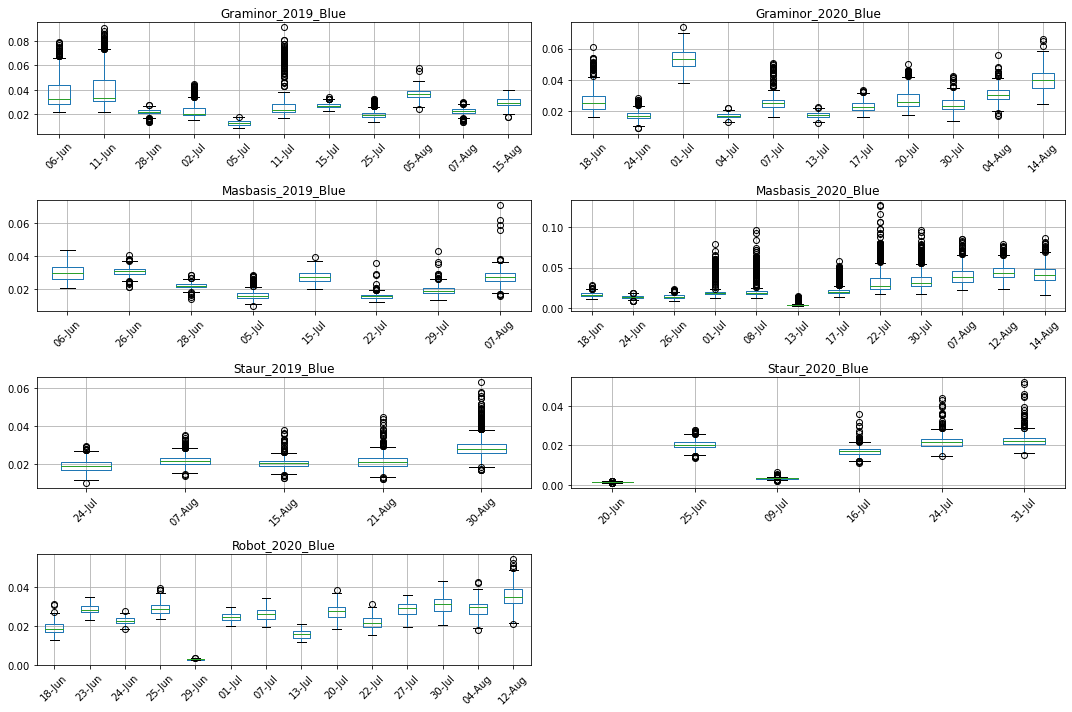

Green


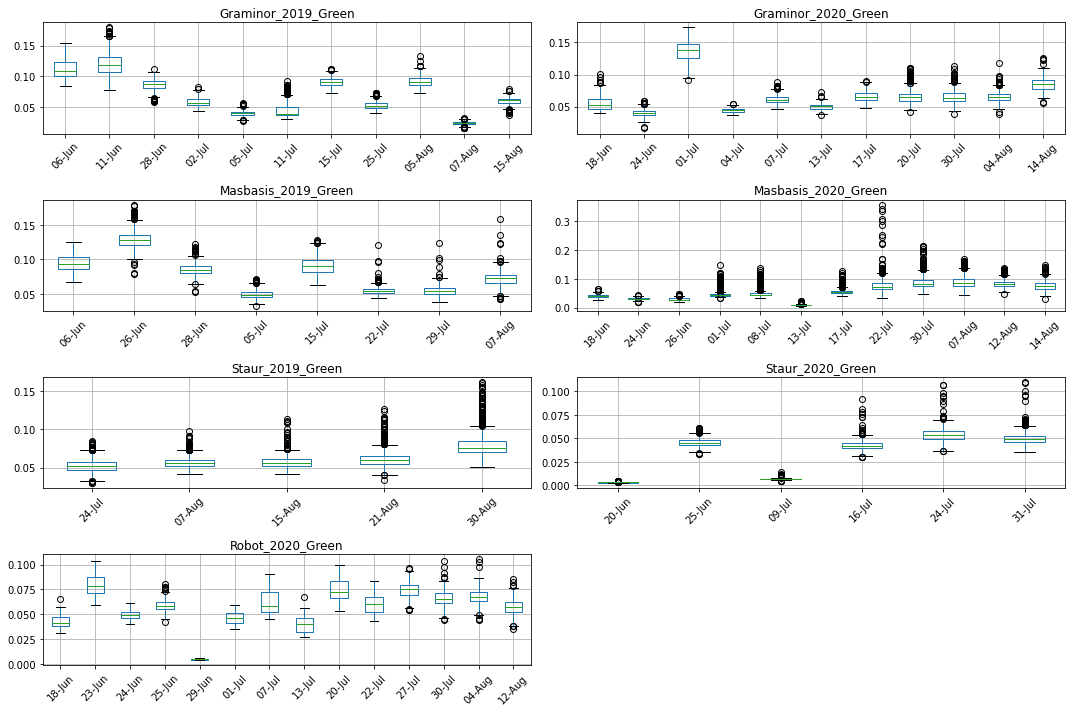

Red


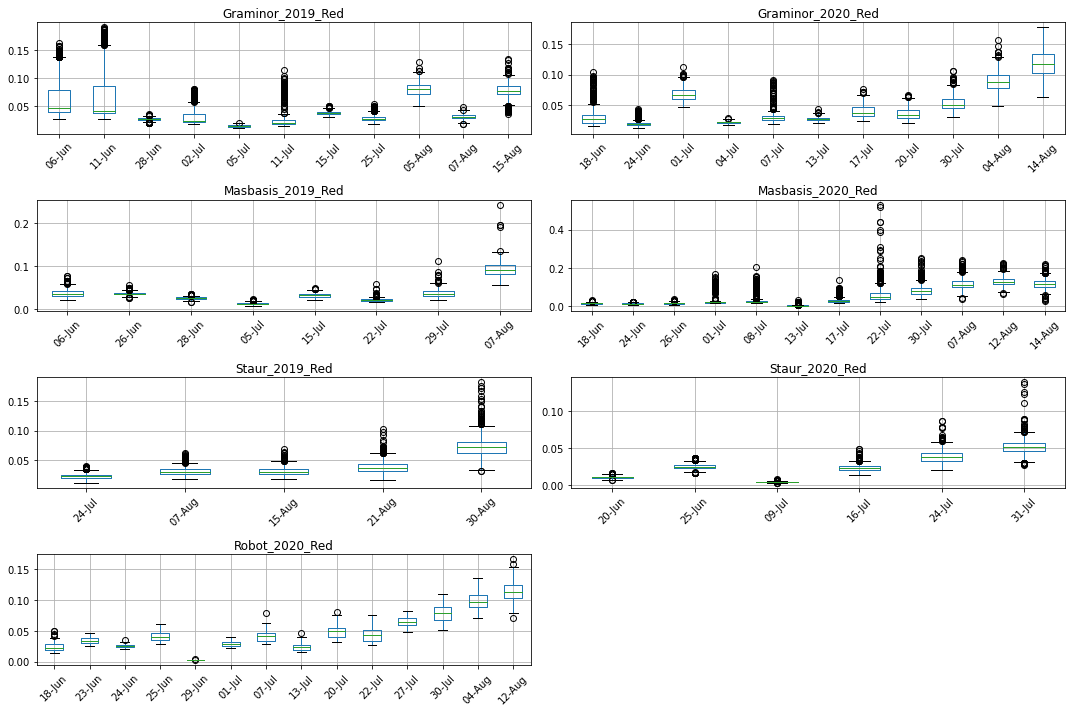

RedEdge


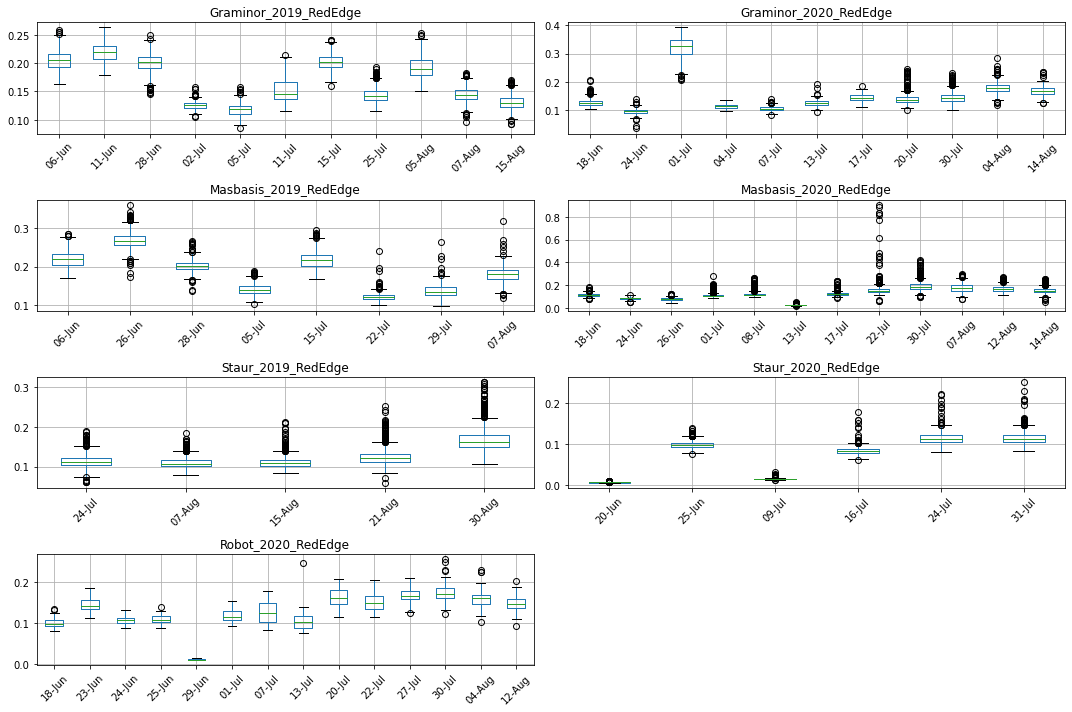

NIR


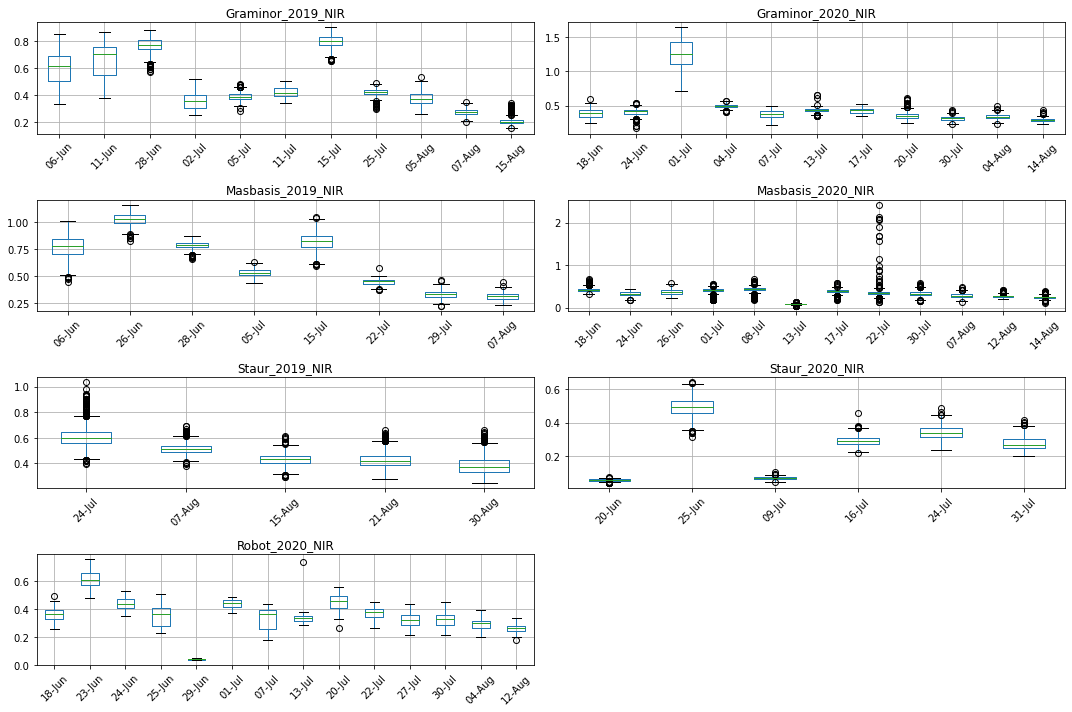

NDVI


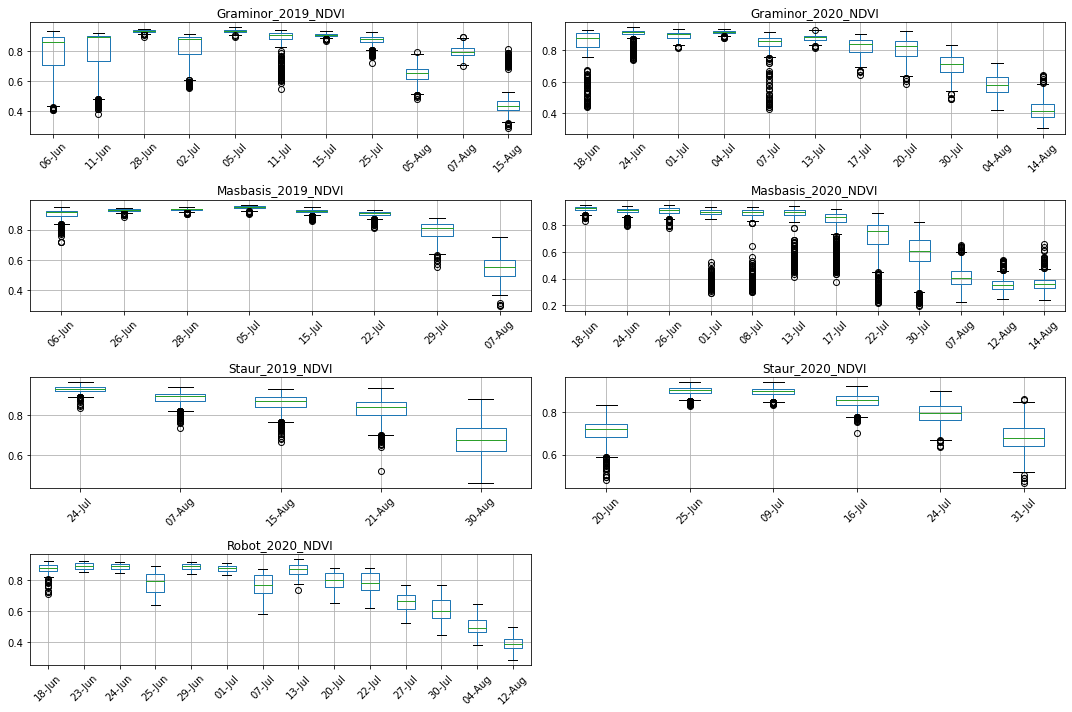

MTCI


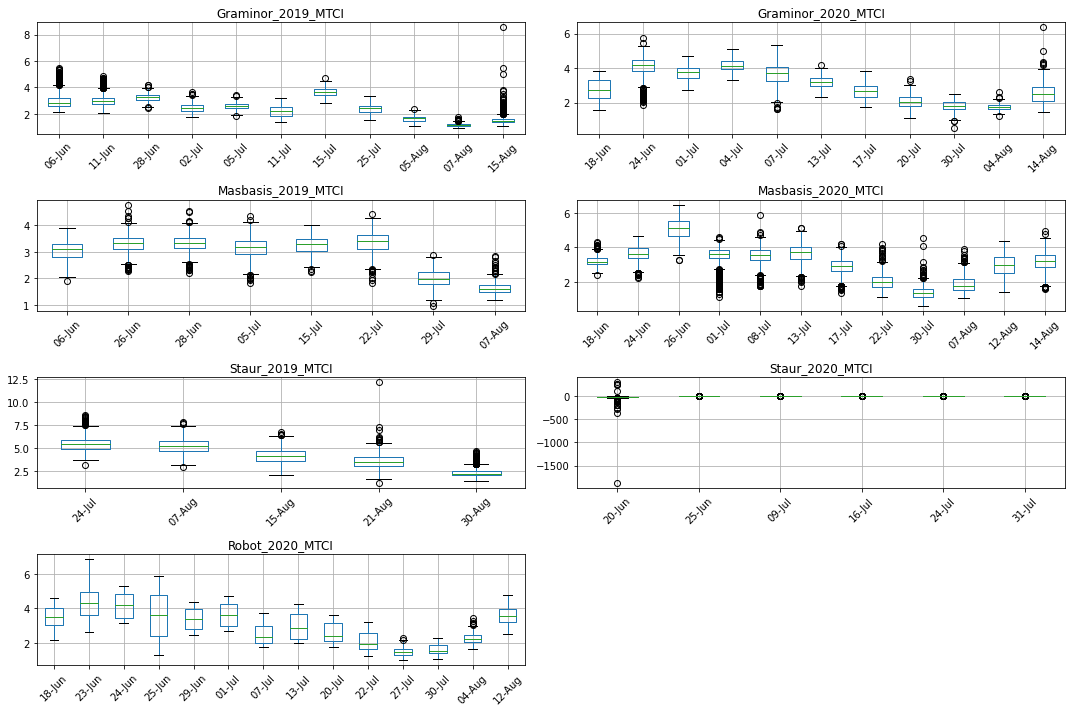

DVI


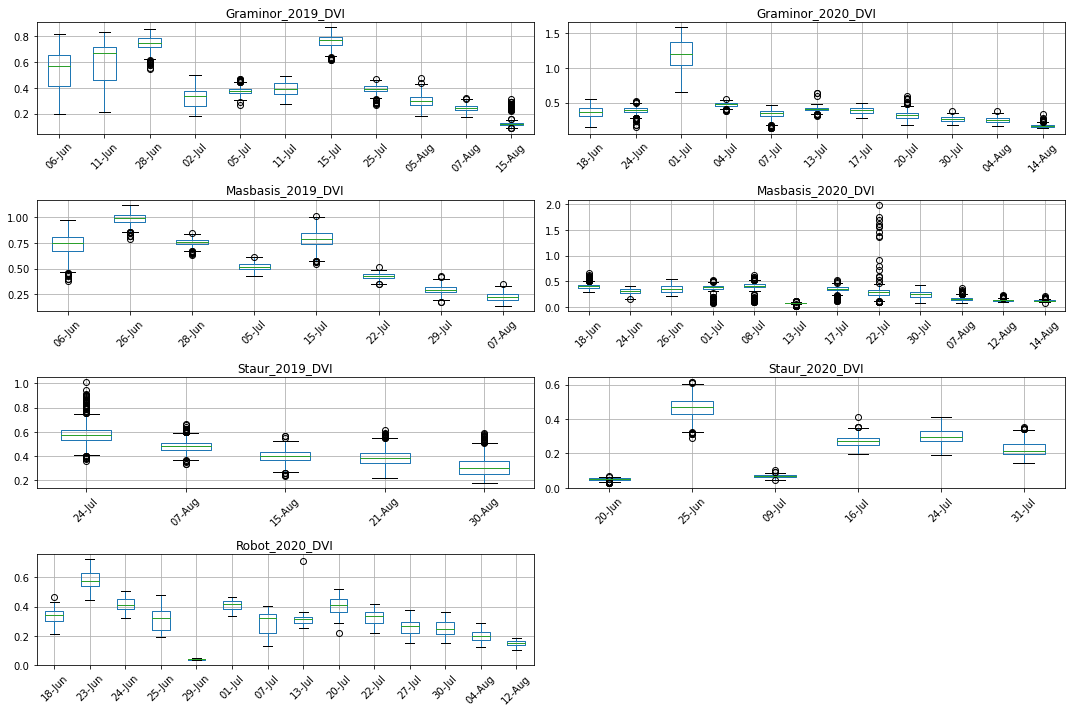

GDVI


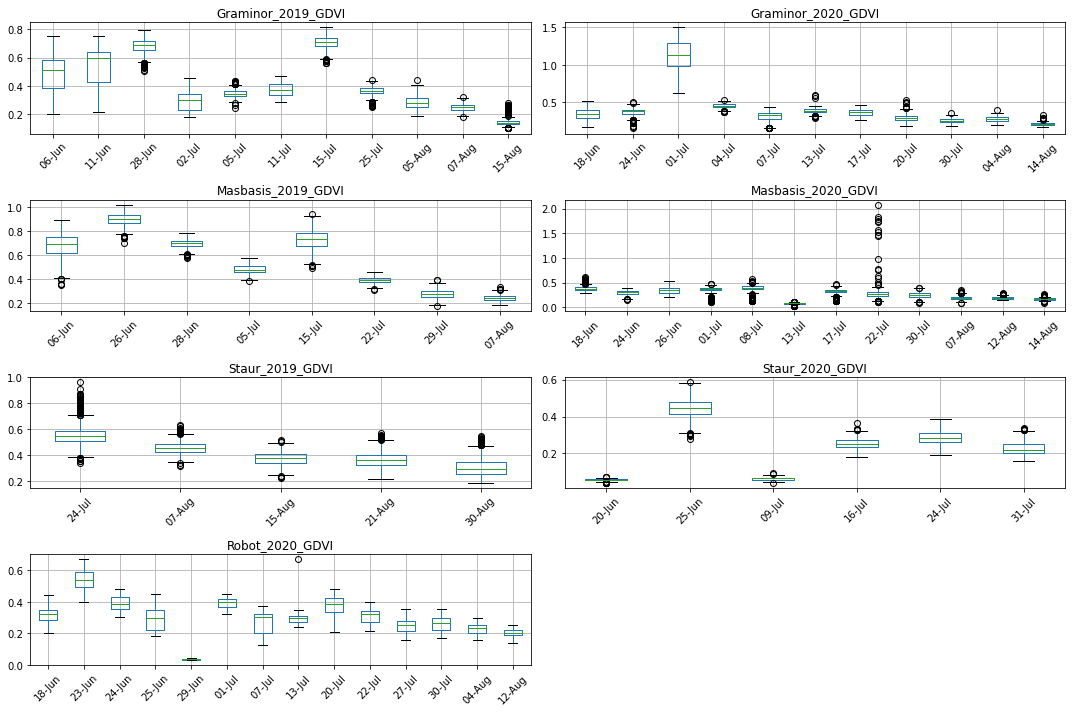

MTCI_CI


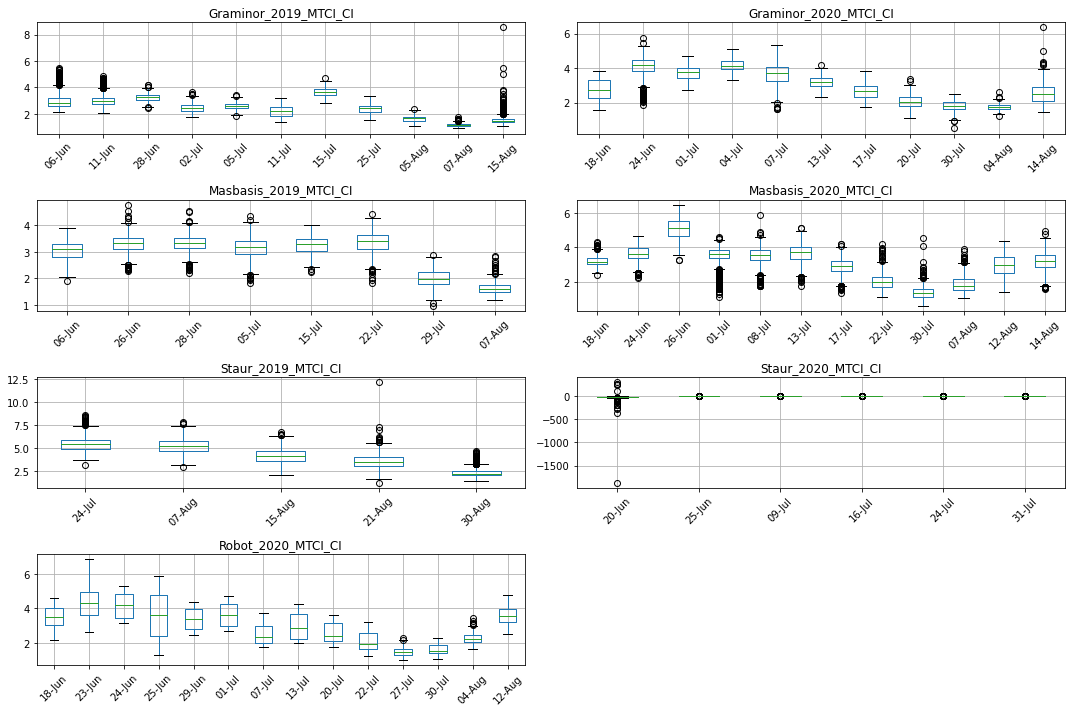

EXG


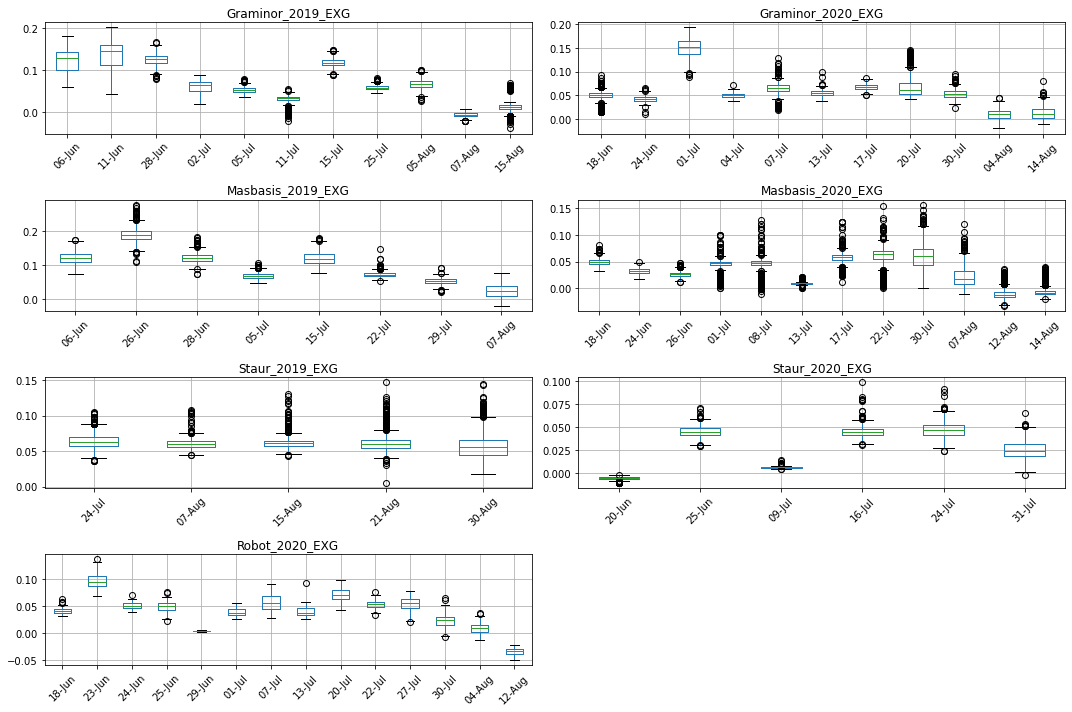

EXGR


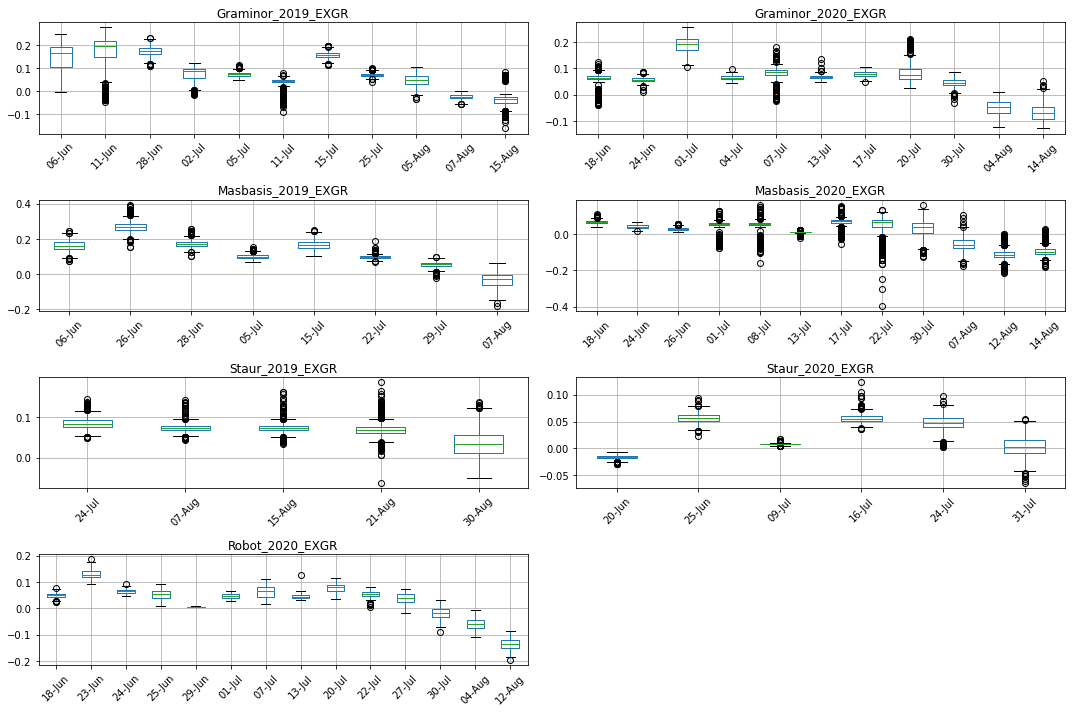

RDVI


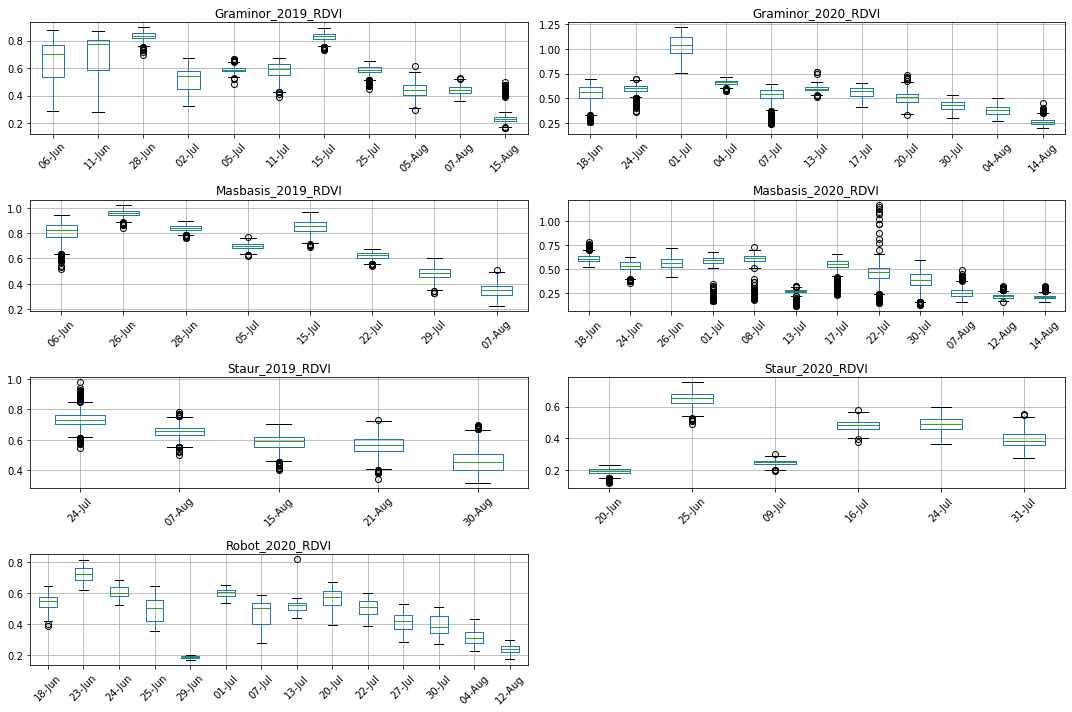

TDVI


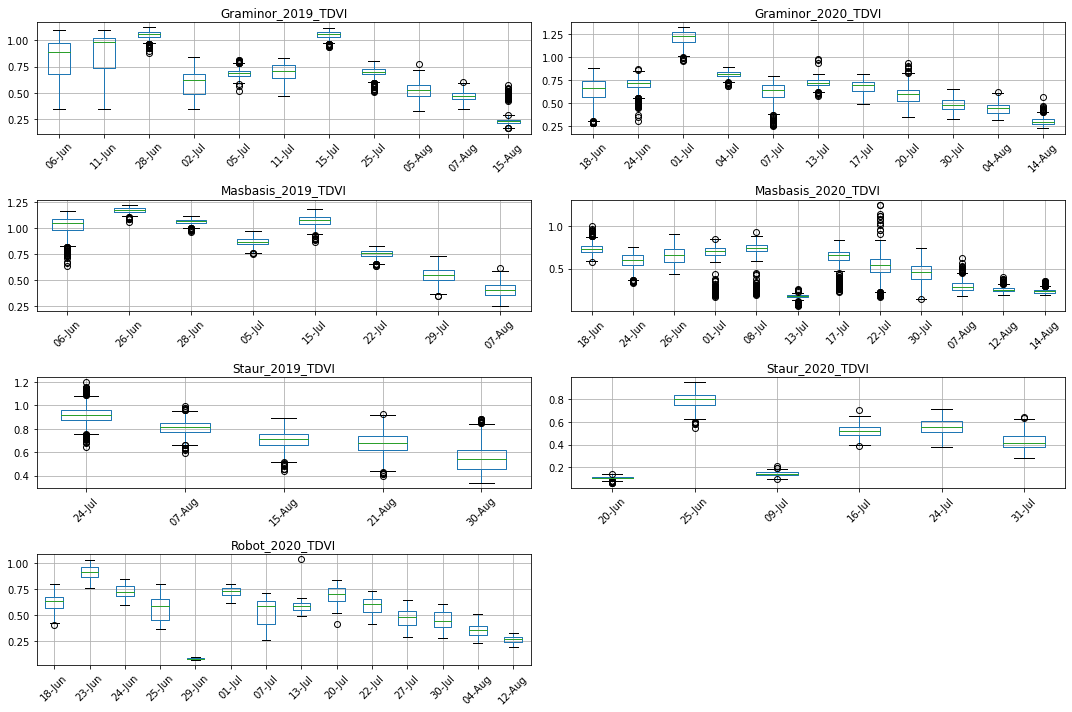

GNDVI


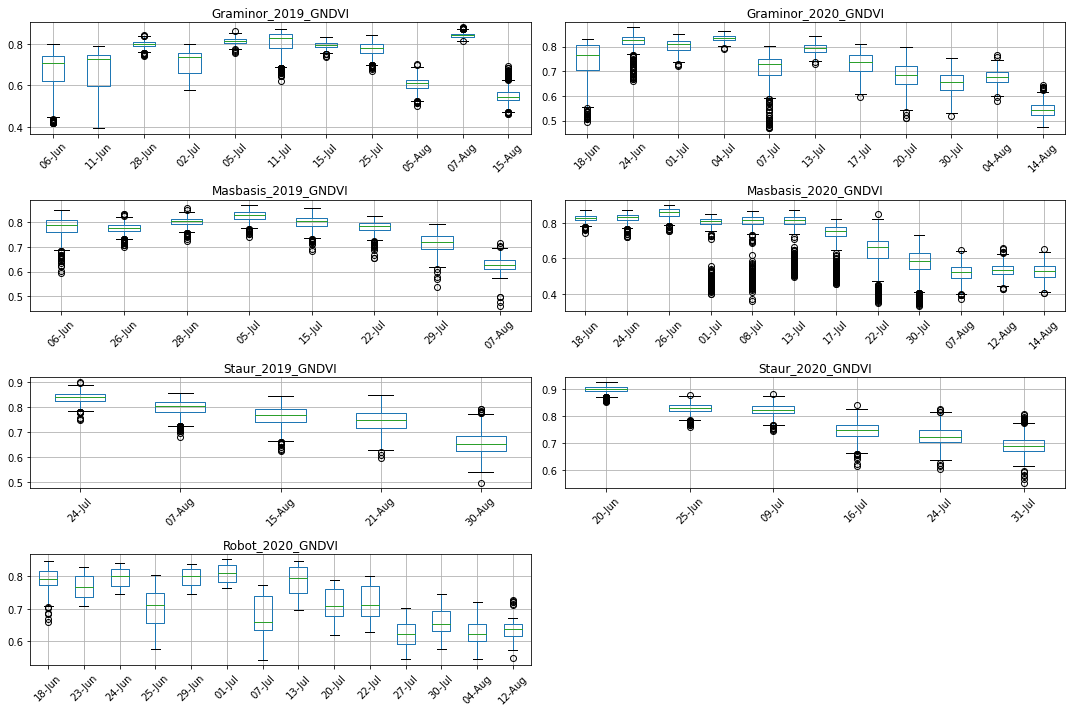

NDRE


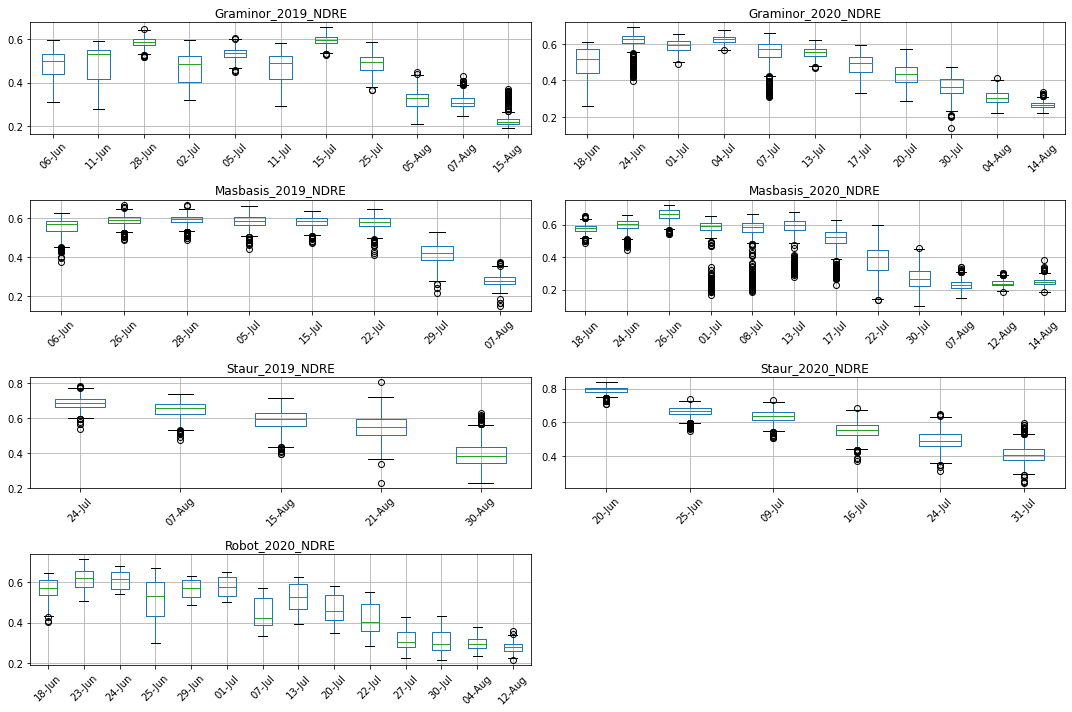

SCCI


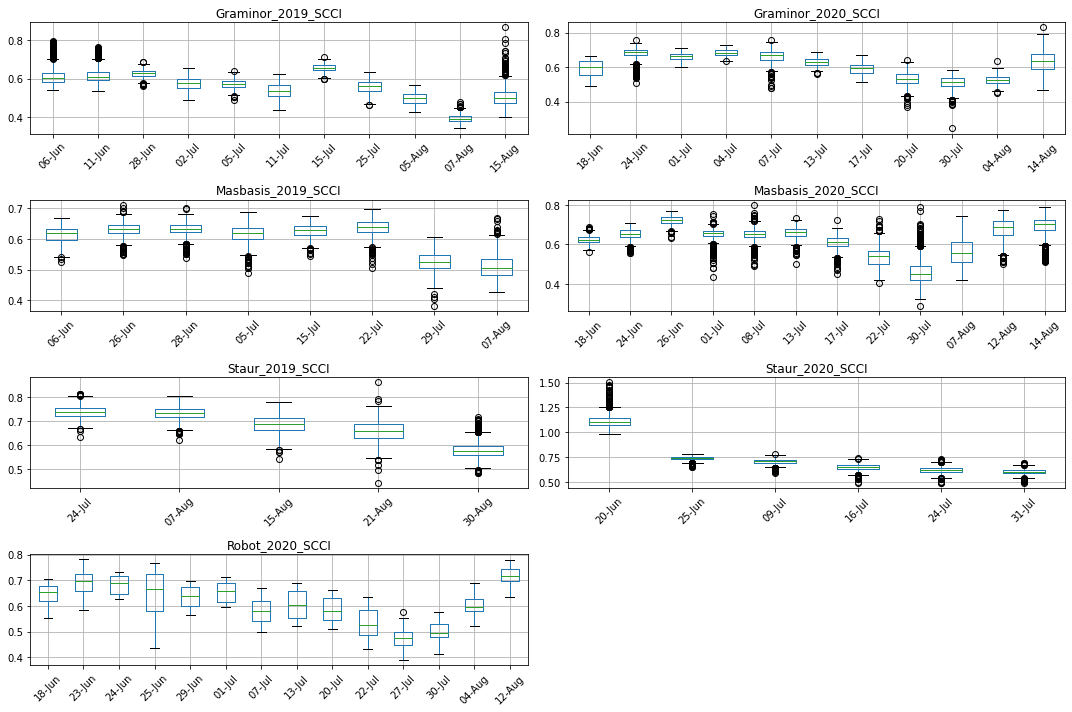

EVI


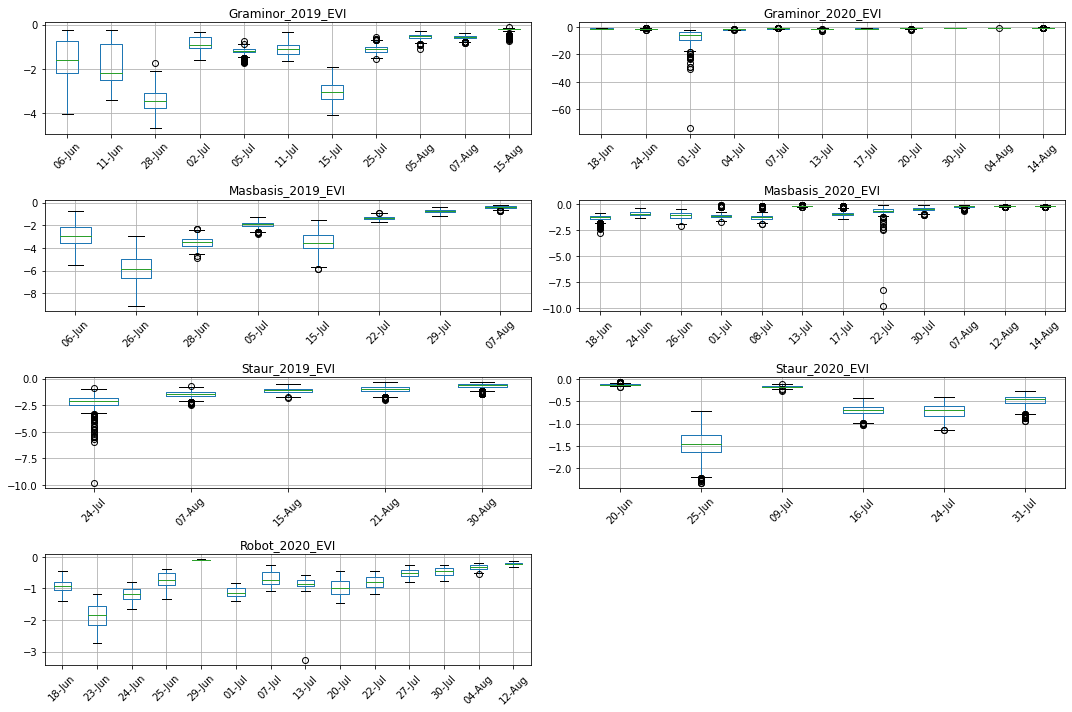

TVI


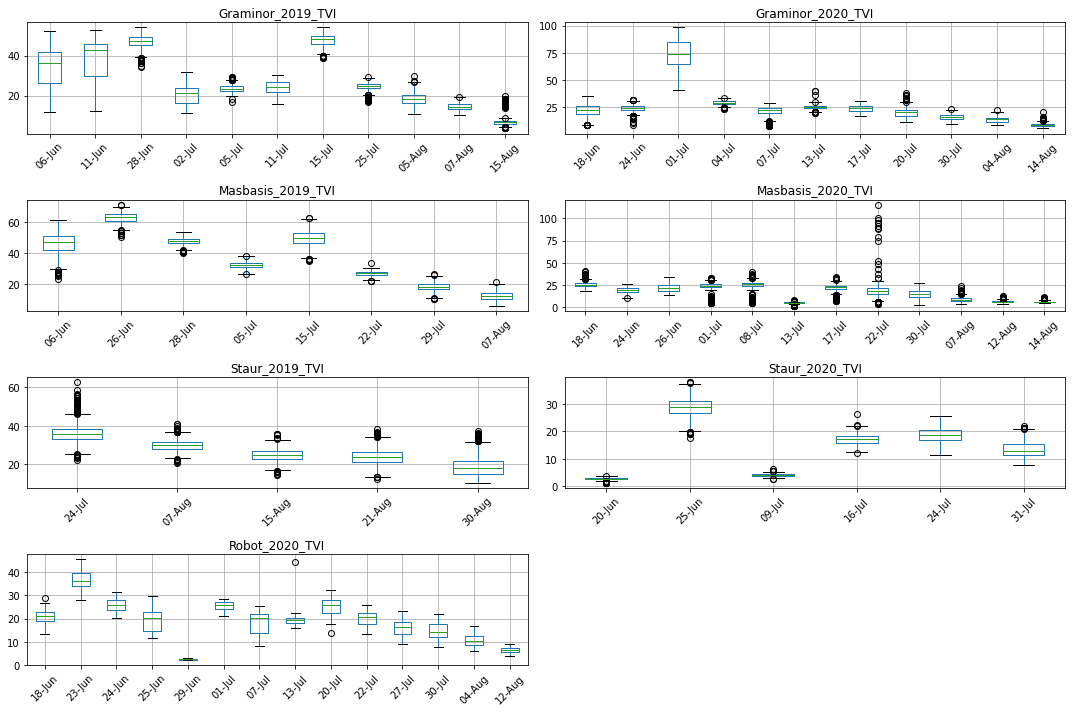

VARI


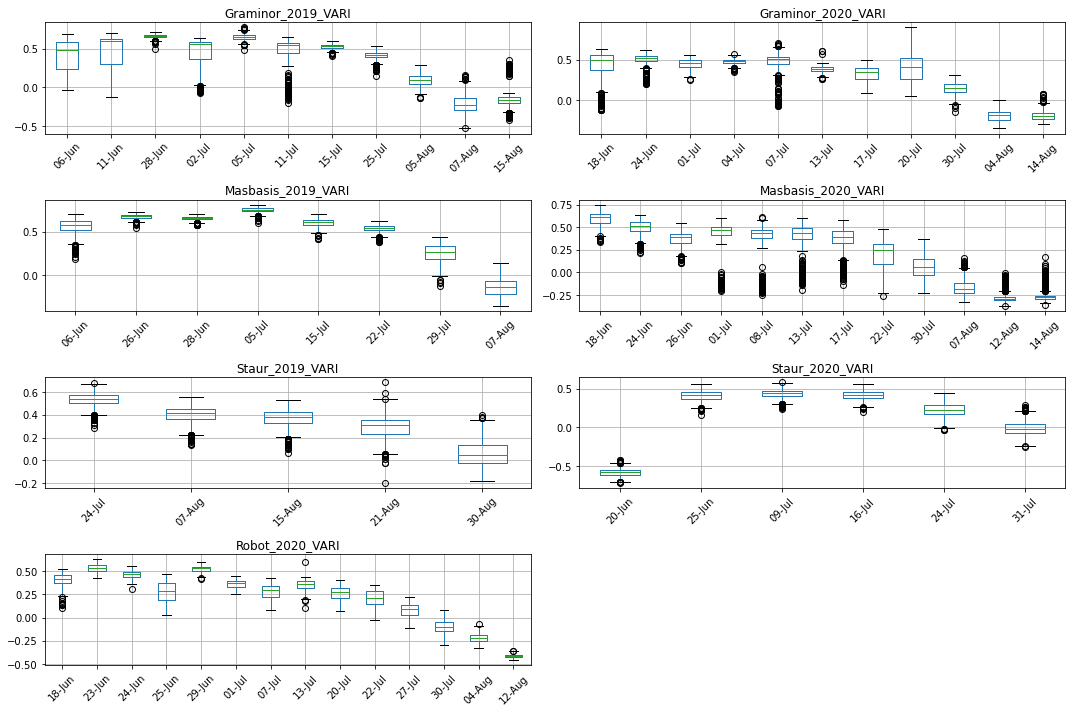

GARI


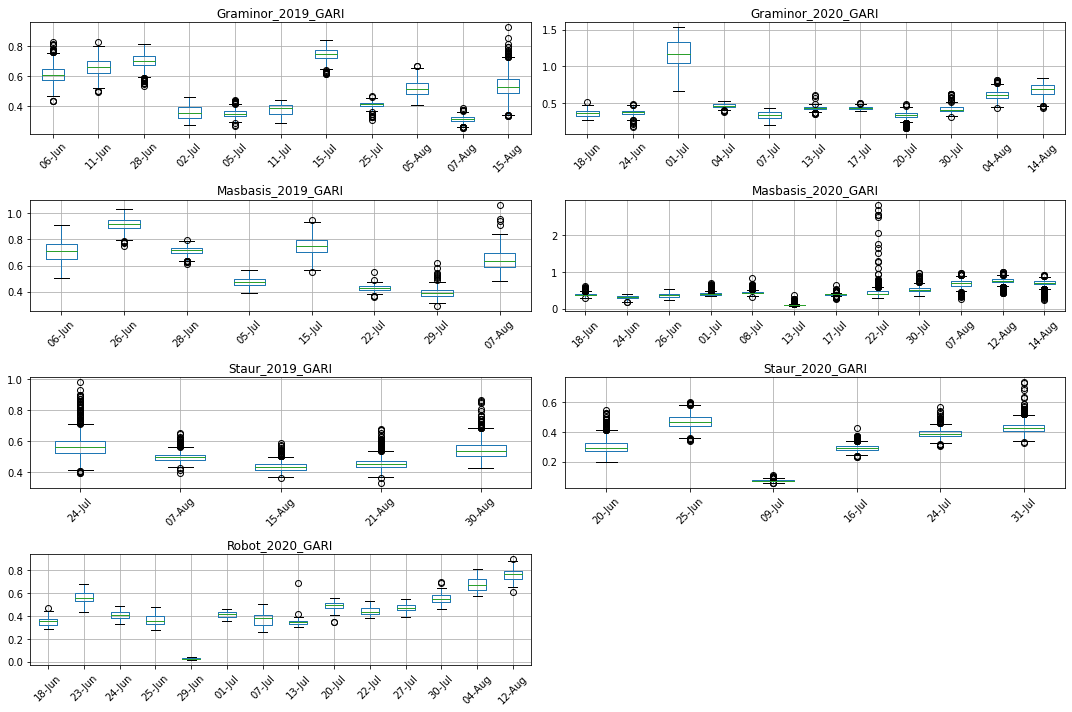

GCI


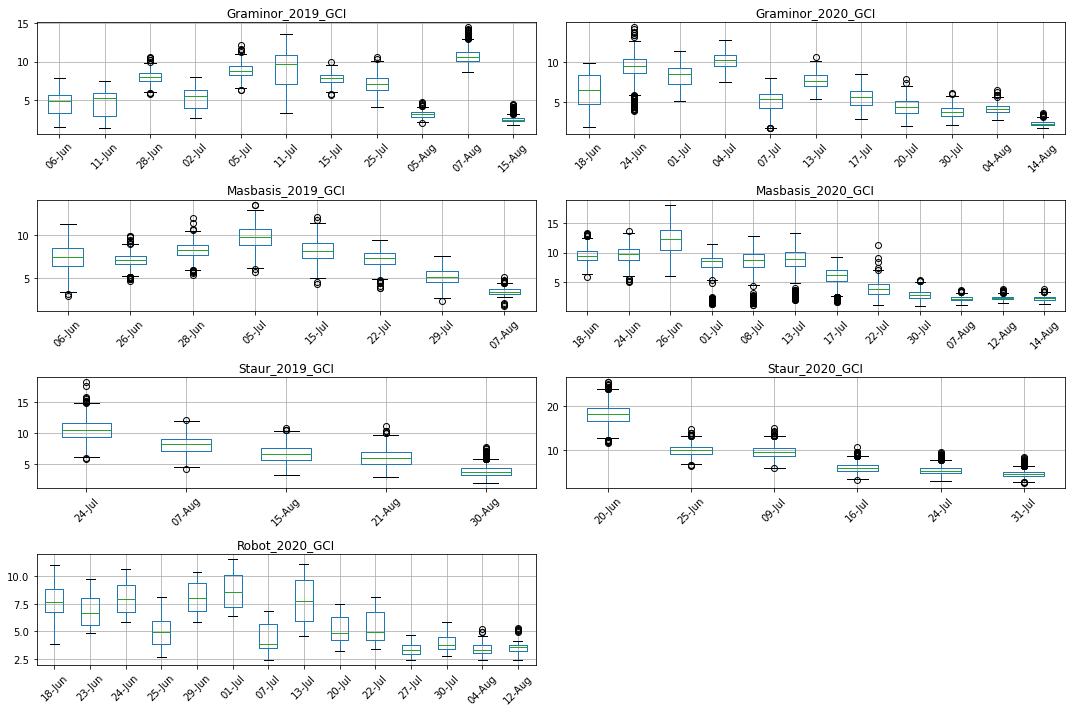

GLI


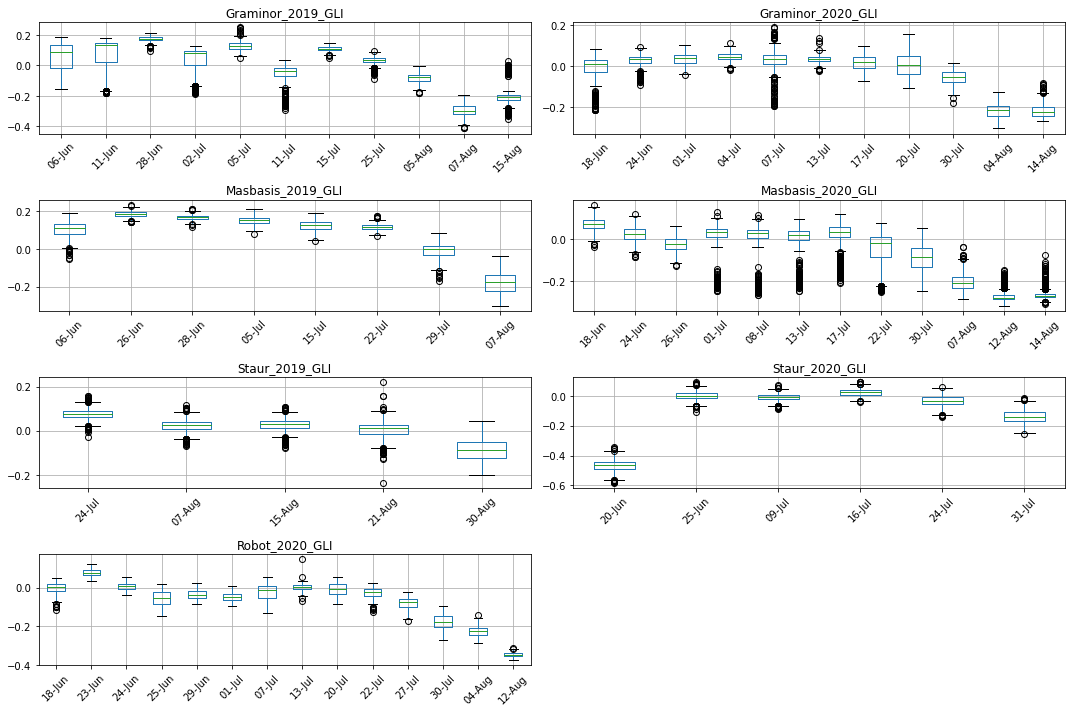

NLI


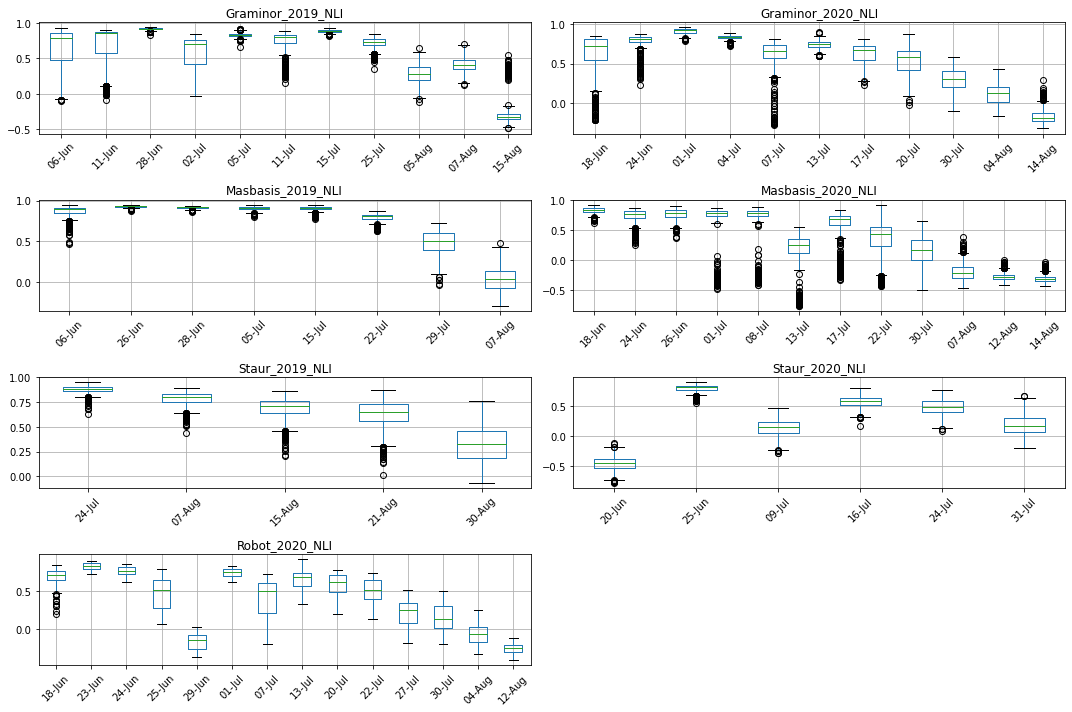

MNLI


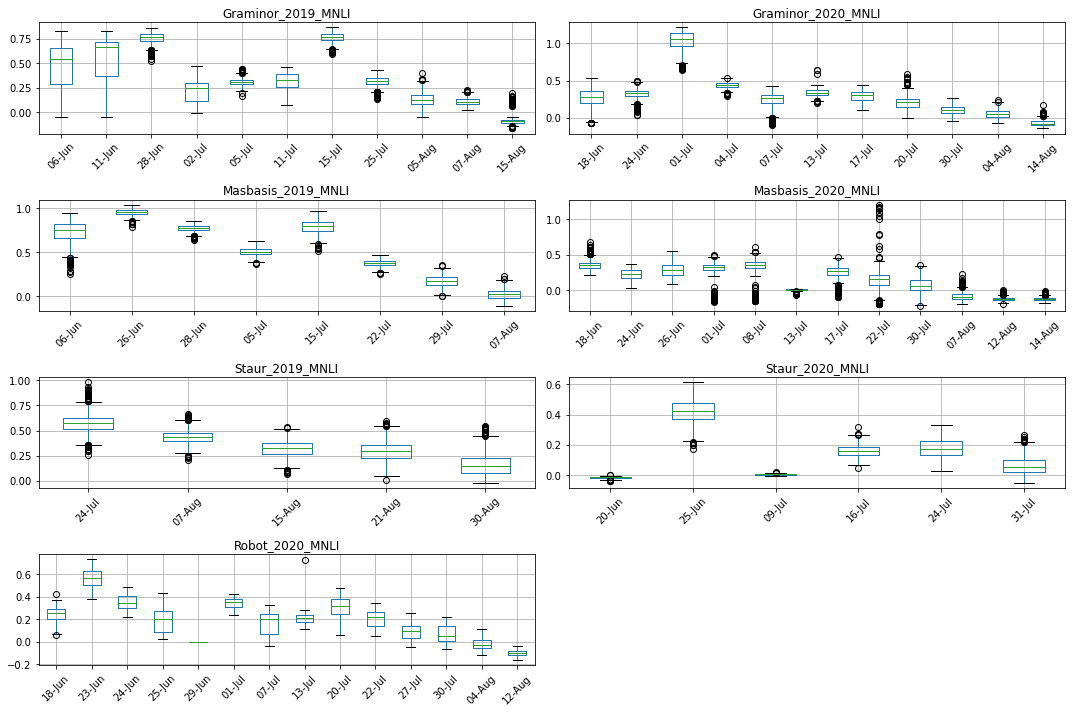

SAVI


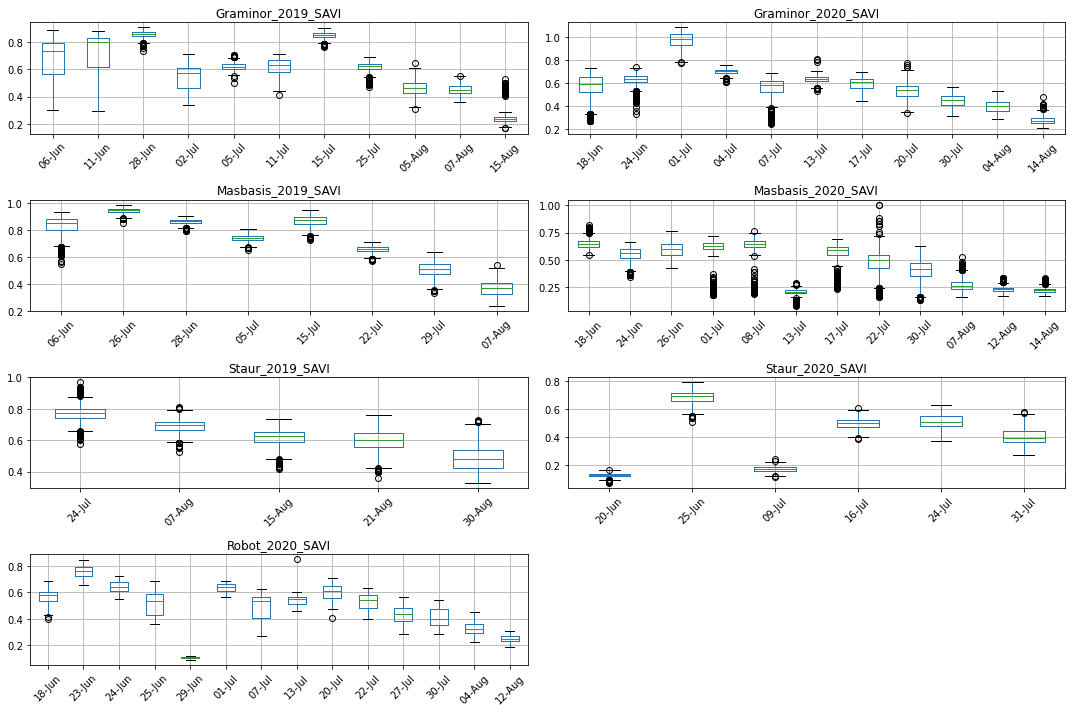

GSAVI


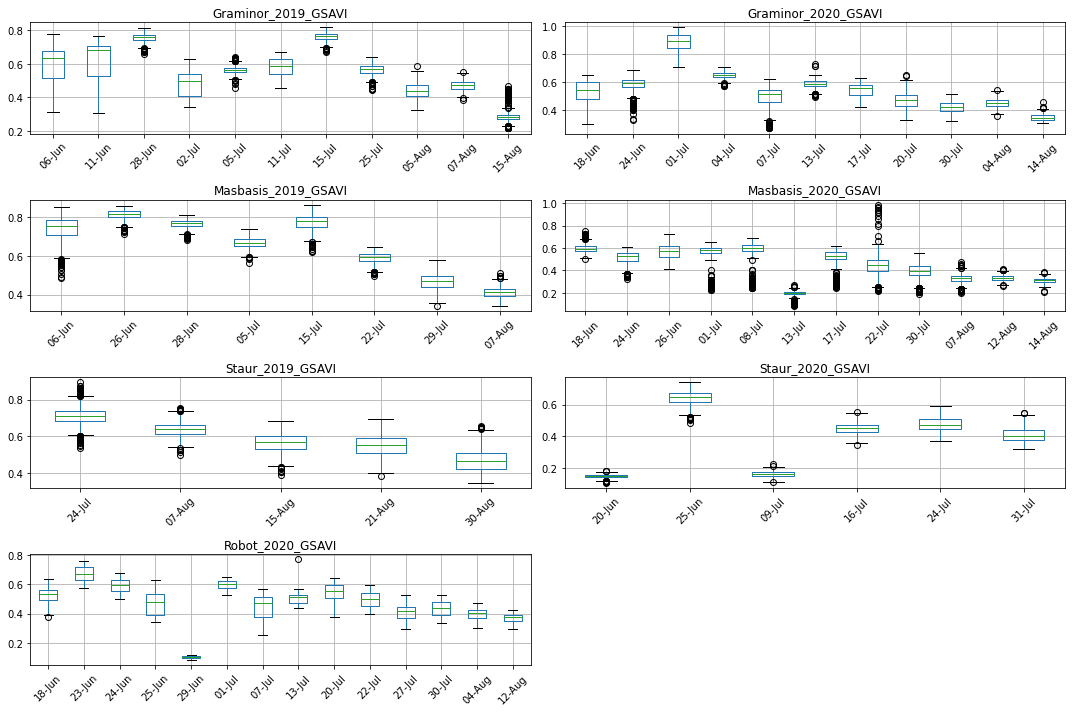

OSAVI


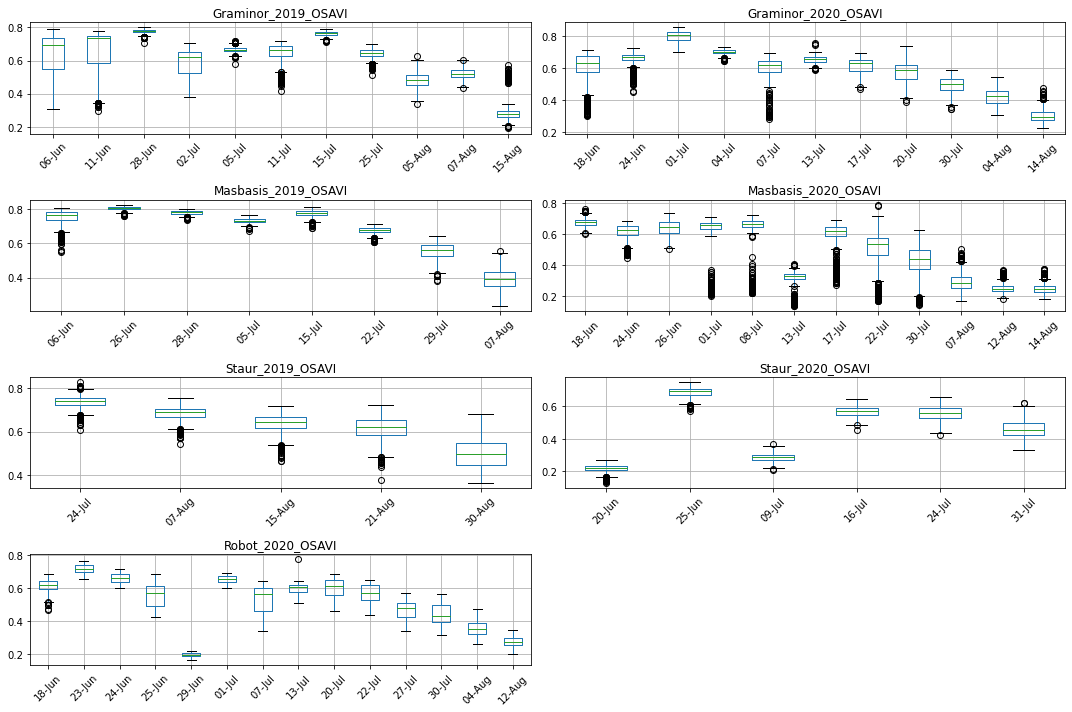

GOSAVI


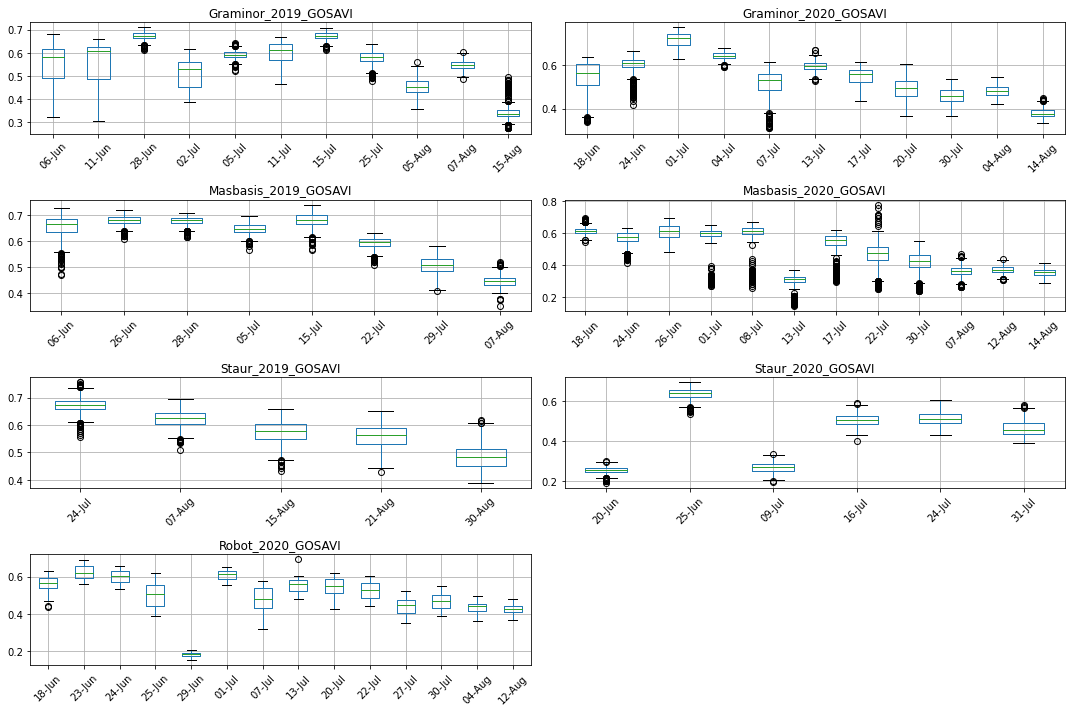

MSAVI2


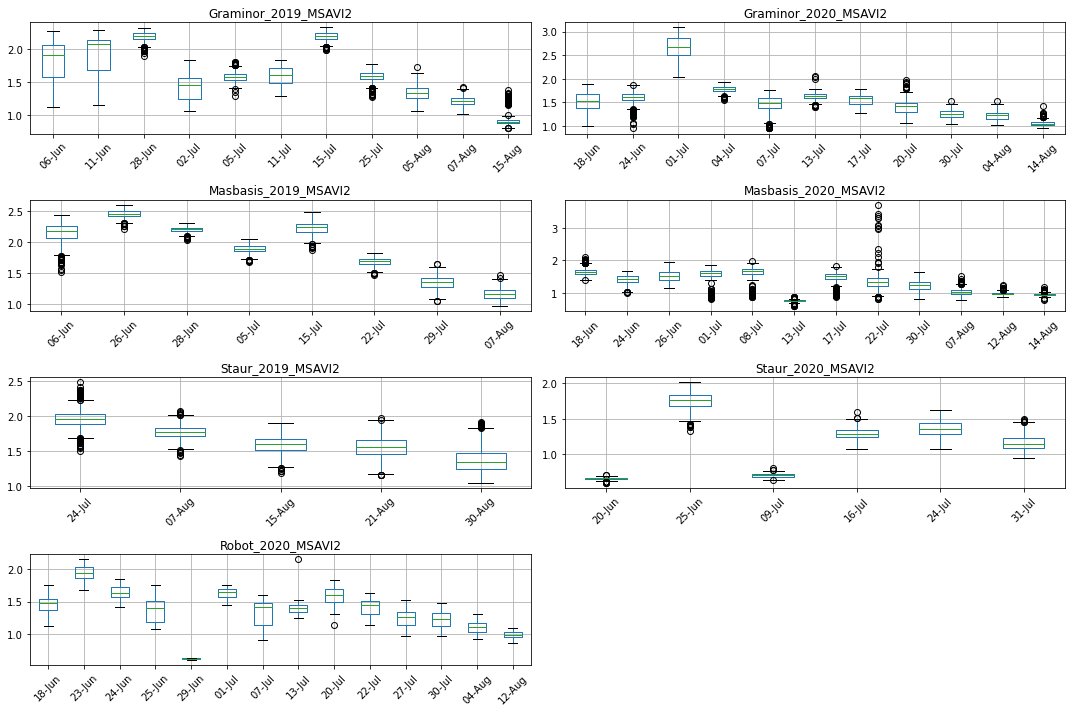

MSR


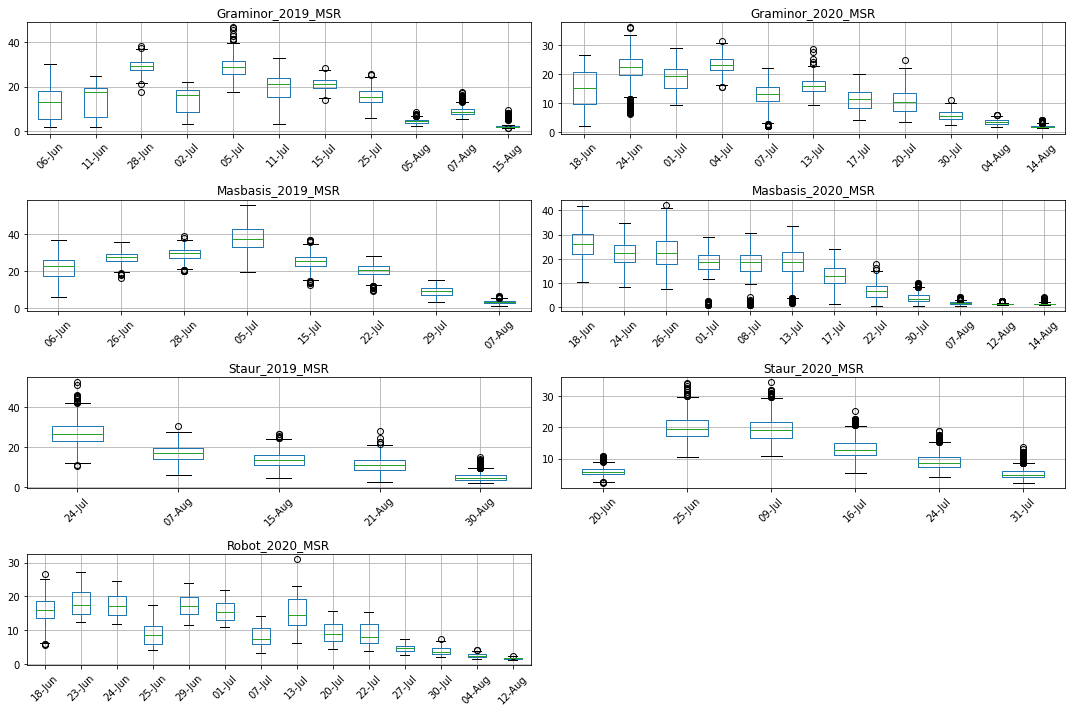

GRVI


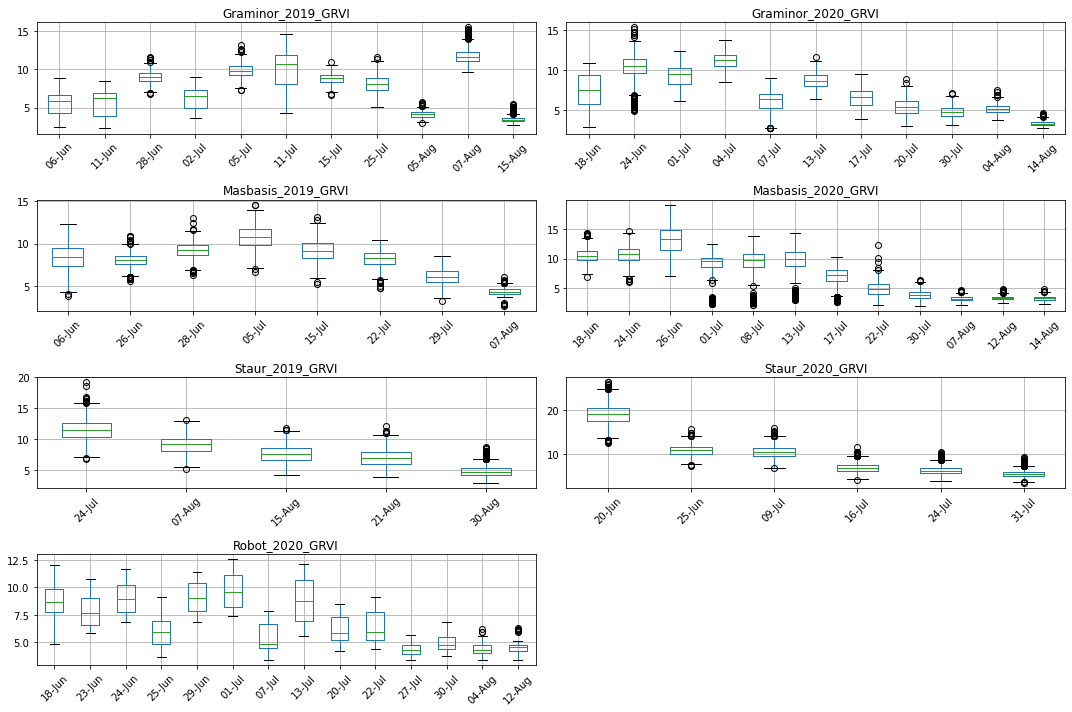

WDRVI


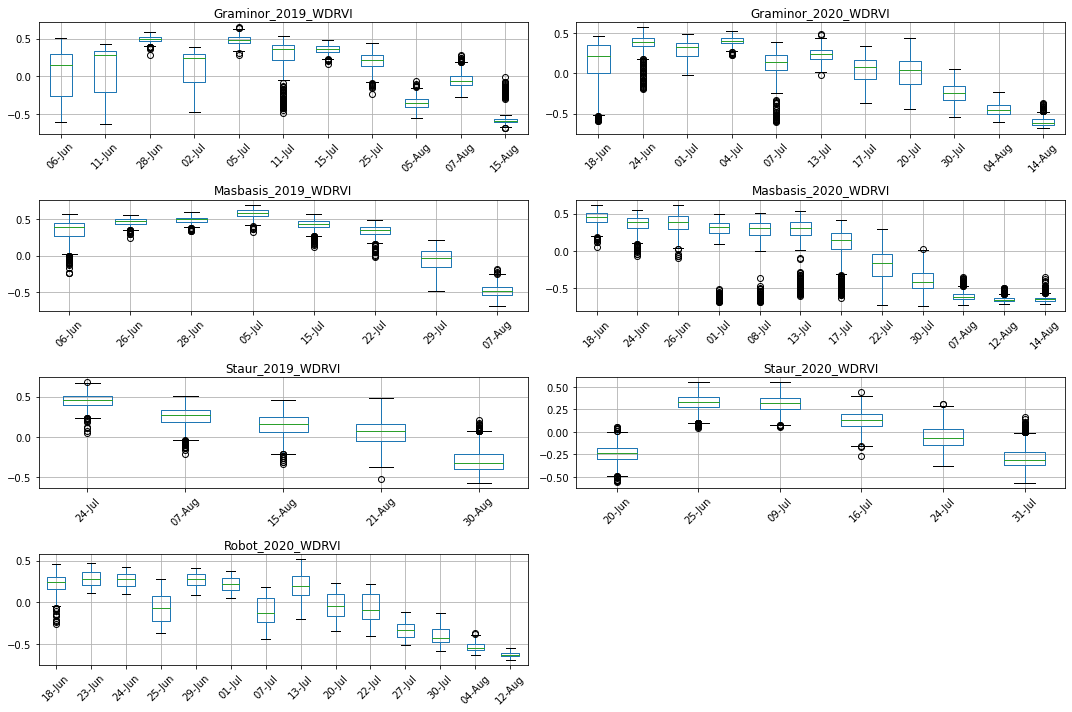

SR


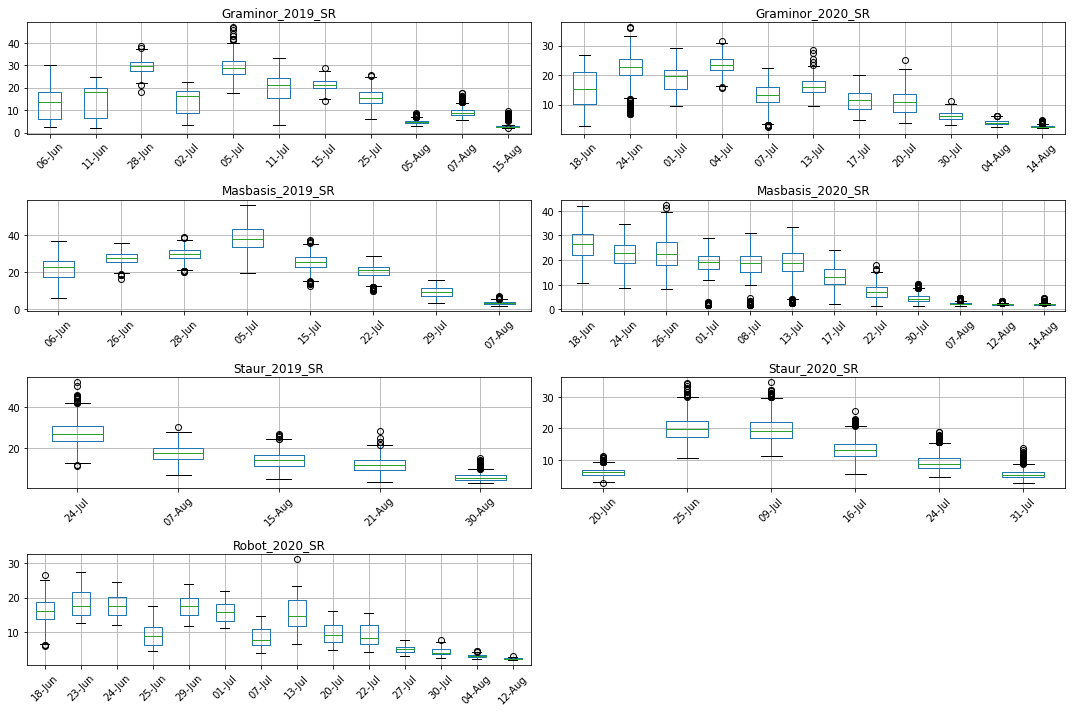

In [130]:
from matplotlib.backends.backend_pdf import PdfPages

# Create plots folder if not exists already
os.makedirs(path+'/plots/', exist_ok=True)
pdf = PdfPages(path+'/plots/'+'Plots_median.pdf')

for d_type in data_agg_list:
    for col in base_indices+spectral_indices:
        print(col)
        fields = len(sorted_field_year_dict_yield.keys())
        rows = math.ceil(fields/2)
        fig_size=(15,10)
        n_plot = 0
        
        if fields < 2:
            columns = 1
            fig, ax = plt.subplots(rows,columns, figsize=fig_size)
            plots = [ax]
        else:
            columns = 2
            fig, ax = plt.subplots(rows,columns, figsize=fig_size)
            plots = ax.flatten()
            # Remove the last fig if the number of fields is an odd number
            if not (fields % 2) == 0:
                fig.delaxes(ax[rows-1,1])
            
        for field_sample, dates in sorted_field_year_dict_yield.items():
            
            # Adding required data to a temp dataframe
            temp_df = pd.DataFrame()
            for date in dates:
                date_str = date.strftime('%d%m%y')
                field_df = field_sample[:-5]+'_'+date_str+d_type
                col_name = date.strftime('%d-%b')+'_'+col
                temp_df[col_name] = locals()[field_df][col]
            
            # Adding field plot to the subplots
            
            ax_n = plots[n_plot]
            x_labels = [date[:-(len(col)+1)] for date in temp_df.columns.tolist()]
            temp_df.boxplot(ax=ax_n)

            ax_n.set_xticklabels(x_labels, rotation=45)
            data_type = d_type.split('_')[2]
            ax_n.set_title(field_sample+'_'+col)
            
#             # Printing the grain yield in plot of the fiels_sample for reference
#             text = "Grain Yield"
#             ax_n.text(0.85, 1.05, text, ha='center', va='top', weight='bold', color='blue', transform=ax_n.transAxes)
            n_plot += 1
    
        plt.tight_layout()

        # Create plots folder if not exists already
        os.makedirs(path+'/plots/', exist_ok=True)
#         plt.savefig(path+'/plots/'+col+'.png',dpi=500, bbox_inches='tight')
#         plt.savefig(path+'/plots/'+col+'.pdf',dpi=500, bbox_inches='tight')
        plt.savefig(path+'/plots/'+col+'.jpg',dpi=150, bbox_inches='tight')

        pdf.savefig(fig)

        plt.show()
pdf.close()

# ToDo: Identify df which are outliers

Identify the datasets from the plots above which do not aligh with the trends of their neighbouring datasets.

## Drop outlier datasets

**OLD**
Graminor 2019	7 Aug Green  
Masbasis 2019	15-Jul BlueGreenRedRedEdgeNIR  
Masbasis 2020	13 jul BlueGreenRedRedEdgeNIR  
Robot 2020	29Jun BlueGreenRedRedEdgeNIR  

In [131]:
outliers = {
    'Graminor_2019':'',
    'Masbasis_2019':'150719',
    'Masbasis_2020':'130720',
    'Robot_2020':'290620'
           }
outliers

{'Graminor_2019': '',
 'Masbasis_2019': '150719',
 'Masbasis_2020': '130720',
 'Robot_2020': '290620'}

## Update field_year_dict and sorted_field_year_dict

In [132]:
sorted_field_year_dict.keys()
# field_year_dict
sorted_field_year_dict_yield.keys()

dict_keys(['Graminor_2019', 'Graminor_2020', 'Masbasis_2019', 'Masbasis_2020', 'Staur_2019', 'Staur_2020', 'Robot_2020'])

# Merge data at plots

## Merging datasets on Plot_ID 

In [133]:
# data_agg_list = ['_yield_median_indices']
# yield_cols = ['GrainYield']
list_agg_df = []
# In this loop we select which aggregated data type we will use for further processing.
# It is defined in the list data_agg_list
for d_type in data_agg_list:
    
    for field_sample, dates in sorted_field_year_dict_yield.items():

        # Adding required data to a temp dataframe
        temp_df_all = field_sample+'_all'
        locals()[temp_df_all] = pd.DataFrame()

        for date in dates:
            date_str = date.strftime('%d%m%y')
            field_df = field_sample[:-5]+'_'+date_str+d_type
#             print(field_df)
            temp_df = locals()[field_df].copy()
    
            # Adding date as a suffix to all column headings except Plot_ID
            columns_temp = ['Plot_ID']+[x+'_'+date_str for x in temp_df.columns[1:]]
            
            # Making a temp list of yield columns since all entries from yield cols are not present in every df
            temp_yield_cols = [x for x in temp_df.columns if x in yield_cols]

            # Removing the date suffix from the yield columns
            for ycol in temp_yield_cols:
                temp_yield_col = ycol+'_'+date_str
                if temp_yield_col in columns_temp:
                    index_yield = columns_temp.index(temp_yield_col)
                    if columns_temp[index_yield] == temp_yield_col:
                        columns_temp.remove(temp_yield_col)
                        columns_temp.insert(index_yield, ycol)

            temp_df.columns = columns_temp
            
            # Dropping Date Column, if it exists, as it is not necessary...
            # since date imformation is moved to column headings
            if (date_col+'_'+date_str in temp_df.columns):
                temp_df.drop(columns=[date_col+'_'+date_str], inplace=True)
        
            # For first dataset, keep all columns
            if locals()[temp_df_all].shape[1] < len(base_indices):
                locals()[temp_df_all] = temp_df.copy()
#                 display(temp_df)
            
            # For the remaining, delete yield columns
            else:
                # Dropping grain yield columns to avoid duplication
                for col in temp_yield_cols:
                    temp_df.drop(columns=[col], inplace=True)
                


                # Merging dataframes
#                 locals()[temp_df_all] = pd.concat([locals()[temp_df_all].set_index('Plot_ID'),temp_df.set_index('Plot_ID')], axis=1, join='inner').reset_index()
            
                # The following does not handle duplicate values in the reference column. It will not merge them, rather keep both.
                # So the duplicates should have be dealt with before this step
                locals()[temp_df_all] = locals()[temp_df_all].merge(temp_df, on='Plot_ID', how='left', suffixes=('', date_str))
            
#                 locals()[temp_df_all] = locals()[temp_df_all].join(temp_df, on='Plot_ID', lsuffix='', rsuffix='_right')

#                 display(locals()[temp_df_all])


        list_agg_df.append(temp_df_all)  
        print(temp_df_all, locals()[temp_df_all].shape)
#         display(locals()[temp_df_all].head())
        

Graminor_2019_all (600, 378)
Graminor_2020_all (400, 378)
Masbasis_2019_all (528, 278)
Masbasis_2020_all (688, 416)
Staur_2019_all (1328, 346)
Staur_2020_all (1506, 209)
Robot_2020_all (96, 484)


### Test: Checking if GrainYield columns have been renamed/corrected

In [134]:
# Test: Checking if GrainYield columns have been renamed/corrected

find_text_in_cols = 'Grain'
for df in list_agg_df:
    temp_cols = locals()[df].columns.to_list()
    temp_grain_cols = [s for s in temp_cols if find_text_in_cols in s]
    print(df, temp_grain_cols)

Graminor_2019_all ['GrainYield']
Graminor_2020_all ['GrainYield']
Masbasis_2019_all ['GrainYield']
Masbasis_2020_all ['GrainYield']
Staur_2019_all ['GrainYield']
Staur_2020_all ['GrainYield']
Robot_2020_all ['GrainYield']


## Test: Checking if the number of columns is correct

In [135]:
Graminor_050819_yield_median_indices 

,Plot_ID,Blue,Green,Red,RedEdge,NIR,GrainYield,Name,Pedigree,NDVI,MTCI,DVI,GDVI,MTCI_CI,EXG,EXGR,RDVI,TDVI,GNDVI,NDRE,SCCI,EVI,TVI,VARI,GARI,GCI,GLI,NLI,MNLI,SAVI,GSAVI,OSAVI,GOSAVI,MSAVI2,MSR,GRVI,WDRVI,SR
0,101,0.03803116083145,0.08950795233250,0.11108756065369,0.20793855190277,0.33830684423447,499.6244402277,Zebra,Ralle/Dragon,0.50561217743094,1.34607081094721,0.22721928358078,0.24879889190197,1.34607081094721,0.02989718317986,-0.03611744940281,0.33894665764037,0.40013453823074,0.58155747276269,0.23866250087157,0.47202680537530,-0.35207005192038,12.76997268199920,-0.13274502088041,0.66329767999476,2.77962890914711,-0.18166558601885,0.01491519864177,0.00695474638361,0.35899613860830,0.40223365614974,0.37286079714251,0.42326068236975,1.17829672314587,2.47237713239598,3.77962890914711,-0.53310662290397,3.04540708467918
1,102,0.03603747859597,0.08863708749414,0.09795098751783,0.20319047570229,0.33689895272255,515.53275142315,GN14547,SW45126/NK01533,0.54949522373770,1.27051622282611,0.23894796520472,0.24826186522841,1.27051622282611,0.04328570887446,-0.00520858615637,0.36235447506804,0.42493433747998,0.58340972741580,0.24756729160617,0.45053583891450,-0.39272539703163,13.96432191133494,-0.06186558037912,0.60085690067844,2.80088022121486,-0.14570132303413,0.07353879263356,0.03278489453515,0.38340051422040,0.40235364336049,0.40169452670392,0.42399075065737,1.20209468661077,2.90025875628387,3.80088022121486,-0.48815452223948,3.43946458591047
2,103,0.03329745121300,0.08074614033103,0.10181091353297,0.18583717197180,0.31033453345299,529.50102466793,Tarrafal,NaN,0.50594667839948,1.48164828226677,0.20852361992002,0.22958839312196,1.48164828226677,0.02638391591609,-0.03540522269904,0.32481045683039,0.37435355442291,0.58706146458353,0.25091588278821,0.49593345208226,-0.33627161495714,11.66882626712328,-0.14112842877651,0.64388444894280,2.84333581990085,-0.18328424181329,-0.02777828750025,-0.01182476481258,0.34291179209804,0.38647745351776,0.36445910916273,0.41661485158875,1.13118483195408,2.47537360350432,3.84333581990085,-0.53278480564049,3.04814604529096
3,104,0.03360477834940,0.07923398911953,0.09677043929696,0.18409106135368,0.31025590002537,544.50398481973,GN12760,NK02529/NK01533//NK01568,0.52450035809438,1.44484585313341,0.21348546072841,0.23102191090584,1.44484585313341,0.02809276059270,-0.02815186530352,0.33462396895619,0.38466600495773,0.59313968691981,0.25521515965170,0.48658719810782,-0.35057327224373,12.10766963660718,-0.12314953140102,0.61410163760893,2.91569203410074,-0.17705533401977,-0.00265097661407,-0.00110756334050,0.35305280255904,0.38958606566275,0.37650007755116,0.42042977581507,1.14140460737972,2.64761724419014,3.91569203410074,-0.51445142431106,3.20610201089695
4,105,0.03652532957494,0.08715170621872,0.10119498148561,0.19789596647024,0.32438720762730,529.50102466793,Bjarne,SvB87293/Bastian,0.52443977180277,1.30806569526825,0.22319222614169,0.23723550140858,1.30806569526825,0.03658310137689,-0.01793816648424,0.34212699417892,0.39832558450063,0.57645946331419,0.24218900288262,0.46180517936330,-0.35843286807940,12.82980255782602,-0.09249868029055,0.61431367347807,2.72209818604357,-0.16206653864303,0.01953318041226,0.00856162197768,0.36170568443350,0.39038734025235,0.38114585841452,0.41508197545494,1.16583568641195,2.64703471006796,3.72209818604357,-0.51451287785999,3.20556615422120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,872,0.04491492733359,0.11676476150751,0.08983241766691,0.21591666340828,0.40492108464241,469.68227703985,GN19602,QUARNA/NK01513//Berserk,0.63685990196084,1.49903281034674,0.31508866697550,0.28815632313490,1.49903281034674,0.09878217801452,0.08978155478835,0.44795908022830,0.54437459233590,0.55235603047603,0.30443448683262,0.47802426545507,-0.53552432016933,19.98261377215384,0.16657575914463,0.51088716132357,2.46783635246292,-0.04882897910448,0.29208260418033,0.14751122199845,0.47512

In [136]:
# Assert if the number of columns is the same as they should be, based on the number of dates/subsets

for field_sample, dates in sorted_field_year_dict_yield.items():
    dates_satasets = len(sorted_field_year_dict_yield[field_sample])
    temp_all_df = field_sample+'_all'
    print(temp_all_df)
    # Creating a temp list of yield columns present in the subject dataset
    temp_yield_cols = [x for x in locals()[temp_all_df].columns if x in yield_cols]
    assert locals()[temp_all_df].shape[1] == (dates_satasets*len(base_indices+spectral_indices))+len(temp_yield_cols)+1

Graminor_2019_all
Graminor_2020_all
Masbasis_2019_all
Masbasis_2020_all
Staur_2019_all
Staur_2020_all
Robot_2020_all


## ToDo: Test: Check if the number of subplots/rows is corect

In [137]:
# list_agg_df

# Check subplot with lodging and drop them

In [138]:
# Masbasis 2020, some plots are lodged because of wind and rain. So reflection is not the same
# Remove 70+ lodged lots
# No lodging in 2019
# Mostly in 2020, but arounf 5 plots. Remove them

lodging_col = 'Lodging'

# Lodging threshold, above which all subplots will be dropped
lodging_threshold = 70

lodg_df = []
for df in list_agg_df:
    temp_df = locals()[df]
    if lodging_col in temp_df.columns:
        # Fill the missing values in Lodging column with 1.0
        temp_df['Lodging'] = temp_df['Lodging'].fillna(value=1.0)
        print(df, 'has lodging column.')
        df_lodg = df+'_lodg'
        locals()[df_lodg] = temp_df[temp_df.Lodging < lodging_threshold]
        rows_dropped = temp_df[temp_df.Lodging >= lodging_threshold].shape[0]

        print(f'{rows_dropped} subplots with lodging above the threshold {lodging_threshold} have been droppped.')
        # Appending the name of new df to a list
        lodg_df.append(df_lodg)
        
# Updating the lodg_df list with remaining df wihtout lodging
for df in list_agg_df:
    if lodging_col not in locals()[df].columns:
        lodg_df.append(df)
lodg_df

Masbasis_2020_all has lodging column.
29 subplots with lodging above the threshold 70 have been droppped.
Staur_2020_all has lodging column.
2 subplots with lodging above the threshold 70 have been droppped.


['Masbasis_2020_all_lodg',
 'Staur_2020_all_lodg',
 'Graminor_2019_all',
 'Graminor_2020_all',
 'Masbasis_2019_all',
 'Staur_2019_all',
 'Robot_2020_all']

# Exporting the datasets to csv files

In [139]:
os.makedirs(export_path, exist_ok=True)
for df in lodg_df:
    locals()[df].to_csv(export_path+df+'.csv', index=False)

# Test: Missing values in datasets

In [140]:
print(df_with_nan)
# Finding which column has NAN values
for df in df_with_nan:
    print(f'{df}, {locals()[df].shape[1]-locals()[df].dropna().shape[1]} columns and {locals()[df].shape[0]-locals()[df].dropna().shape[0]} rows to be dropped,')
if len(df_with_nan) > 0:
    raise ValueError

['Graminor_eastwest_020719_NIR_half_missing', 'Staur_210819_mean_median_SP']
Graminor_eastwest_020719_NIR_half_missing, 0 columns and 0 rows to be dropped,
Staur_210819_mean_median_SP, 0 columns and 0 rows to be dropped,


ValueError: 

# END OF SECTION

In [ ]:
Graminor_020719.isnull().sum().sort_values

## What is thisssssssss?

In [123]:
# base_indices = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI', 'EVI']
# yield_cols = ['GrainYield']

for col in base_indices:
    temp_list = [x for x in Robot_2020_all.columns if (x.find(col)==0) if x != 'MTCI-CI']
    print(len(temp_list), temp_list)

# item.lower().find('sum'.lower()) == -1

NameError: name 'Robot_2020_all' is not defined

# Data Trends

## Normal Distribution of data

ToDo:  
see the distribution of data if it is normal  
else make transpose to make it normal  
dist in Gausion function   
in each field  
what if the data is normal dist?  
the use some transpose to box pox   
try diff funct to see which one iis able to make data normal  
make heat map of whole if not normal  
see which parts are not normal and exculde them  
ls_means in R to make the normalisation/transpose  
pearson corr bw yield and indices for diff dates  


In [ ]:
x_labels

### Yeo-Johnson Transformation

In [ ]:
col_for_plotting = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI', 'EVI']

from sklearn.preprocessing import PowerTransformer, normalize, StandardScaler
data_agg_list = ['_median_indices']

# col_for_plotting = ['Blue']
# col_for_plotting = ['Green']
# col_for_plotting = ['Red']

for d_type in data_agg_list:
    for col in col_for_plotting:
        fields = len(field_year_dict_yield.keys())
        rows = math.ceil(fields/2)
        
        fig, ax = plt.subplots(rows,2, figsize=(15,10))
        plots = ax.flatten()
        n = 0
        # TODO: Fix the x ticks
        

        for field_sample, dates in sorted_field_year_dict_yield.items():
            x_labels = []
            # Adding required data to a temp dataframe
            temp_df = pd.DataFrame()
            for date in dates:
                date_str = date.strftime('%d%m%y')
                field_df = field_sample[:-5]+'_'+date_str+d_type
                temp_df[date] = locals()[field_df][col]
                x_label = date.strftime('%d-%m-%y')+':'+str(len(locals()[field_df][col]))
                
                x_labels.append(x_label)
                x_labels= list(set(x_labels))
            # Transform the df
#             pt = PowerTransformer(method='box-cox', standardize=False)
            pt = PowerTransformer(method='yeo-johnson', standardize=False)

            temp_arr = pt.fit_transform(temp_df)
            temp_df = pd.DataFrame(temp_arr)
            
            # Adding field plot to the subplots
            num_of_fields = len(field_year_dict_yield.keys())
            
            text = "Grain Yield"
            ax_n = plots[n]
            
            temp_df.boxplot(ax=ax_n)
            ax_n.set_xticklabels(x_labels, rotation=-35)
            ax_n.set_title(field_sample+'_'+col+d_type[:-5]+'_yeo-johnson')
            
#             # Printing the grain yield in plot of the fiels_sample for reference
#             ax_n.text(0.85, 1.05, text, ha='center', va='top', weight='bold', color='blue', transform=ax_n.transAxes)
            n+=1
        plt.tight_layout()



### Box-Cox Transformation

In [ ]:
col_for_plotting = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI', 'EVI']

from sklearn.preprocessing import PowerTransformer, normalize, StandardScaler
data_agg_list = ['_median_indices']

# col_for_plotting = ['Blue']
# col_for_plotting = ['Green']
# col_for_plotting = ['Red']

for d_type in data_agg_list:
    for col in col_for_plotting:
        fields = len(field_year_dict_yield.keys())
        rows = math.ceil(fields/2)
        
        fig, ax = plt.subplots(rows,2, figsize=(15,10))
        plots = ax.flatten()
        n = 0
        # TODO: Fix the x ticks
        for field_sample, dates in sorted_field_year_dict_yield.items():
            
            # Adding required data to a temp dataframe
            temp_df = pd.DataFrame()
            for date in dates:
                date_str = date.strftime('%d%m%y')
                field_df = field_sample[:-5]+'_'+date_str+d_type
                temp_df[date] = locals()[field_df][col]
            x_labels = temp_df.columns.tolist()

            # Transform the df
#             pt = PowerTransformer(method='box-cox', standardize=False)
            pt = PowerTransformer(method='box-cox', standardize=False)

            # Taking absolute values of the dataframe(avoiding negative values)
            temp_arr = pt.fit_transform(temp_df.abs())
            temp_df = pd.DataFrame(temp_arr)
            
            # Adding field plot to the subplots
            num_of_fields = len(field_year_dict_yield.keys())
            
            text = "Grain Yield"
            ax_n = plots[n]

            temp_df.boxplot(ax=ax_n)
            ax_n.set_xticklabels(x_labels, rotation=90)
            ax_n.set_title(field_sample+'_'+col+d_type[:-5]+'_box-cox')
            
#             # Printing the grain yield in plot of the fiels_sample for reference
#             ax_n.text(0.85, 1.05, text, ha='center', va='top', weight='bold', color='blue', transform=ax_n.transAxes)
            n+=1
        plt.tight_layout()



### ToDo: Identify Dates and index with problems

### Ecxclude the problematic data/dates
or
### Take average values where the problematic data is

Take average of data for date 20200708 and 20200624  
Masbasis  
Cleanup  
Remove dates which have drop  

## ToDo: Remove outliers

### Find AUC for all dates of one field
See if it covers tha gaps under the dates,i.e.

Since data points are different  
Flying time is different  
Cover the gaps between the dates  

Since the data collection is not uniform throughout the year so AUC will give a single value instead of multiple values for one field year which will be representative of all the dates 

#### Option 1: Use Scipy

In [ ]:
import scipy
scipy.__version__

In [ ]:
from scipy import integrate
from scipy.integrate import simps

In [ ]:
from scipy.integrate import simpson

In [ ]:
x = np.arange(0, 10)
y = np.arange(0, 10)


In [ ]:
# integrate.simpson(y, x)
integrate.simps(y, x)

In [ ]:
y = np.power(x, 3)
y

In [ ]:
integrate.simpson(y, x)
# integrate.simps(y, x)


In [ ]:
integrate.quad(lambda x: x**3, 0, 9)[0]

In [ ]:
integrate.simpson(y, x, even='first')
# integrate.simps(y, x, even='first')

#### Option 2

In [ ]:
data
# plot: Plot ID
# x: Number of days after sowing or actual date
# y: Value of the index


In [ ]:
# x: Days from sowing to data collection
# May 5 2019 Masbasis and Graminor
# Robot: 

data={'plot':['1','1','2','2','3','3'],'x':['5','6','7','8','9','10'],'y':['0.9','0.8','0.7','0.6','0.5','0.4'] }

ACC=[]
A=pd.DataFrame(data, columns=['plot','x','y'])
AA=0

for item in range(len(A)-1):
    if A['plot'][item]== A['plot'][item+1]:
        Ans=(float((A['y'][item]))+float((A['y'][item+1])))*((float((A['x'][item+1]))-float((A['x'][item]))))/2
        AA+=Ans
        print(AA)
        ACC.append(AA)

### Alternative

In [ ]:
df1=Data.set_index(['Plot'])
ACC=[]

for item in Numbers_final:
    df2=df1[df1.index==item]
    df2=df2.filter(['Blue', 'Green', 'Red', 'RedEdge', 'NIR','NDVI', 'MTCI', 'EVI', 'DVI', 'RVI', 'VARI', 'EXG', 'EXGR', 'GLI', 'GNDVI', 'GVI','Time','timepoint'], axis=1)
    df2=df2.sort_values(by='timepoint')
    df3=df2.reset_index()

AA=0
for j in range(0,3):
    Ans=(float((df3['GVI'][j]))+float((df3['GVI'][j+1])))*((float((df3['timepoint'][j+1]))-float((df3['timepoint'][j]))))/2
    AA+=Ans

    print(AA)
    ACC.append(AA)



DA=pd.DataFrame(ACC)
DD=pd.DataFrame(Numbers_final)
DDA=pd.concat([DD, DA], axis=1)
DDA.to_excel('Staur_Accumulative_GVI_2019.xlsx')

### Time series data vs the AUC

# ToDo: Model Training


Make model for one year at a time and try to predict yield of another field  

TODO: Train on Masbasis 2019 an 2020  
Test on Staur  

Use data until august for yield prediction since it is most relavant  
Use all data for predicting date to maturity  

Data Collection:  
Data collection usually starts after heading  
2019 has the data before hading as well. To use that, dont use dates before heading  

NDVI is resistant to shadows  

DAT390 Report: Do the report with Robot Data only  

TODO: Use AUC for each index for prediction  

TODO:   
Time series data vs the AUC  